# HW3: Genetic Algorithm for Path Planning Problem

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [2]:
DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE)) #A 2D array where each row represents an individual's DNA, encoded as a binary sequence.

## Goal:
Solve 100 sets of data X and find the maximum value **`F(X)`**
$$ F(x)= \sin(10x) \cdot x + \cos(2x) \cdot x $$

In [3]:
def F(x): return np.sin(10*x)*x + np.cos(2*x)*x

## HW3.1 Target Function
From x=0~5, draw the curve of this objective function

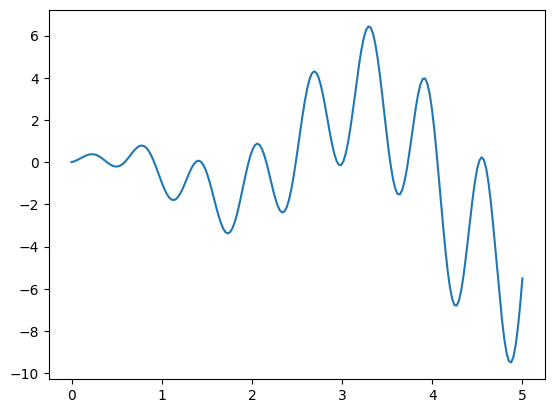

In [4]:
# TODO: draw the curve of this objective function
x = np.linspace(X_BOUND[0], X_BOUND[1], 200)
plt.plot(x, F(x))

# Design Fitness Function
$$ fitness(pred) =\text{pred} + 10^{-3} - \min(\text{pred}) $$

This fitness function $pred + 10^{-3} - min(pred)$ is designed carefully to address common issues in algorithms and optimize the selection process. Here's a detailed explanation:

### **Explanation**:
1. **pred**: This represents the current fitness value (or prediction) of an individual in the population. The higher the fitness, the more likely the individual will be selected in a genetic algorithm.

2. **$10^{-3}$**: This small constant is added to ensure that the fitness value never becomes zero. Even when the `pred` value is very small or equal to the minimum in the population, this small constant prevents the fitness from being zero. It helps avoid numerical issues and ensures that each individual has a non-zero fitness, which is crucial in selection mechanisms that use fitness-based probabilities.

3. $- \min(\text{pred})$: Subtracting the minimum fitness value of the population helps normalize the fitness values. By shifting all fitness values so that the minimum fitness becomes close to zero, this highlights the difference between individuals. It ensures that the worst individuals are near zero fitness, making selection mechanisms more effective by promoting fitter individuals.

### **Why This Design?**

1. **Preventing Zero Fitness**: Adding a small constant ($10^{-3}$) ensures that no fitness value becomes zero or negative. This is important for algorithms that require positive fitness values, such as selection mechanisms in genetic algorithms that rely on proportional selection.

2. **Normalization**: By subtracting the minimum fitness value, the function ensures that the least fit individuals are near zero. This scaling helps selection mechanisms function more effectively, preventing the worst individuals from dominating and allowing fitter individuals to have a higher chance of selection.

3. **Fine Adjustment**: The addition of $10^{-3}$ is a small adjustment to ensure that no individual has exactly zero fitness, which is important for algorithms that require positive probabilities for selection.

### **Summary**:

This fitness function is designed to:
- Normalize fitness values by subtracting the minimum fitness.
- Ensure no individual has zero or negative fitness by adding a small constant.
- Smoothly scale fitness values to make sure selection mechanisms (like in genetic algorithms) work effectively, increasing the likelihood of selecting fitter individuals.

## You can also design other fitness functions.

## HW3.2 Fitness Function
Write the Fitness Function:
$$ \text{pred} + 10^{-3} - \min(\text{pred}) $$

In [5]:
def get_fitness(pred):
    # TODO: Write the Fitness Function and return the fitness value
    return pred + 1e-3 - np.min(pred)

## HW3.3 Representation
Design a function **`translateDNA(pop)`** to convert binary-encoded DNA (gene sequences) into a real number, used in genetic algorithms to map binary genes to a value within a specified range.

### **Input**:
- **`pop`**: A 2D array where each row represents an individual's DNA, encoded as a binary sequence.

### **Output**:
- A 1D array of real values, where the binary DNA has been converted to real numbers and scaled according to `X_BOUND[1]`.

### **Explanation**:
- The function converts the binary DNA representation into a real number by treating the binary sequence as a number in base-2, normalizing it by dividing by the maximum possible value, and scaling it to fit within the specified bounds (`X_BOUND[1]`).

In [6]:
def translateDNA(pop):
    # TODO: Write the translateDNA Function and return a 1D array of real values
    return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]

# HW3.4 Selection
Write a function **`select(pop, fitness)`** to implement a natural selection process in a genetic algorithm. It selects individuals from the population (pop) based on their fitness values (fitness), where fitter individuals have a higher probability of being selected for the next generation.

Tip: You can normalize fitness into a probability distribution using `p = fitness / fitness.sum()`, ensuring that the sum of all individuals equals 1. The higher the fitness of an individual, the greater its chance of being selected, but every individual still has a chance of being chosen.
### **Input**:
1. **`pop`**: A 2D array representing the population, where each row is an individual's genetic sequence (DNA).
2. **`fitness`**: A 1D array representing the fitness values of the individuals in the population.

### **Output**:
- **`pop[idx]`**: A 2D array representing the selected population for the next generation, with individuals chosen based on their fitness values.

In [7]:
def select(pop, fitness):    # nature selection wrt pop's fitness
    # TODO: Write the select Function and return a 2D array representing the selected population for the next generation
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=fitness/fitness.sum())
    return pop[idx]

## HW3.5 Crossover
Write a function **`crossover(parent, pop)`** to implement the crossover (mating) process in a genetic algorithm. During crossover, two individuals exchange some of their genetic material to produce a new individual (child).
### **Input**:
1. **`parent`**: A 1D array representing an individual's genetic sequence (DNA).
2. **`pop`**: A 2D array representing the population, where each row is an individual.

### **Output**:
- **`parent`**: A 1D array, either modified (after crossover) or unmodified (if no crossover occurs).


In [8]:
def crossover(parent, pop):
    # TODO: Write the crossover Function and return a 1D array of parent
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool_)
        parent[cross_points] = pop[i_, cross_points]
    return parent

## HW3.6 Mutation
Write a function **`mutate()`** to perform a mutation operation in a genetic algorithm, which introduces small random changes in an individual's genetic sequence (DNA). Mutation helps maintain genetic diversity within the population.
### **Input**:
1. **`child`**: A 1D array representing an individual's genetic sequence (DNA), where each element is typically a binary value (0 or 1).

### **Output**:
- **`child`**: The modified genetic sequence after mutation, where certain genes may have flipped from 0 to 1 or from 1 to 0 based on the mutation rate.

### **Explanation**:
- The function iterates through each gene in the `child` DNA sequence. For each gene, with a probability determined by `MUTATION_RATE`, the gene may undergo mutation, flipping from 0 to 1 or from 1 to 0. This introduces genetic diversity into the population.


In [9]:
def mutate(child):
    # TODO: Write the mutation Function and return the child
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

## HW3.7 GA Function
Write a function GA() that implements a basic genetic algorithm (GA) that evolves a population over many generations to optimize the function F() based on the function you wrote above.
### **Input**:

1. **`N_GENERATIONS`**: An integer representing the number of generations (iterations) the genetic algorithm will run.
2. **`pop`**: A 2D array where each row represents an individual's DNA sequence encoded in binary (the initial population).

### **Output**:
- **`performance`**: A list that records the sum of fitness values (`F_values.sum()`) for each generation. This allows the user to analyze how the overall fitness of the population evolves across generations. Additionally, for each generation, a scatter plot is generated to visually represent the solutions' progression.
- **`time_per_iteration`**: A list used to record the computation time for each generation.

In [10]:
def GA(N_GENERATIONS, pop):
    # TODO: Write the GA Function that evolves a population over many generations to optimize the function F() based on the function you wrote above.
    performance = []
    time_per_iteration = []

    for generation in range(N_GENERATIONS):
        start_time = time.time()

        F_values = F(translateDNA(pop))
        fitness = get_fitness(F_values)

        performance.append(F_values.sum())

        print(f"Generation: {generation}")
        print(f"Max F_values: {max(performance)}")

        # Scatter plot
        plt.scatter(translateDNA(pop), F_values, s=100, lw=0, c='red', alpha=0.5)
        plt.show()

        # Evolution
        pop = select(pop, fitness)
        pop_copy = pop.copy()
        for parent in pop:
            child = crossover(parent, pop_copy)
            child = mutate(child)
            parent[:] = child

        end_time = time.time()
        iteration_time = end_time - start_time
        time_per_iteration.append(iteration_time)
        print(f"Time for Generation {generation}: {iteration_time:.4f} seconds")

    return performance, time_per_iteration  # Return both performance and time per generation

Generation: 0
Max F_values: -56.07128747178426


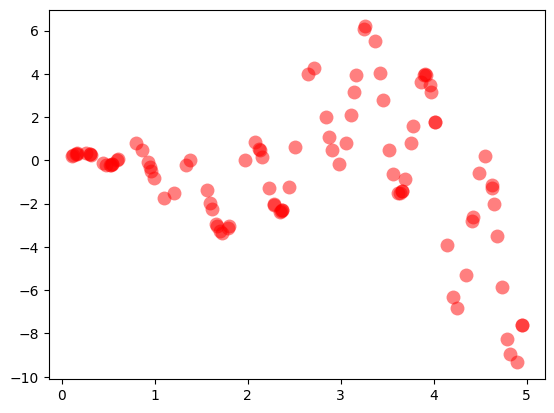

Time for Generation 0: 0.0672 seconds
Generation: 1
Max F_values: -27.86980832378912


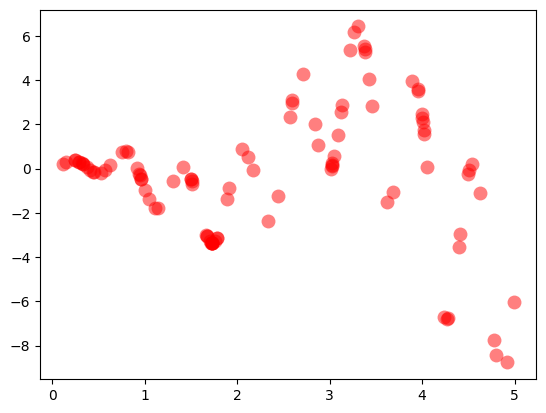

Time for Generation 1: 0.0853 seconds
Generation: 2
Max F_values: 56.00565605276138


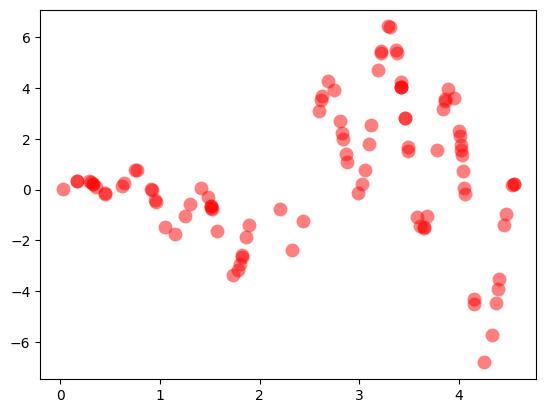

Time for Generation 2: 0.0642 seconds
Generation: 3
Max F_values: 102.241506634866


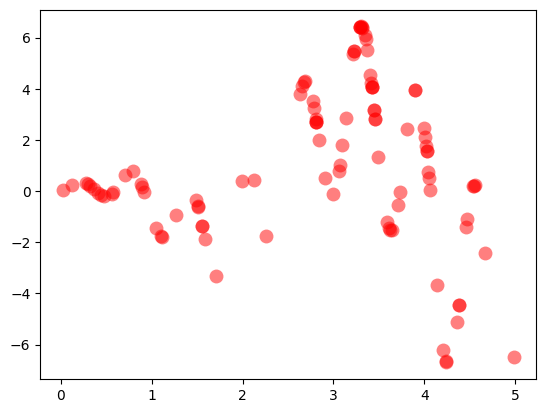

Time for Generation 3: 0.0788 seconds
Generation: 4
Max F_values: 154.68200561783254


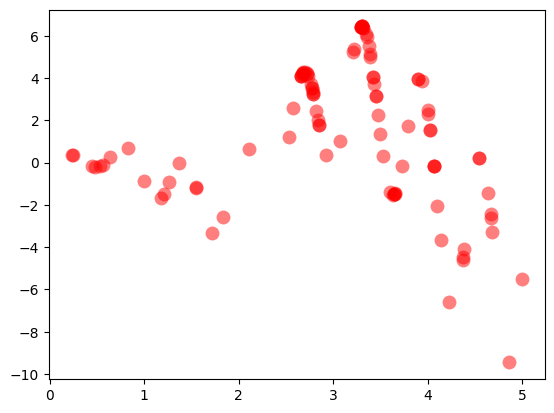

Time for Generation 4: 0.0644 seconds
Generation: 5
Max F_values: 224.08758281133598


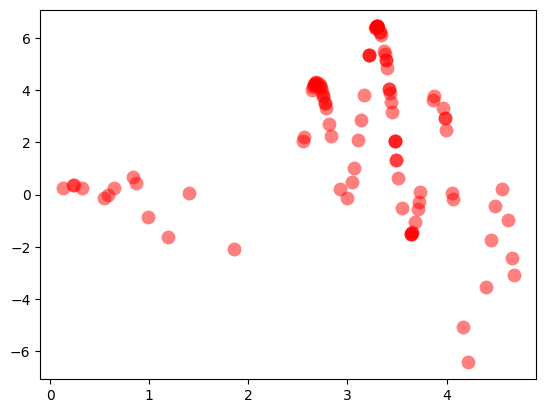

Time for Generation 5: 0.0587 seconds
Generation: 6
Max F_values: 375.5066372390579


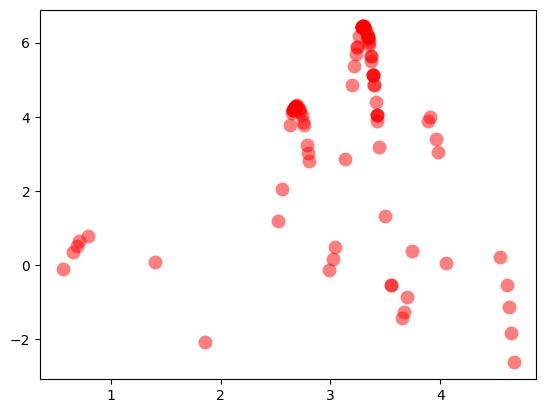

Time for Generation 6: 0.0650 seconds
Generation: 7
Max F_values: 472.7525106129044


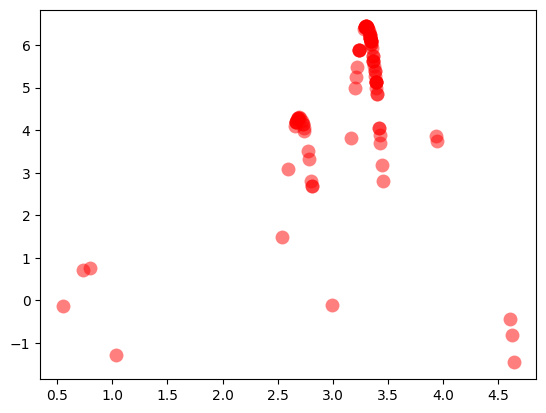

Time for Generation 7: 0.0834 seconds
Generation: 8
Max F_values: 479.8782419354948


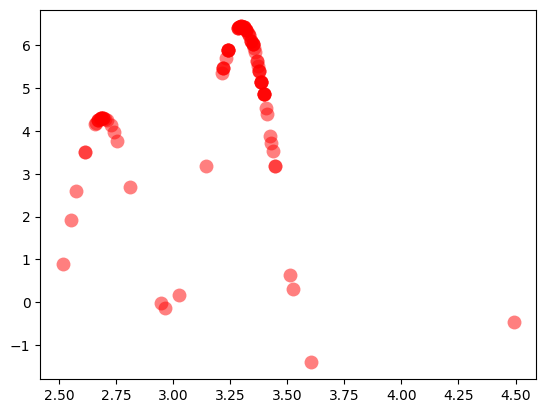

Time for Generation 8: 0.0832 seconds
Generation: 9
Max F_values: 497.2808972112485


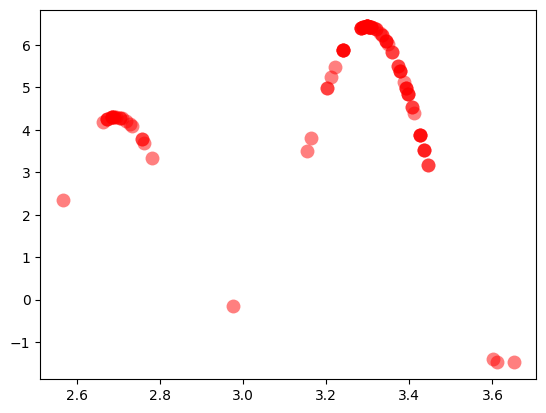

Time for Generation 9: 0.0847 seconds
Generation: 10
Max F_values: 528.210484297106


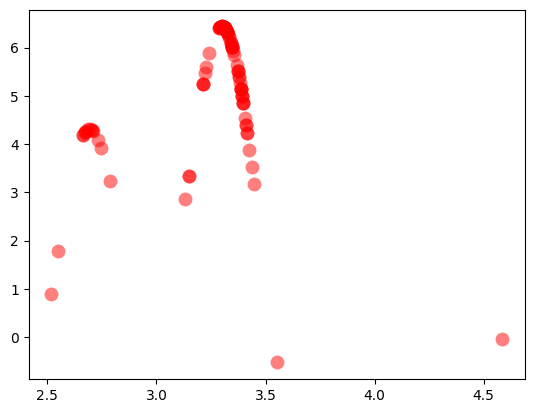

Time for Generation 10: 0.0599 seconds
Generation: 11
Max F_values: 556.8818549693149


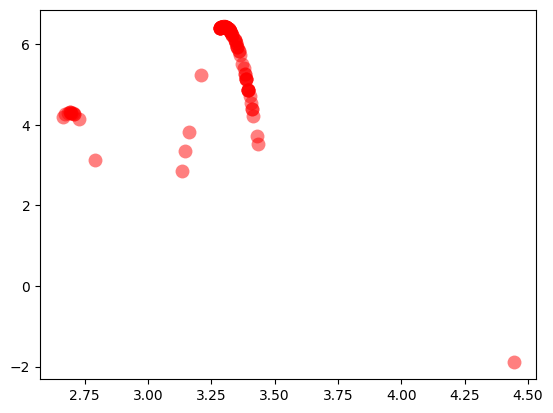

Time for Generation 11: 0.0555 seconds
Generation: 12
Max F_values: 556.8818549693149


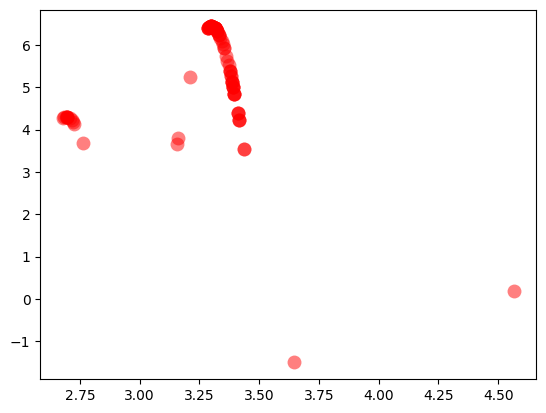

Time for Generation 12: 0.0501 seconds
Generation: 13
Max F_values: 556.8818549693149


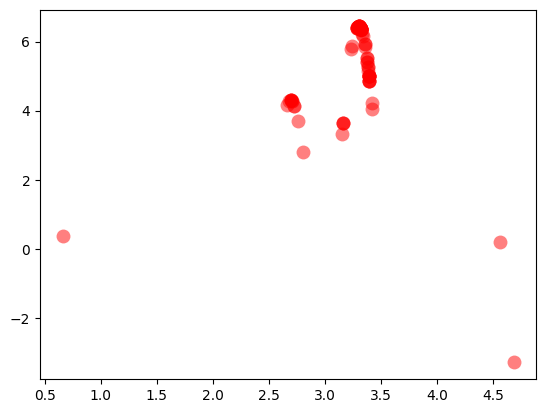

Time for Generation 13: 0.0680 seconds
Generation: 14
Max F_values: 556.8818549693149


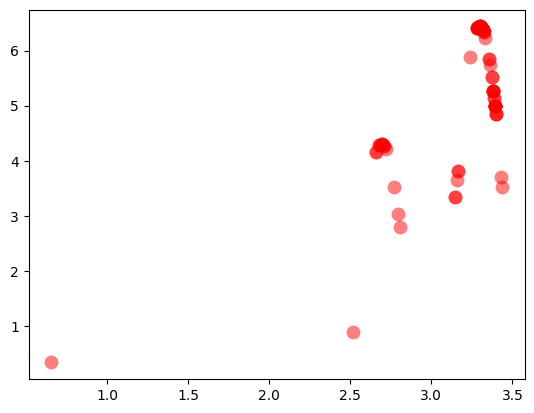

Time for Generation 14: 0.0653 seconds
Generation: 15
Max F_values: 591.7213313265465


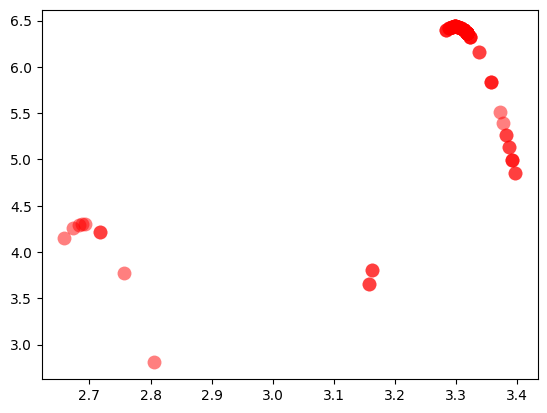

Time for Generation 15: 0.0948 seconds
Generation: 16
Max F_values: 594.5203044723944


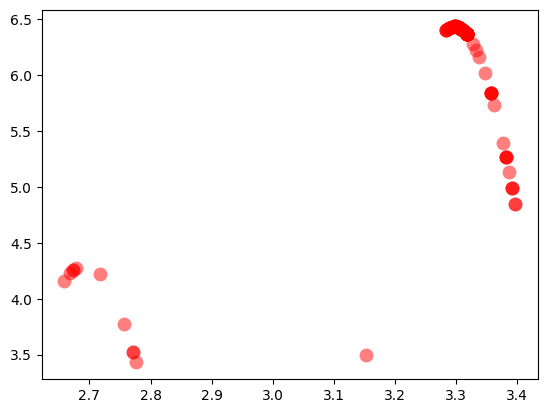

Time for Generation 16: 0.0552 seconds
Generation: 17
Max F_values: 601.2187783669301


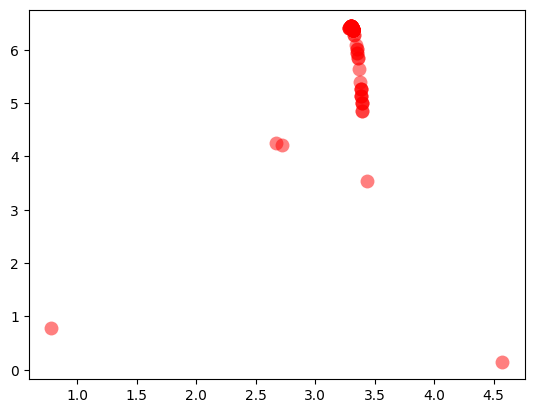

Time for Generation 17: 0.0497 seconds
Generation: 18
Max F_values: 607.9135540640011


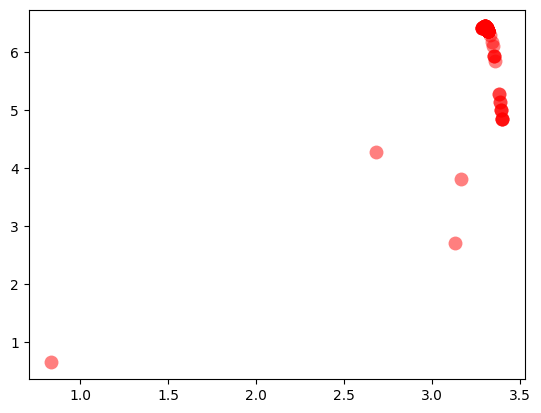

Time for Generation 18: 0.0639 seconds
Generation: 19
Max F_values: 607.9135540640011


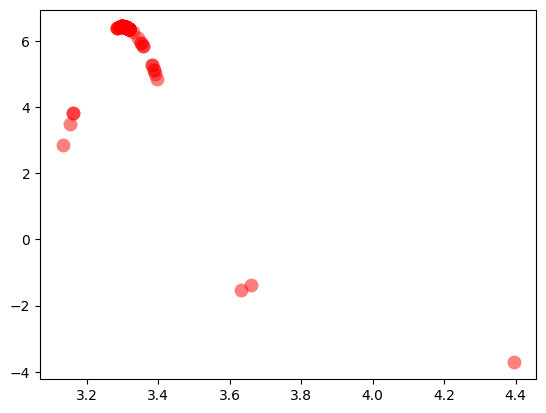

Time for Generation 19: 0.0534 seconds
Generation: 20
Max F_values: 616.8133407600118


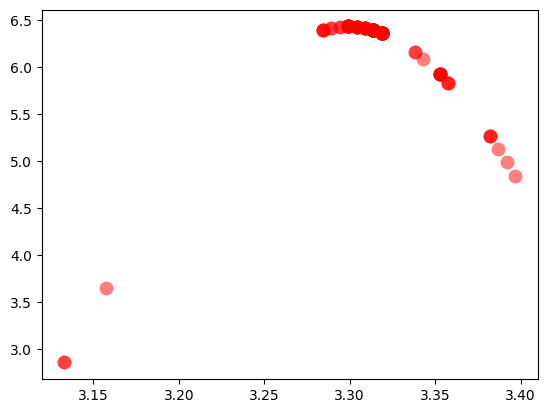

Time for Generation 20: 0.0684 seconds
Generation: 21
Max F_values: 627.8442435545205


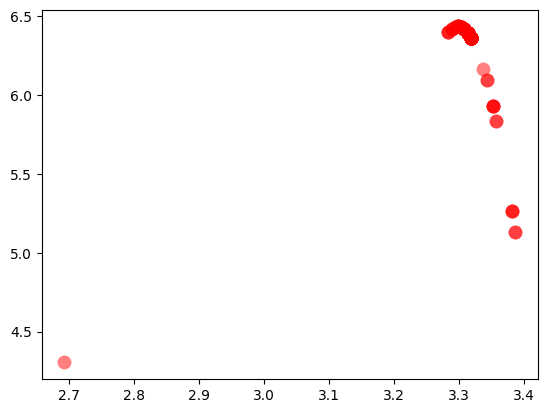

Time for Generation 21: 0.0694 seconds
Generation: 22
Max F_values: 627.8442435545205


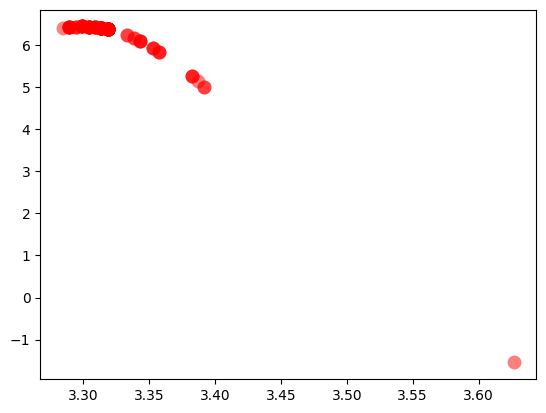

Time for Generation 22: 0.0615 seconds
Generation: 23
Max F_values: 627.8442435545205


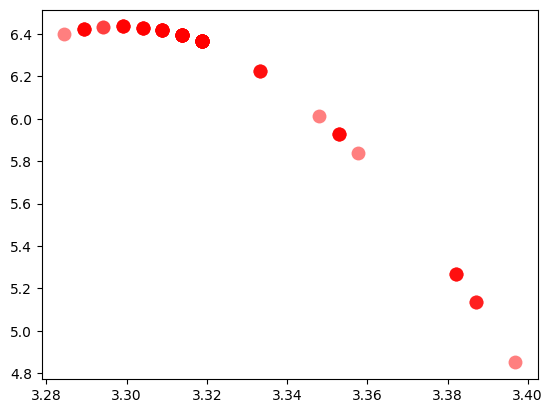

Time for Generation 23: 0.0808 seconds
Generation: 24
Max F_values: 634.0303798100923


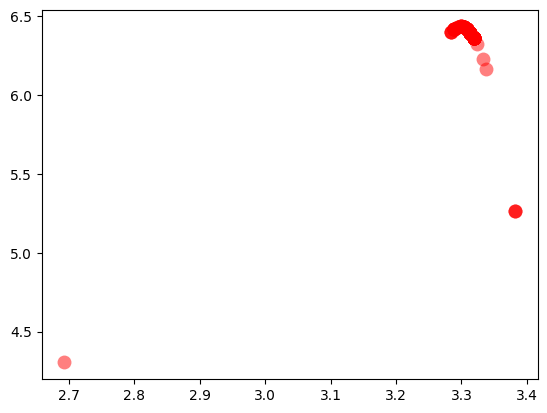

Time for Generation 24: 0.0796 seconds
Generation: 25
Max F_values: 634.0303798100923


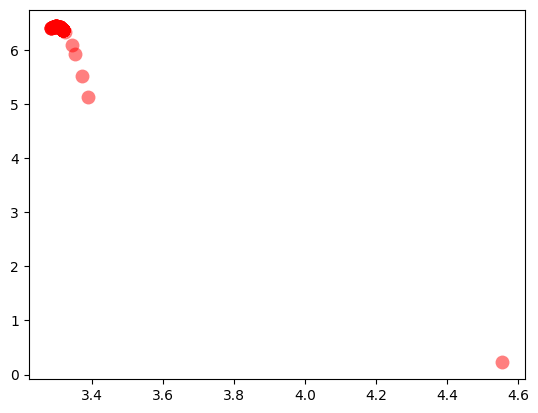

Time for Generation 25: 0.0721 seconds
Generation: 26
Max F_values: 634.0303798100923


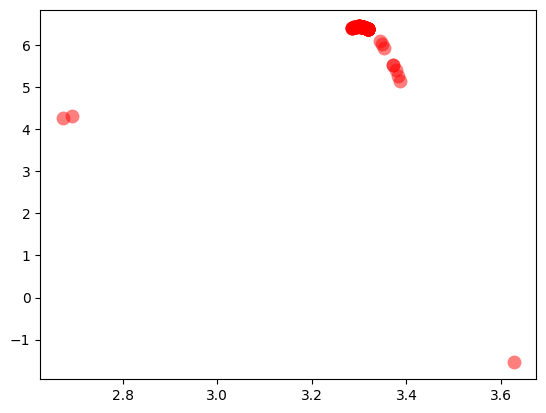

Time for Generation 26: 0.0698 seconds
Generation: 27
Max F_values: 634.0303798100923


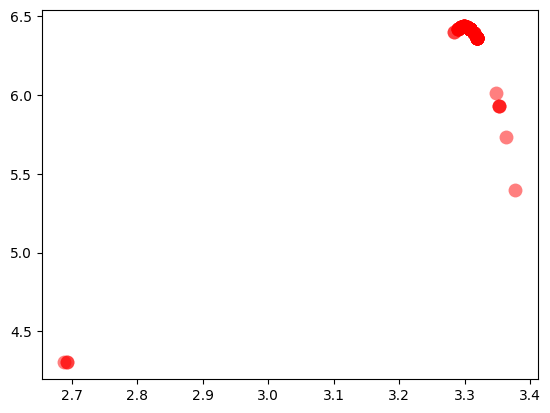

Time for Generation 27: 0.0646 seconds
Generation: 28
Max F_values: 640.7578988618708


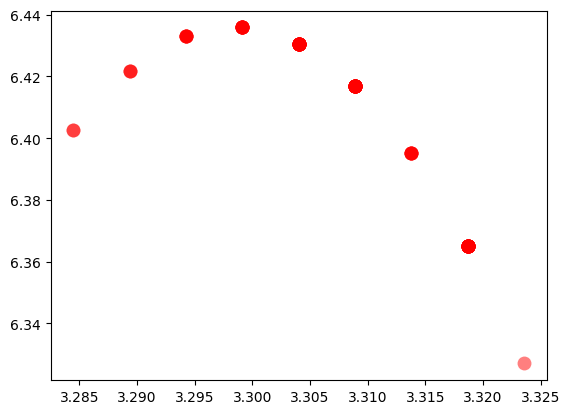

Time for Generation 28: 0.0887 seconds
Generation: 29
Max F_values: 640.7578988618708


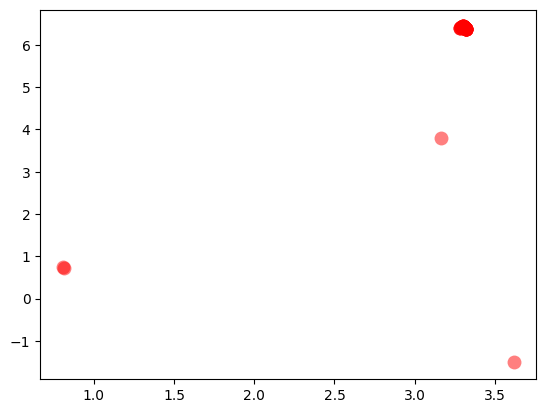

Time for Generation 29: 0.0942 seconds
Generation: 30
Max F_values: 640.7578988618708


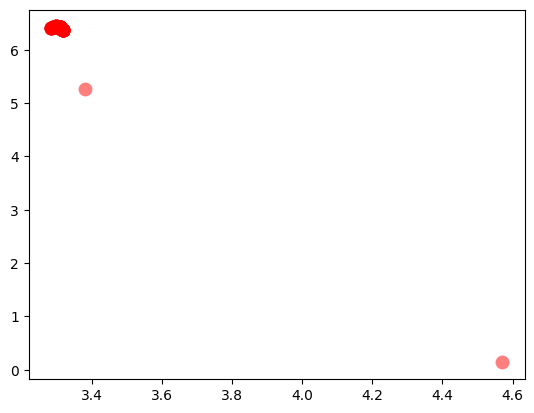

Time for Generation 30: 0.0583 seconds
Generation: 31
Max F_values: 640.7578988618708


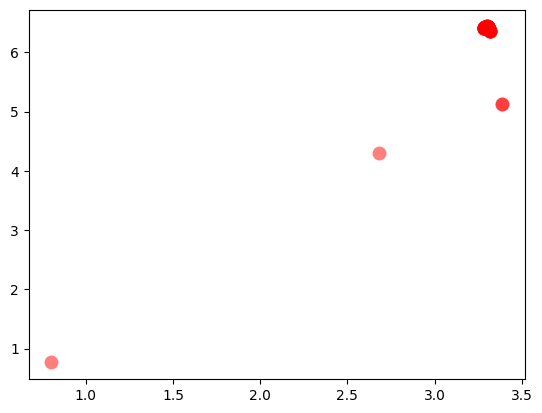

Time for Generation 31: 0.0566 seconds
Generation: 32
Max F_values: 640.7578988618708


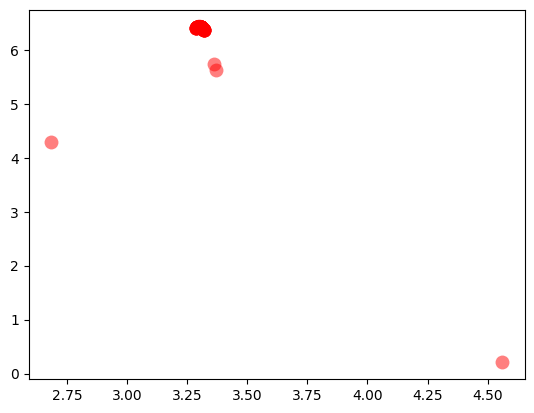

Time for Generation 32: 0.0518 seconds
Generation: 33
Max F_values: 640.7578988618708


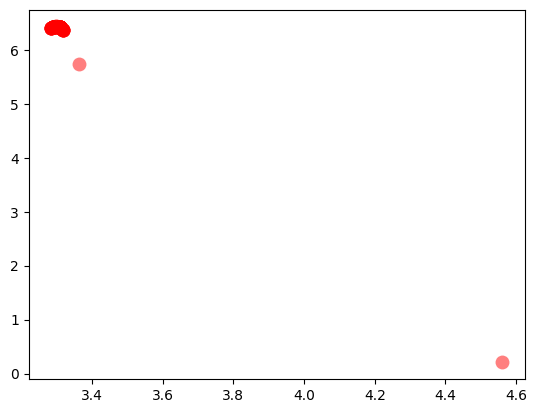

Time for Generation 33: 0.0835 seconds
Generation: 34
Max F_values: 640.7578988618708


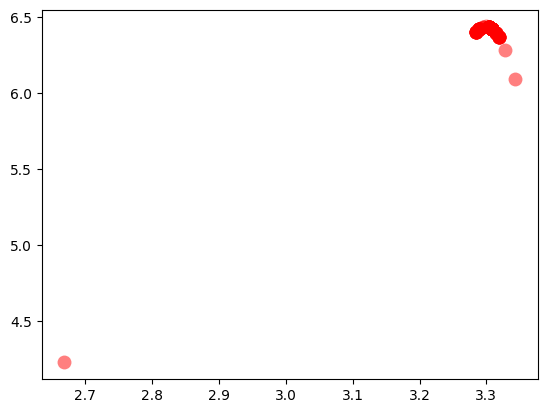

Time for Generation 34: 0.0696 seconds
Generation: 35
Max F_values: 640.7578988618708


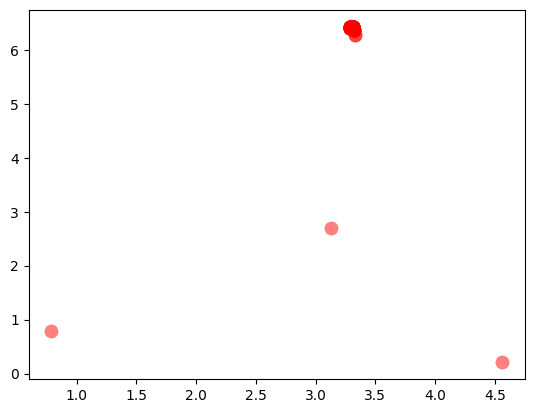

Time for Generation 35: 0.0846 seconds
Generation: 36
Max F_values: 640.7578988618708


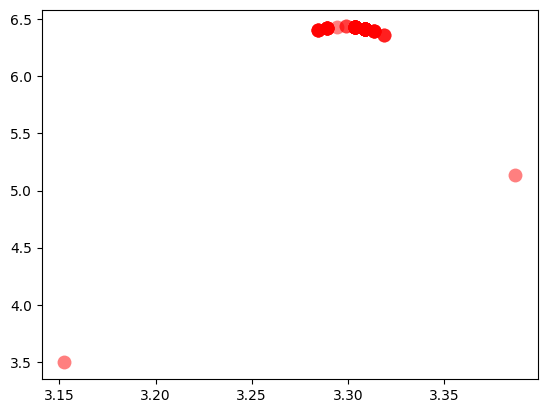

Time for Generation 36: 0.0621 seconds
Generation: 37
Max F_values: 640.7578988618708


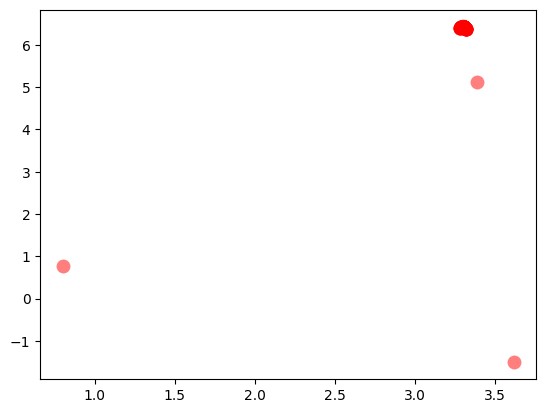

Time for Generation 37: 0.0834 seconds
Generation: 38
Max F_values: 640.7578988618708


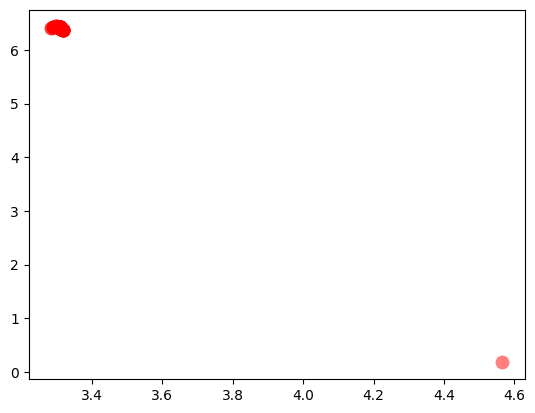

Time for Generation 38: 0.0615 seconds
Generation: 39
Max F_values: 640.7578988618708


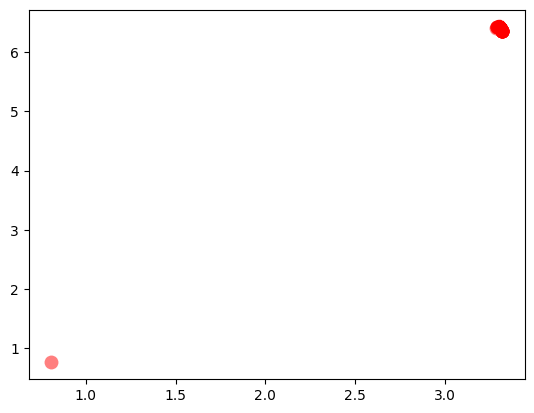

Time for Generation 39: 0.0479 seconds
Generation: 40
Max F_values: 640.7578988618708


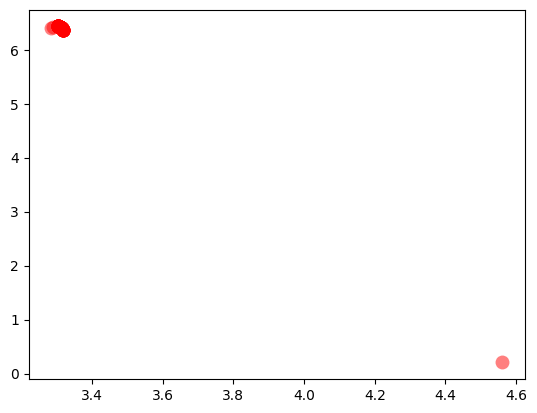

Time for Generation 40: 0.0574 seconds
Generation: 41
Max F_values: 640.7578988618708


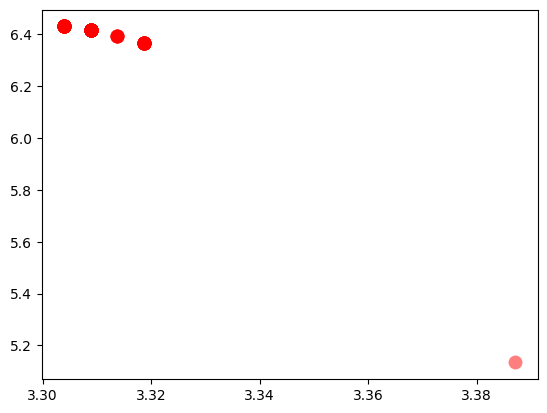

Time for Generation 41: 0.0500 seconds
Generation: 42
Max F_values: 640.7578988618708


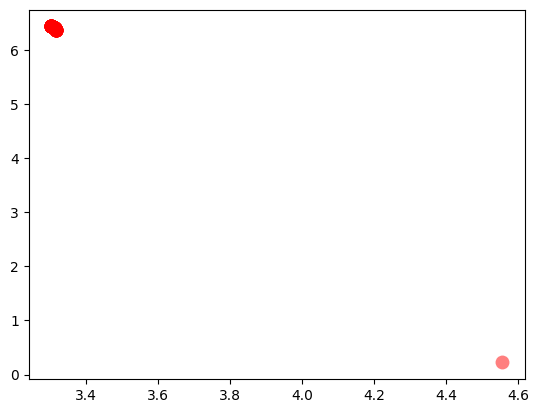

Time for Generation 42: 0.0594 seconds
Generation: 43
Max F_values: 640.7578988618708


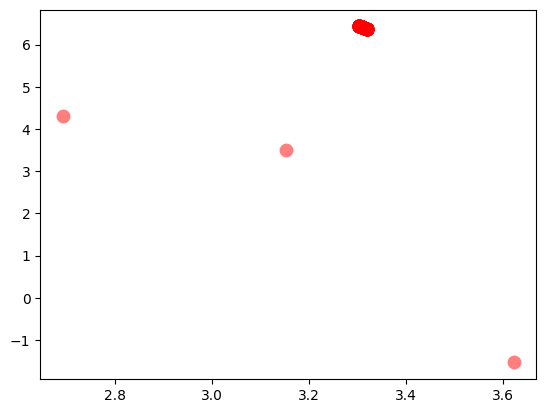

Time for Generation 43: 0.0807 seconds
Generation: 44
Max F_values: 640.7578988618708


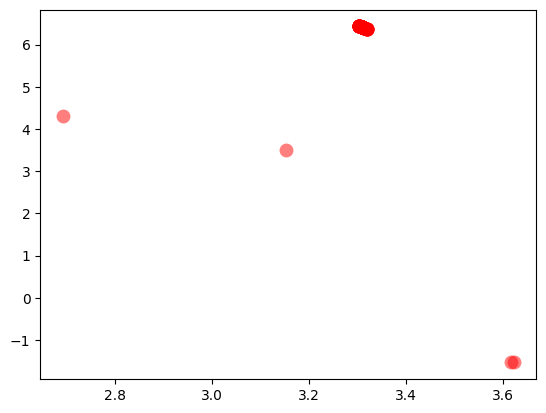

Time for Generation 44: 0.0599 seconds
Generation: 45
Max F_values: 640.7578988618708


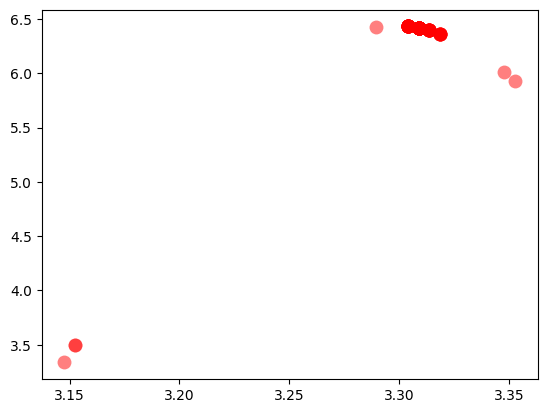

Time for Generation 45: 0.0671 seconds
Generation: 46
Max F_values: 640.7578988618708


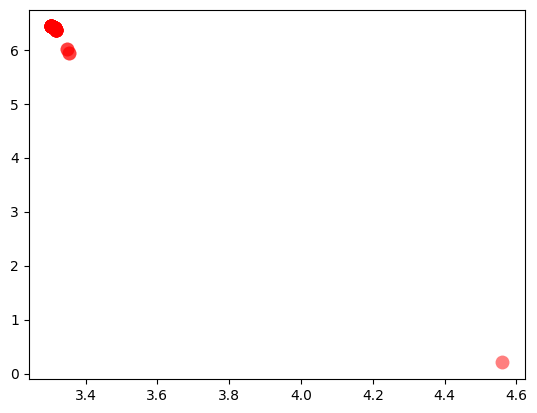

Time for Generation 46: 0.0664 seconds
Generation: 47
Max F_values: 640.7578988618708


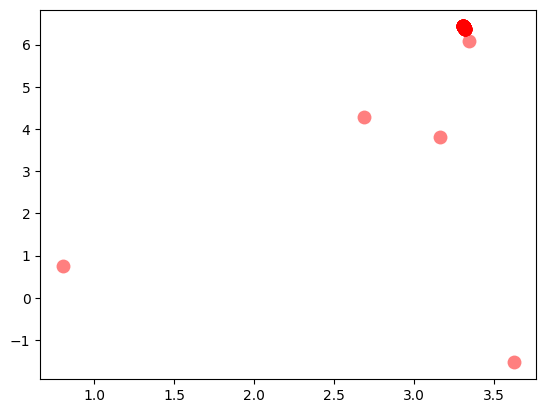

Time for Generation 47: 0.0828 seconds
Generation: 48
Max F_values: 640.7578988618708


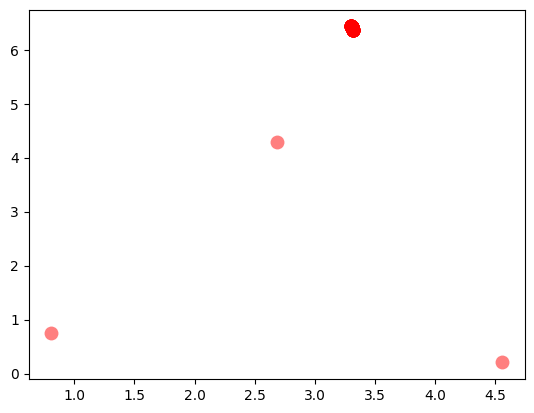

Time for Generation 48: 0.0668 seconds
Generation: 49
Max F_values: 640.7578988618708


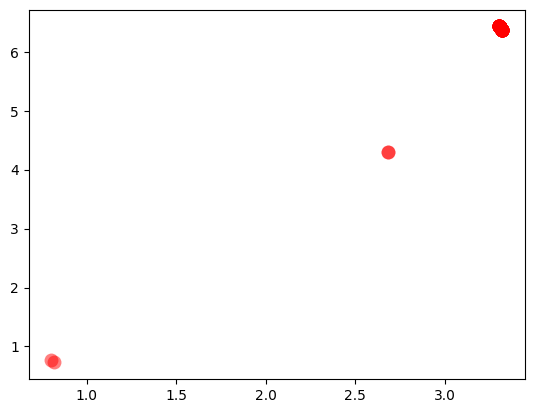

Time for Generation 49: 0.0753 seconds
Generation: 50
Max F_values: 640.7578988618708


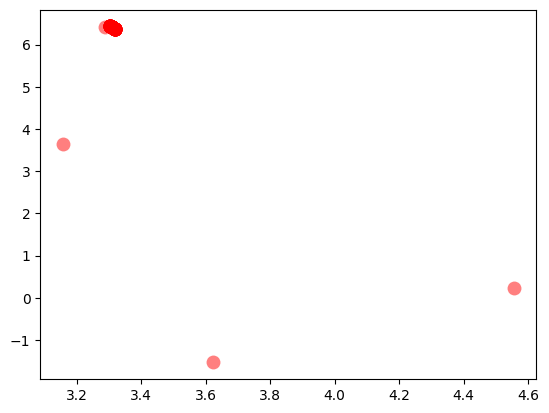

Time for Generation 50: 0.1031 seconds
Generation: 51
Max F_values: 640.7578988618708


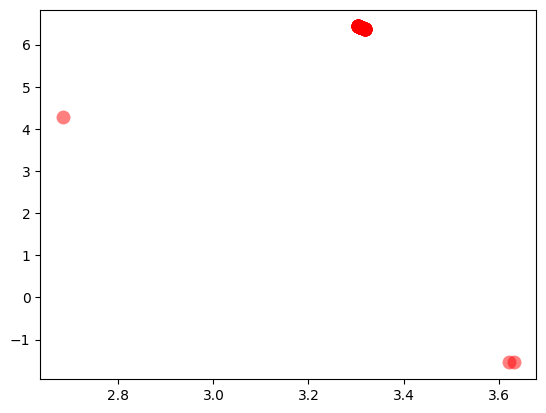

Time for Generation 51: 0.0551 seconds
Generation: 52
Max F_values: 640.7578988618708


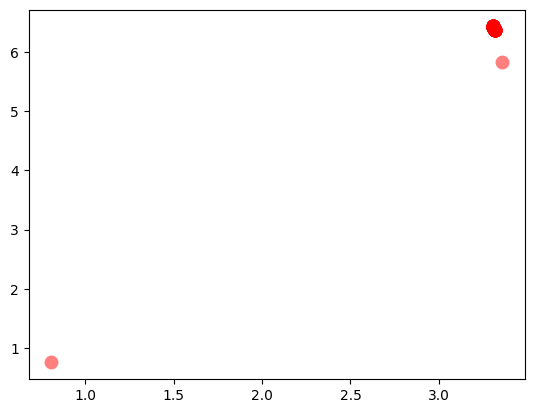

Time for Generation 52: 0.0496 seconds
Generation: 53
Max F_values: 640.7578988618708


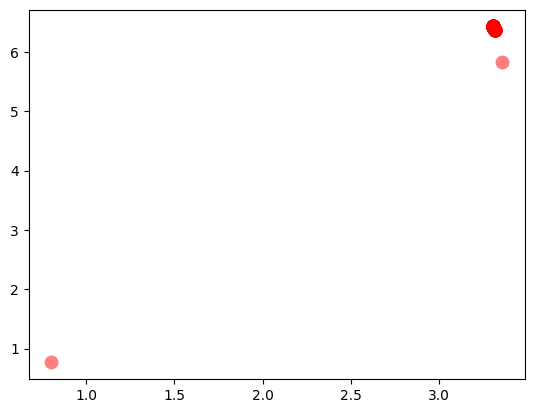

Time for Generation 53: 0.0504 seconds
Generation: 54
Max F_values: 640.7578988618708


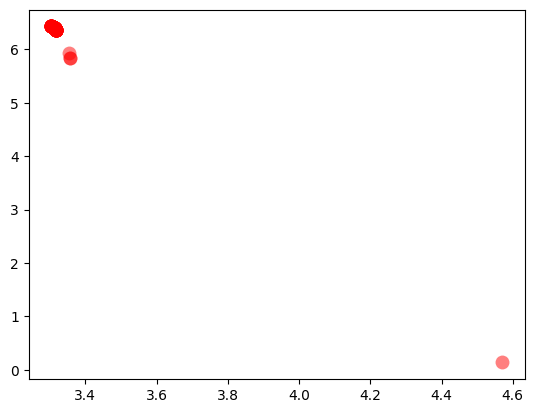

Time for Generation 54: 0.0587 seconds
Generation: 55
Max F_values: 640.7578988618708


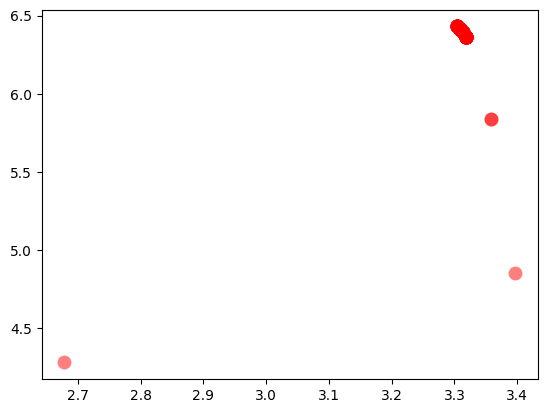

Time for Generation 55: 0.0757 seconds
Generation: 56
Max F_values: 640.7578988618708


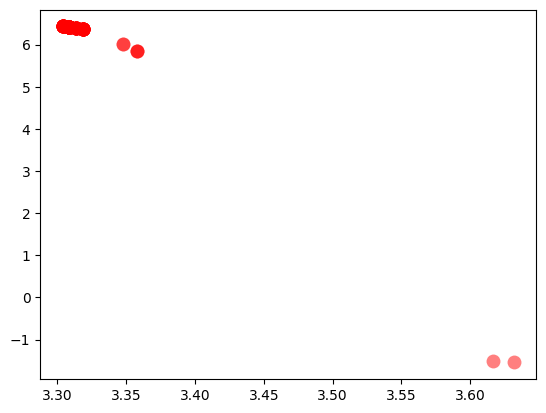

Time for Generation 56: 0.0652 seconds
Generation: 57
Max F_values: 640.7578988618708


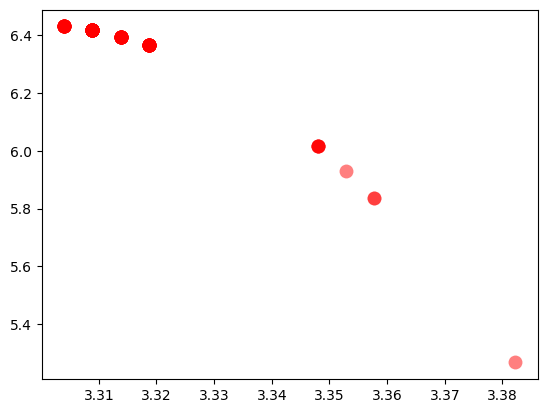

Time for Generation 57: 0.0669 seconds
Generation: 58
Max F_values: 640.7578988618708


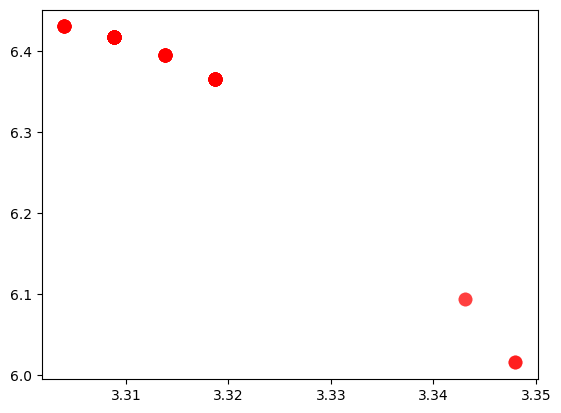

Time for Generation 58: 0.0514 seconds
Generation: 59
Max F_values: 640.7578988618708


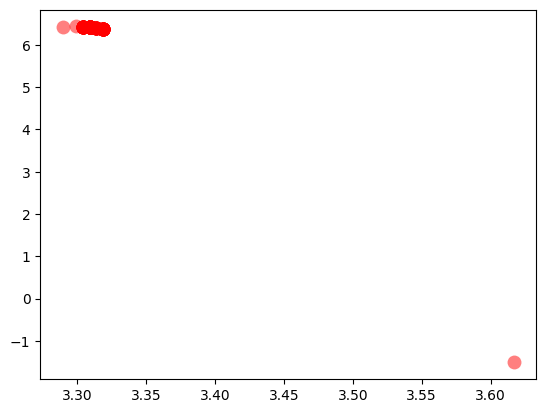

Time for Generation 59: 0.0999 seconds
Generation: 60
Max F_values: 640.7578988618708


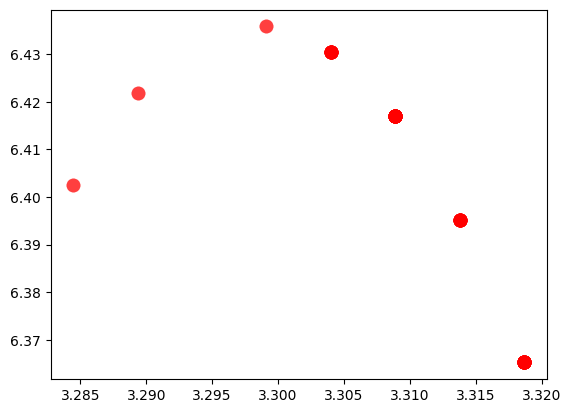

Time for Generation 60: 0.0655 seconds
Generation: 61
Max F_values: 640.7578988618708


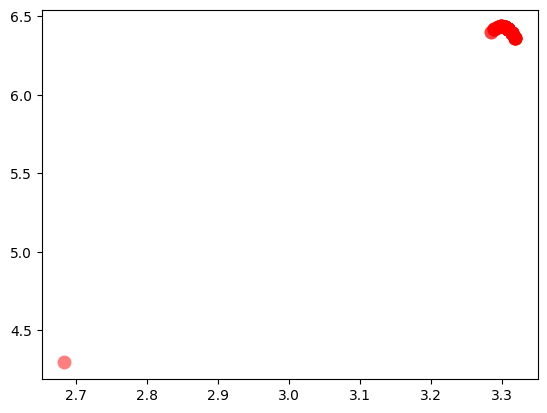

Time for Generation 61: 0.0623 seconds
Generation: 62
Max F_values: 640.7578988618708


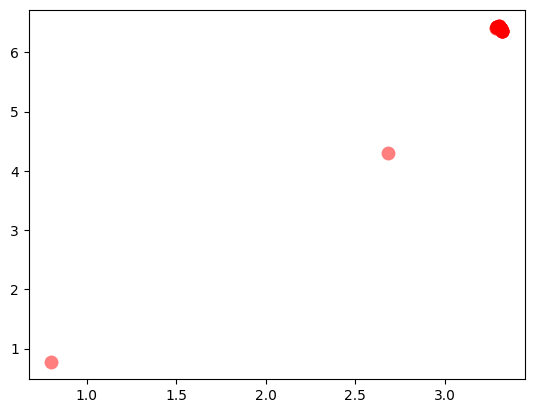

Time for Generation 62: 0.0542 seconds
Generation: 63
Max F_values: 640.7578988618708


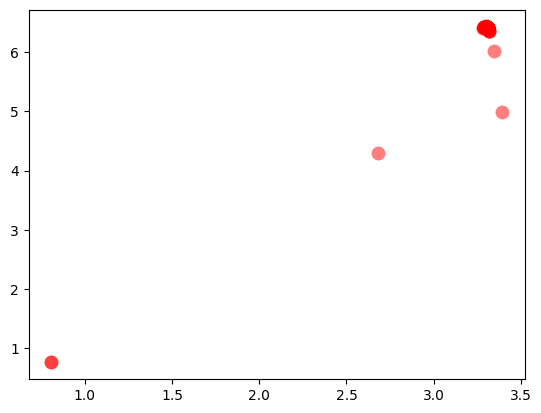

Time for Generation 63: 0.0498 seconds
Generation: 64
Max F_values: 640.7578988618708


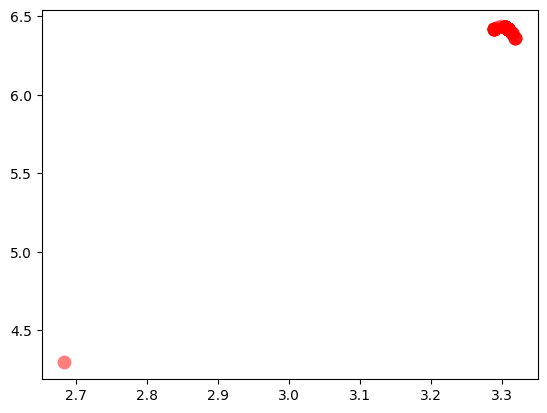

Time for Generation 64: 0.0500 seconds
Generation: 65
Max F_values: 641.7842408655421


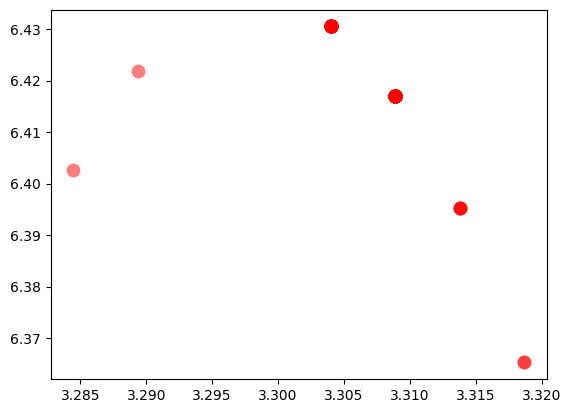

Time for Generation 65: 0.0611 seconds
Generation: 66
Max F_values: 641.7842408655421


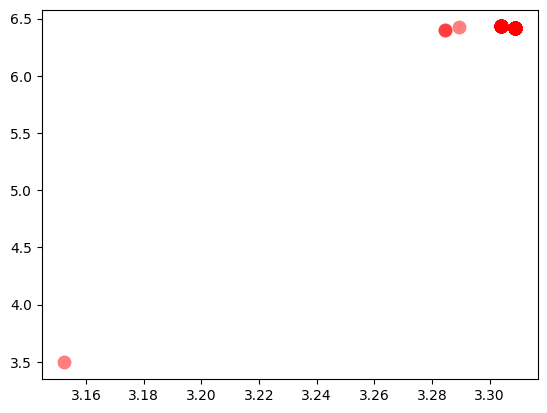

Time for Generation 66: 0.0575 seconds
Generation: 67
Max F_values: 641.7842408655421


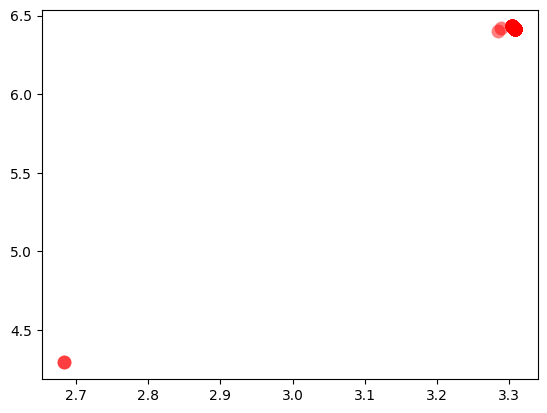

Time for Generation 67: 0.0778 seconds
Generation: 68
Max F_values: 641.7842408655421


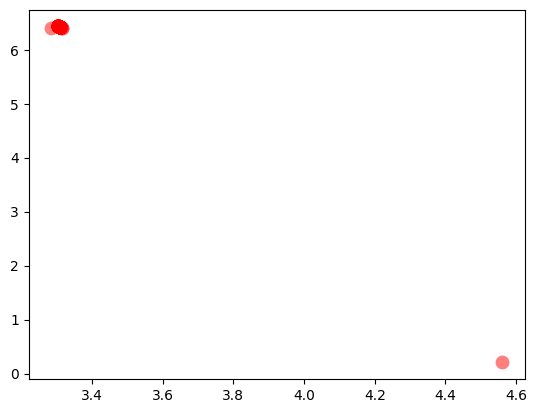

Time for Generation 68: 0.0538 seconds
Generation: 69
Max F_values: 641.7842408655421


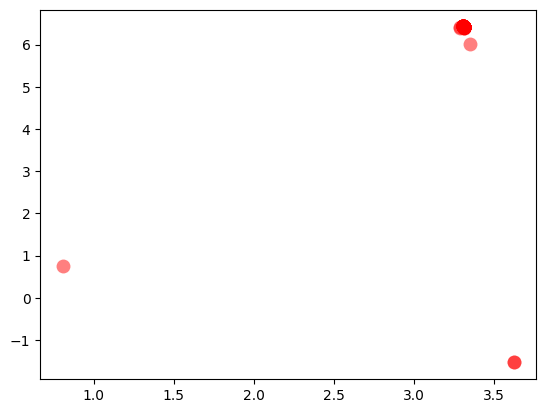

Time for Generation 69: 0.0584 seconds
Generation: 70
Max F_values: 641.7842408655421


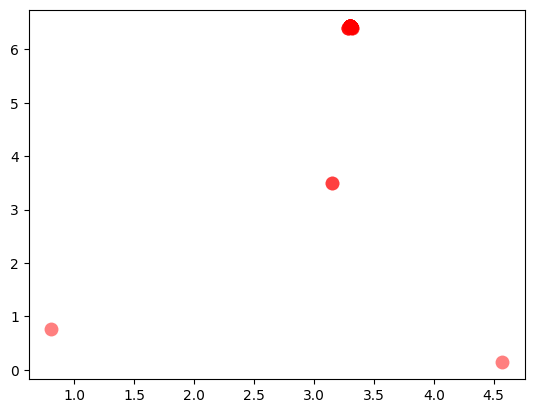

Time for Generation 70: 0.0919 seconds
Generation: 71
Max F_values: 641.7842408655421


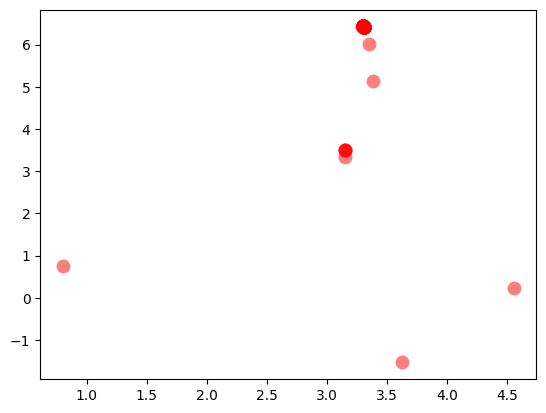

Time for Generation 71: 0.0662 seconds
Generation: 72
Max F_values: 641.7842408655421


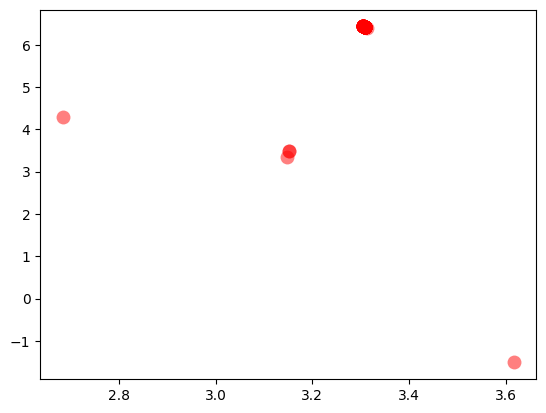

Time for Generation 72: 0.0529 seconds
Generation: 73
Max F_values: 641.7842408655421


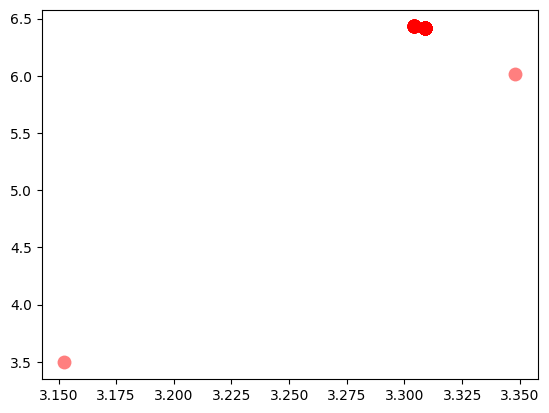

Time for Generation 73: 0.0637 seconds
Generation: 74
Max F_values: 641.7842408655421


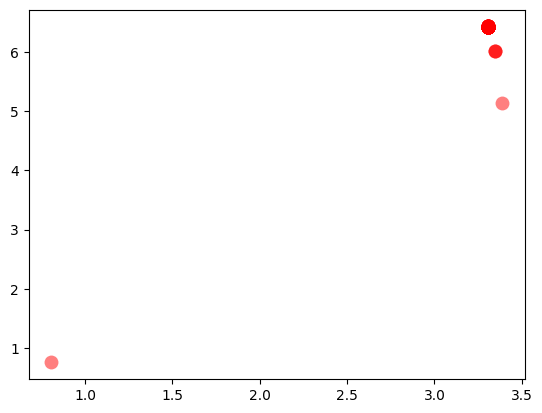

Time for Generation 74: 0.0504 seconds
Generation: 75
Max F_values: 641.7842408655421


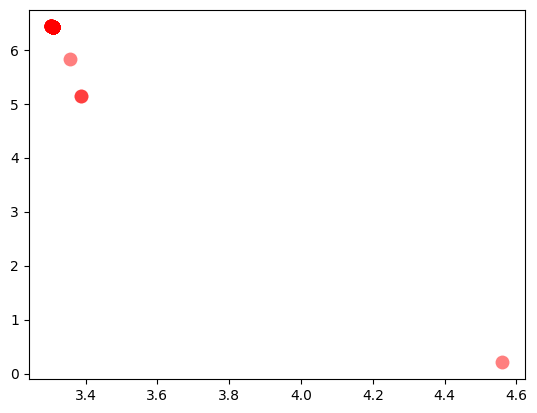

Time for Generation 75: 0.0604 seconds
Generation: 76
Max F_values: 641.7842408655421


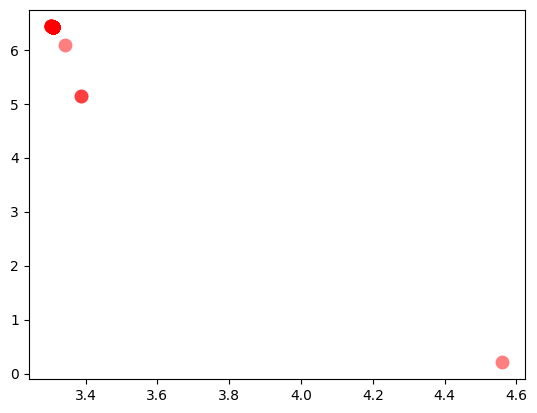

Time for Generation 76: 0.0777 seconds
Generation: 77
Max F_values: 641.7842408655421


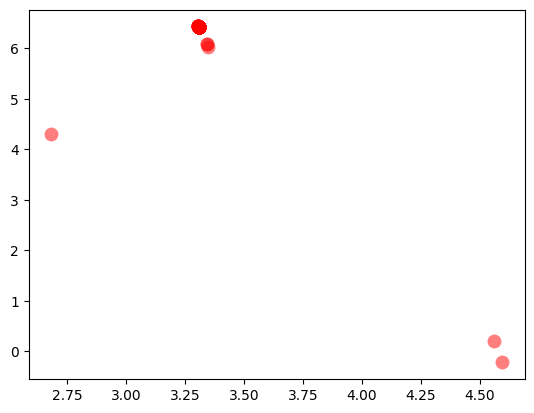

Time for Generation 77: 0.0574 seconds
Generation: 78
Max F_values: 641.7842408655421


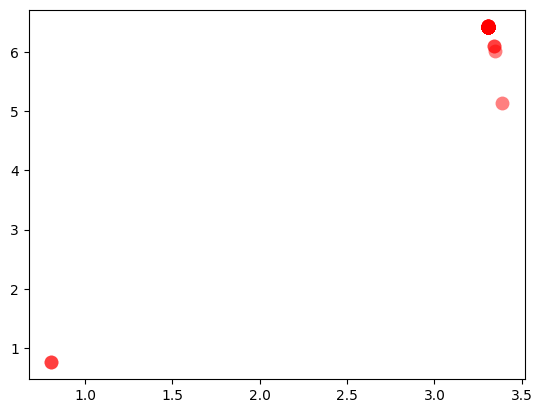

Time for Generation 78: 0.0541 seconds
Generation: 79
Max F_values: 641.7842408655421


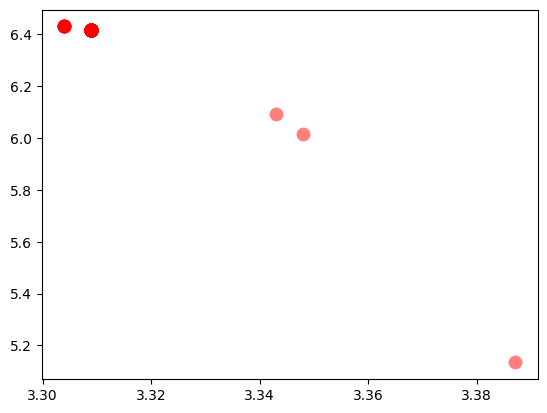

Time for Generation 79: 0.0508 seconds
Generation: 80
Max F_values: 641.7842408655421


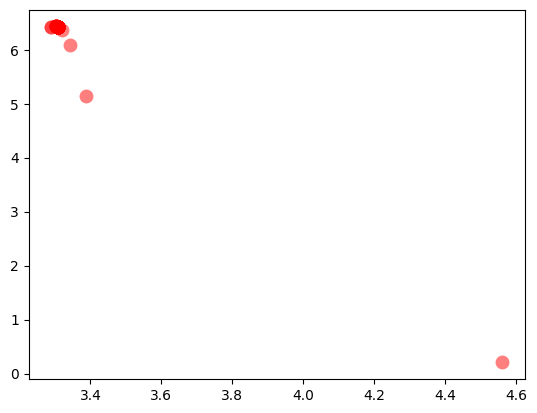

Time for Generation 80: 0.0632 seconds
Generation: 81
Max F_values: 641.7842408655421


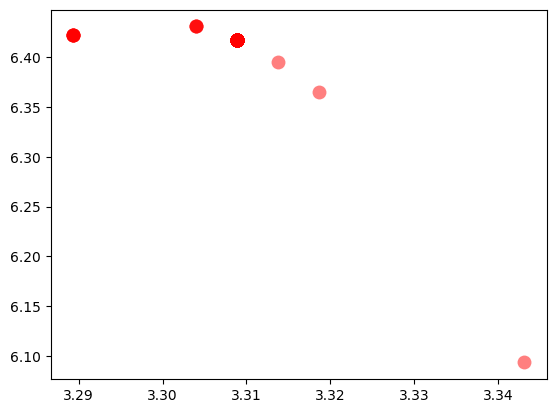

Time for Generation 81: 0.0526 seconds
Generation: 82
Max F_values: 641.7842408655421


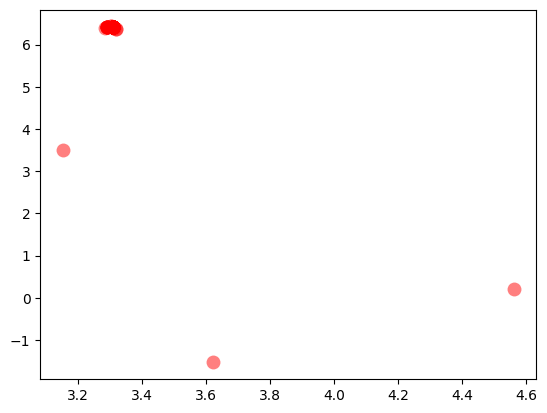

Time for Generation 82: 0.0665 seconds
Generation: 83
Max F_values: 641.7842408655421


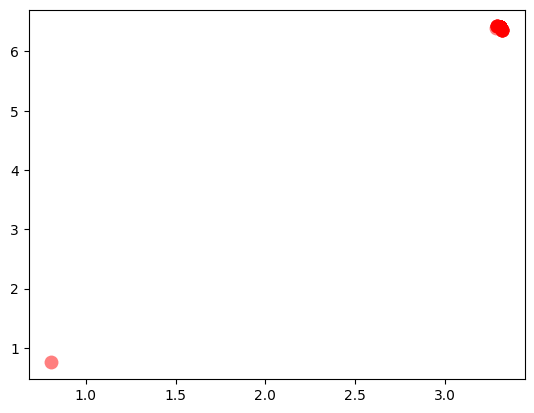

Time for Generation 83: 0.0718 seconds
Generation: 84
Max F_values: 641.7842408655421


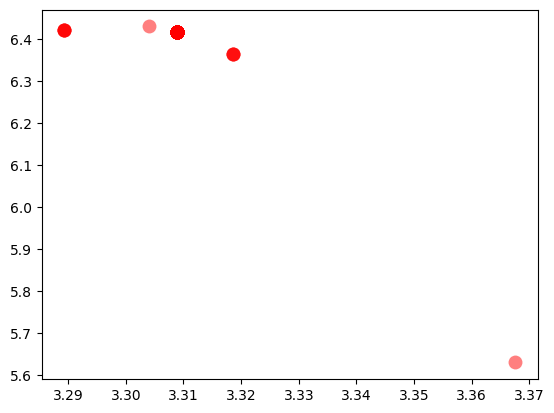

Time for Generation 84: 0.0909 seconds
Generation: 85
Max F_values: 641.7842408655421


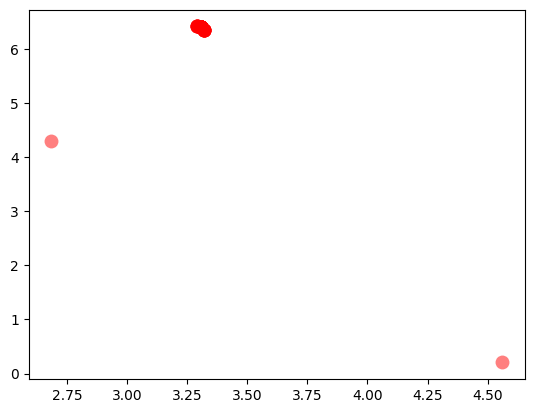

Time for Generation 85: 0.0789 seconds
Generation: 86
Max F_values: 641.7842408655421


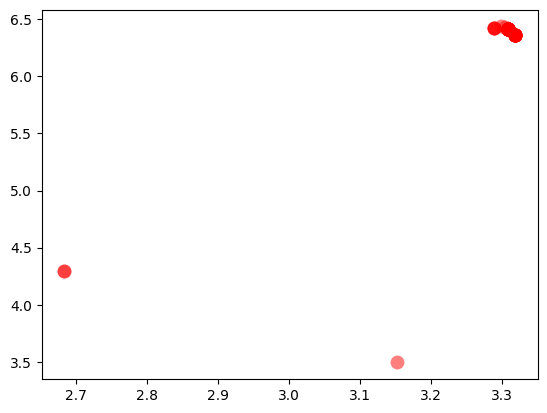

Time for Generation 86: 0.0677 seconds
Generation: 87
Max F_values: 641.7842408655421


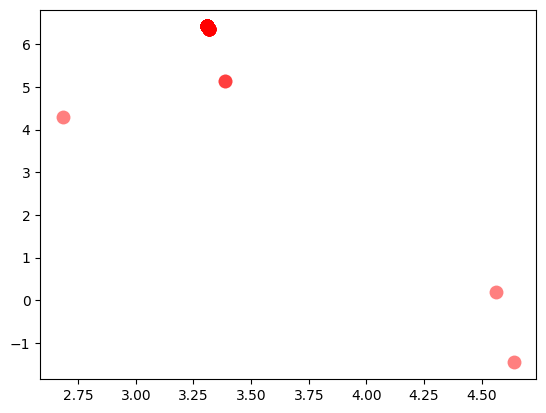

Time for Generation 87: 0.0575 seconds
Generation: 88
Max F_values: 641.7842408655421


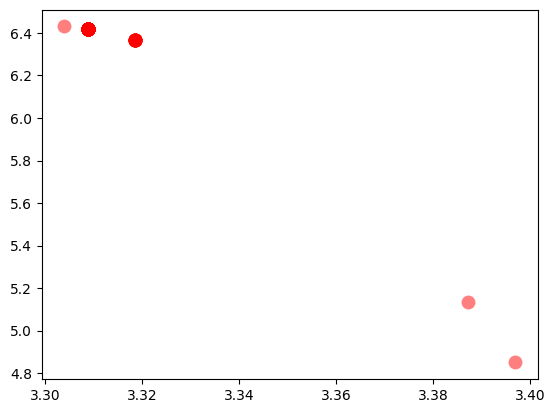

Time for Generation 88: 0.0669 seconds
Generation: 89
Max F_values: 641.7842408655421


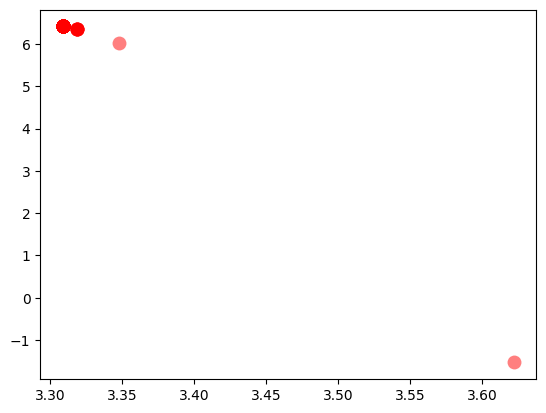

Time for Generation 89: 0.0582 seconds
Generation: 90
Max F_values: 641.7842408655421


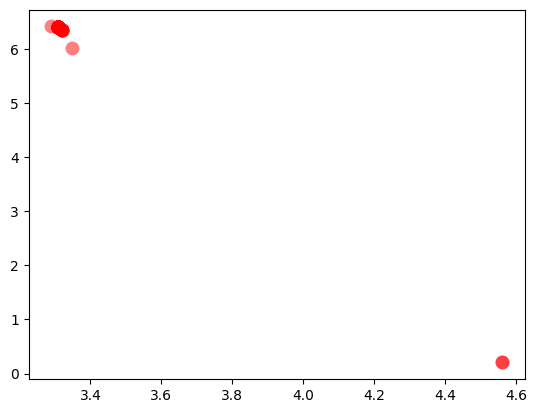

Time for Generation 90: 0.0915 seconds
Generation: 91
Max F_values: 641.7842408655421


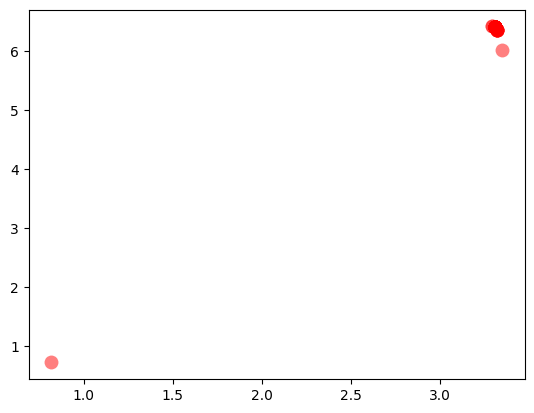

Time for Generation 91: 0.0671 seconds
Generation: 92
Max F_values: 641.7842408655421


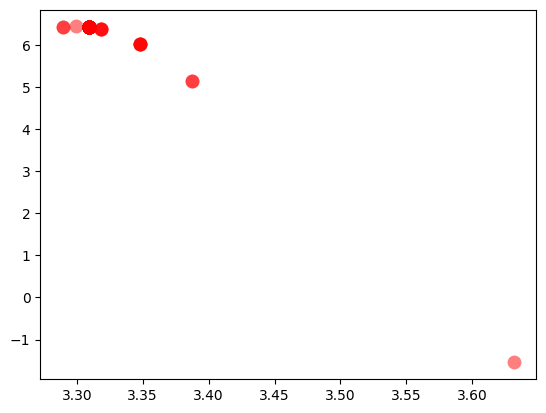

Time for Generation 92: 0.0552 seconds
Generation: 93
Max F_values: 641.7842408655421


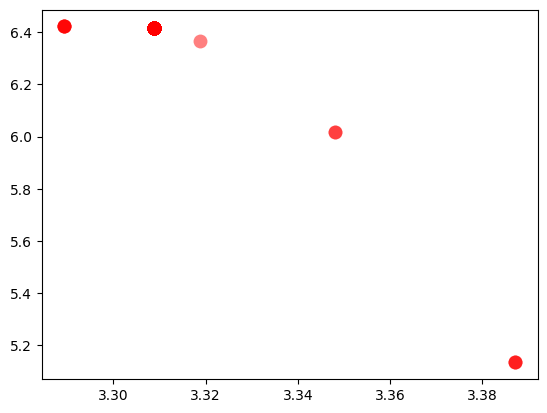

Time for Generation 93: 0.0580 seconds
Generation: 94
Max F_values: 641.7842408655421


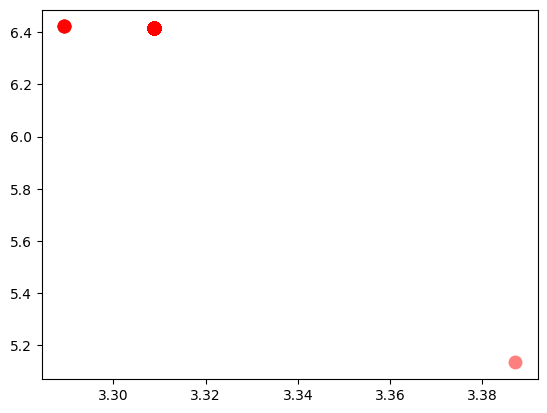

Time for Generation 94: 0.0530 seconds
Generation: 95
Max F_values: 641.7842408655421


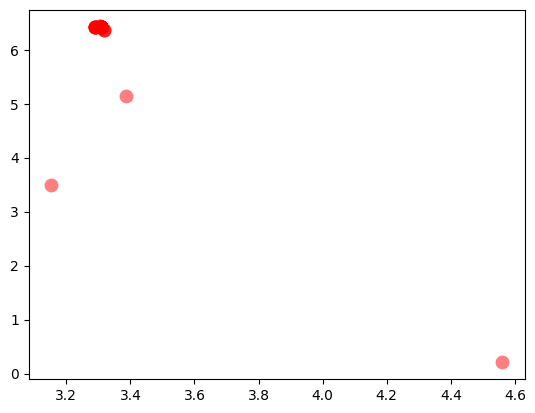

Time for Generation 95: 0.0586 seconds
Generation: 96
Max F_values: 641.7842408655421


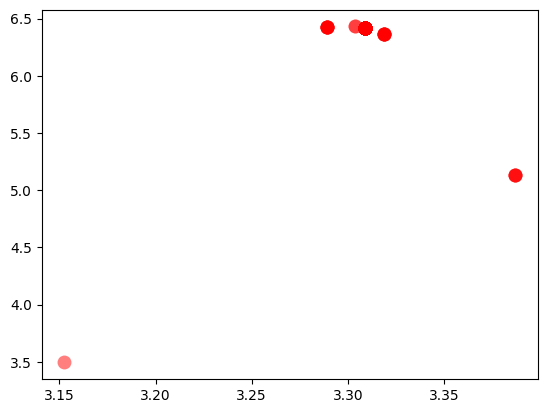

Time for Generation 96: 0.0578 seconds
Generation: 97
Max F_values: 641.7842408655421


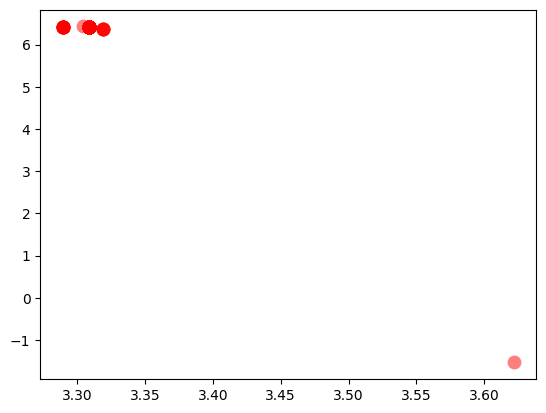

Time for Generation 97: 0.0502 seconds
Generation: 98
Max F_values: 641.7842408655421


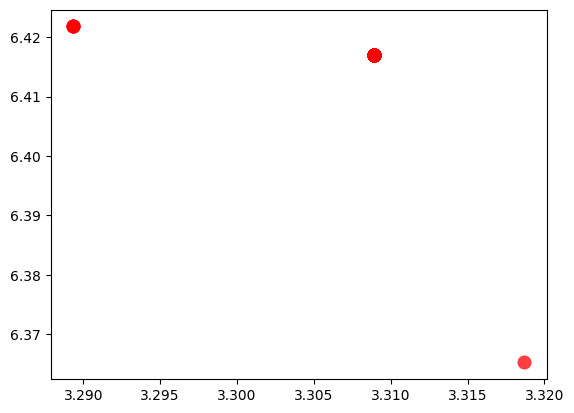

Time for Generation 98: 0.0666 seconds
Generation: 99
Max F_values: 641.7842408655421


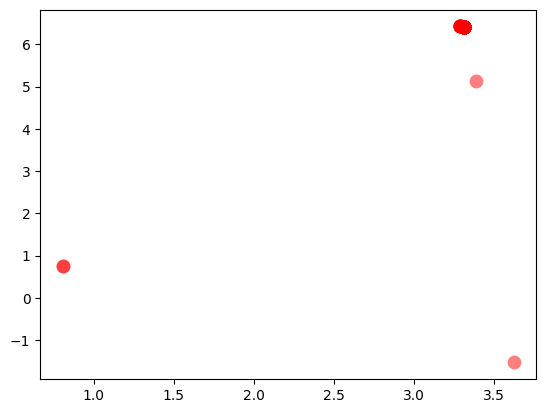

Time for Generation 99: 0.0566 seconds
Generation: 100
Max F_values: 641.7842408655421


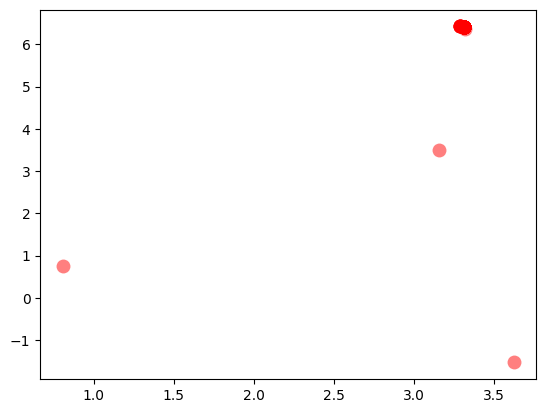

Time for Generation 100: 0.0600 seconds
Generation: 101
Max F_values: 641.7842408655421


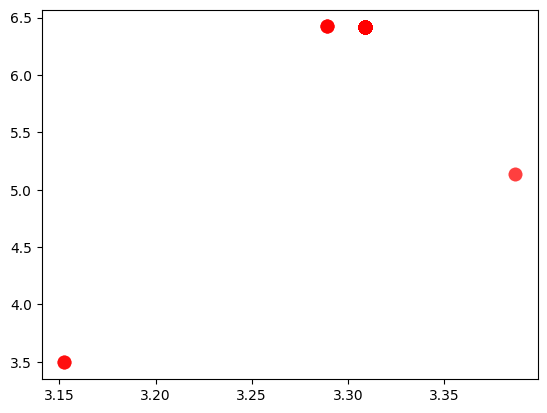

Time for Generation 101: 0.0668 seconds
Generation: 102
Max F_values: 641.7842408655421


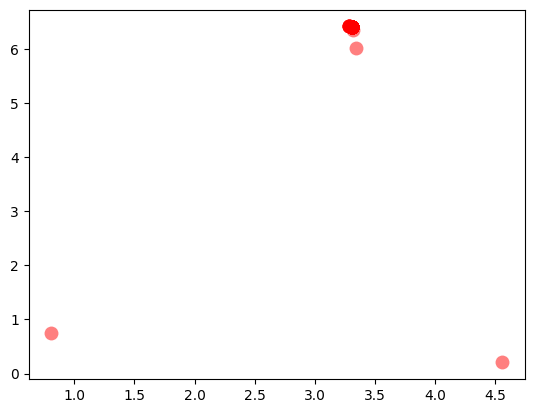

Time for Generation 102: 0.0503 seconds
Generation: 103
Max F_values: 641.7842408655421


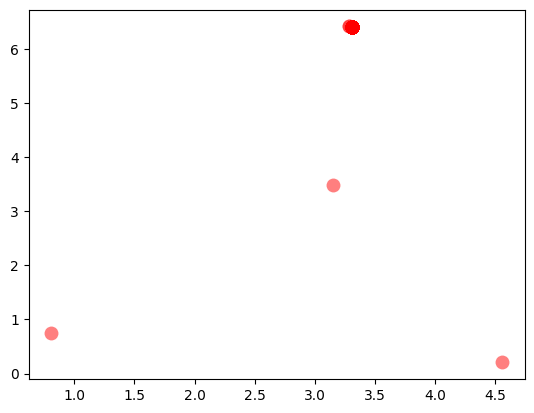

Time for Generation 103: 0.0668 seconds
Generation: 104
Max F_values: 641.7842408655421


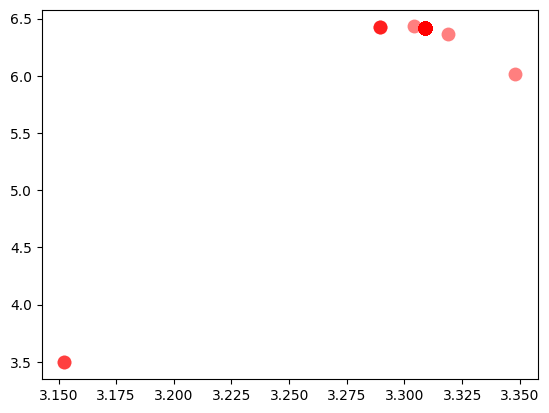

Time for Generation 104: 0.0661 seconds
Generation: 105
Max F_values: 641.7842408655421


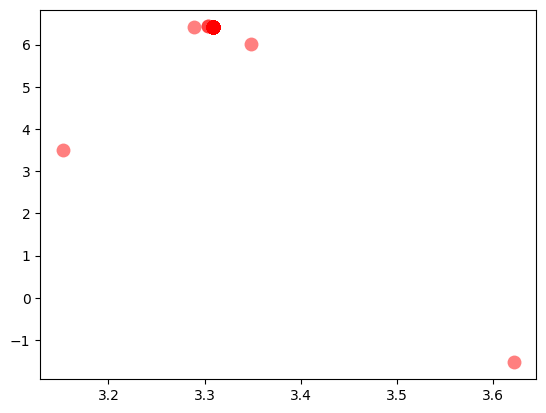

Time for Generation 105: 0.0502 seconds
Generation: 106
Max F_values: 641.7842408655421


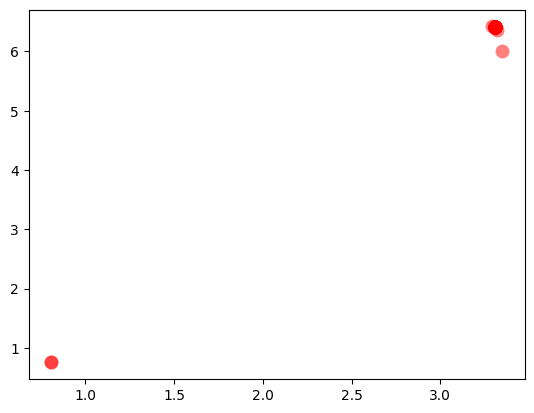

Time for Generation 106: 0.0500 seconds
Generation: 107
Max F_values: 641.7842408655421


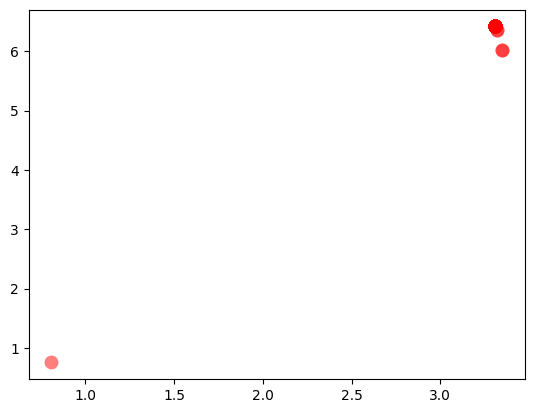

Time for Generation 107: 0.0614 seconds
Generation: 108
Max F_values: 641.7842408655421


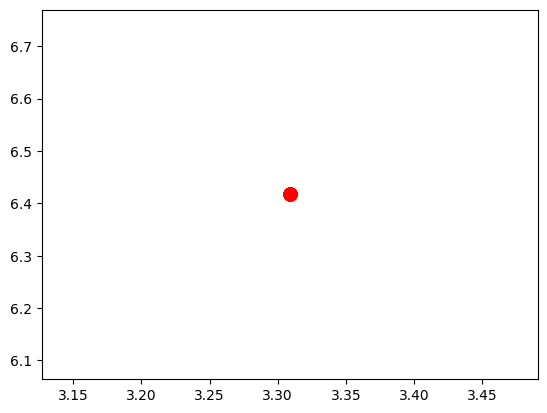

Time for Generation 108: 0.0550 seconds
Generation: 109
Max F_values: 641.7842408655421


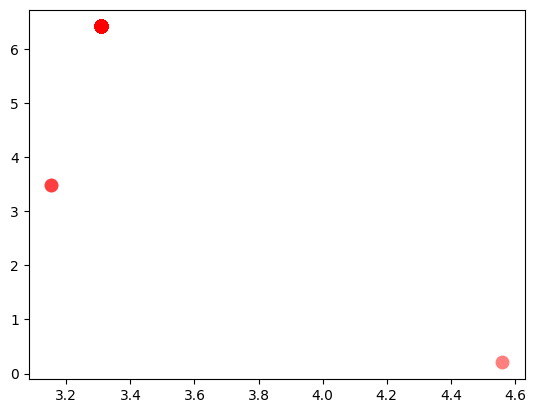

Time for Generation 109: 0.0643 seconds
Generation: 110
Max F_values: 641.7842408655421


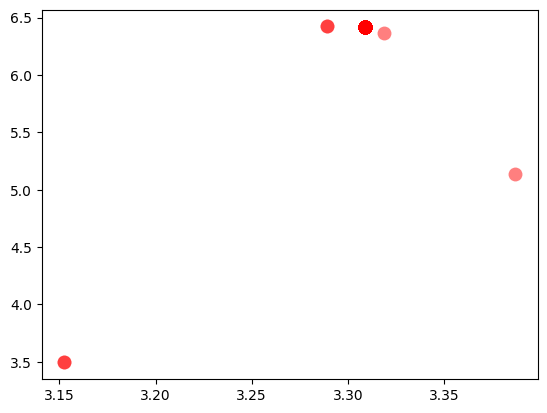

Time for Generation 110: 0.1103 seconds
Generation: 111
Max F_values: 641.7842408655421


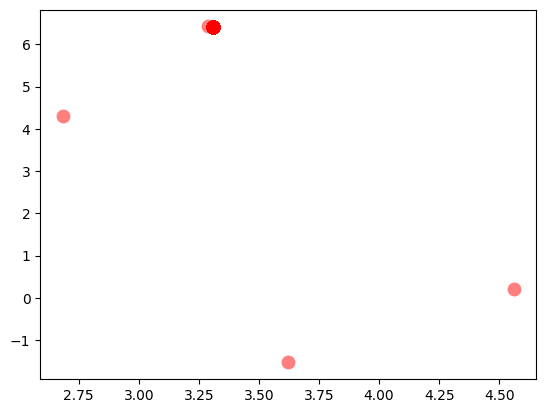

Time for Generation 111: 0.0588 seconds
Generation: 112
Max F_values: 641.7842408655421


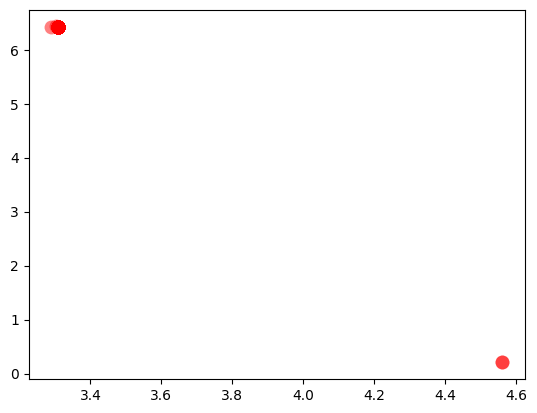

Time for Generation 112: 0.0660 seconds
Generation: 113
Max F_values: 641.7842408655421


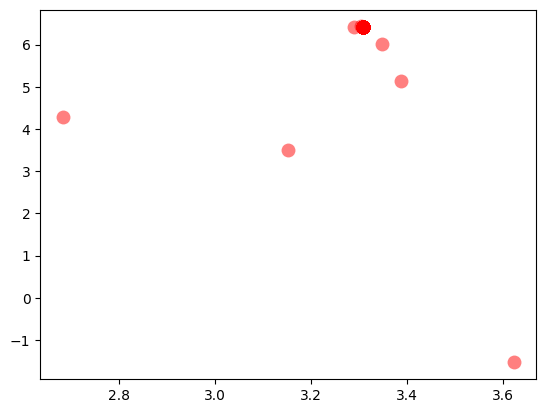

Time for Generation 113: 0.0508 seconds
Generation: 114
Max F_values: 641.7842408655421


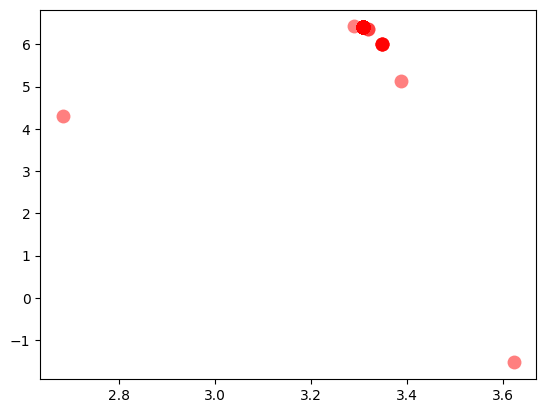

Time for Generation 114: 0.0589 seconds
Generation: 115
Max F_values: 641.7842408655421


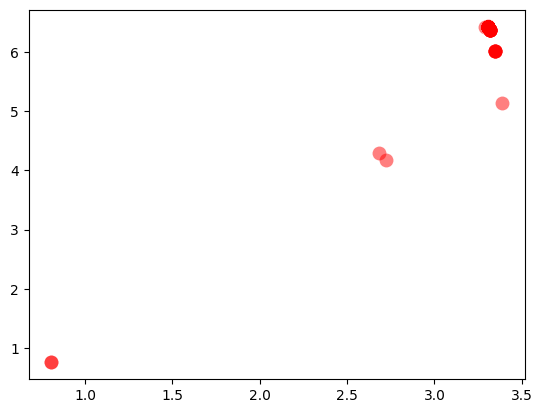

Time for Generation 115: 0.0779 seconds
Generation: 116
Max F_values: 641.7842408655421


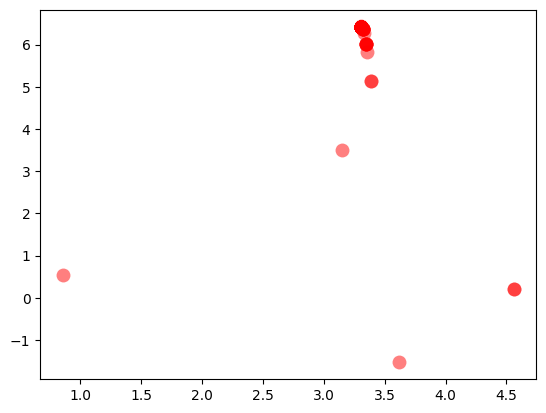

Time for Generation 116: 0.0632 seconds
Generation: 117
Max F_values: 641.7842408655421


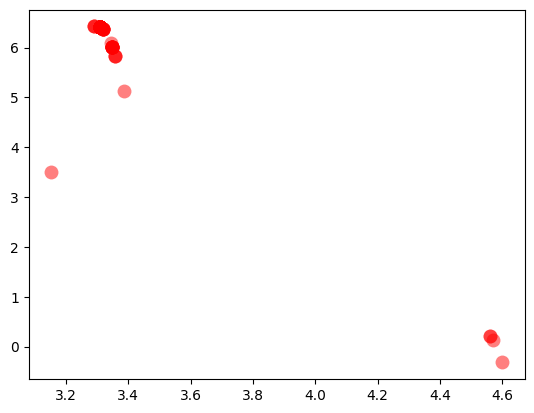

Time for Generation 117: 0.0591 seconds
Generation: 118
Max F_values: 641.7842408655421


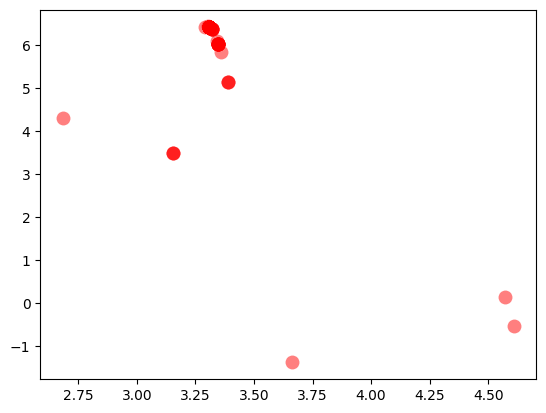

Time for Generation 118: 0.0574 seconds
Generation: 119
Max F_values: 641.7842408655421


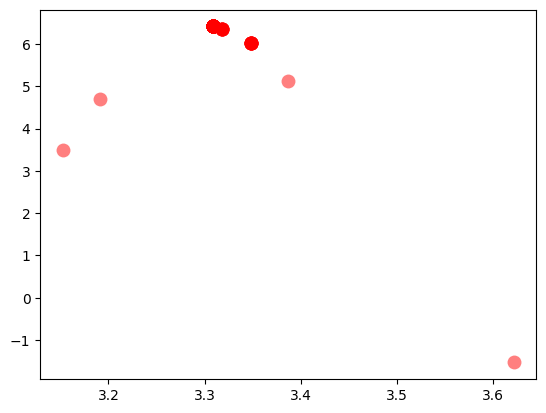

Time for Generation 119: 0.0498 seconds
Generation: 120
Max F_values: 641.7842408655421


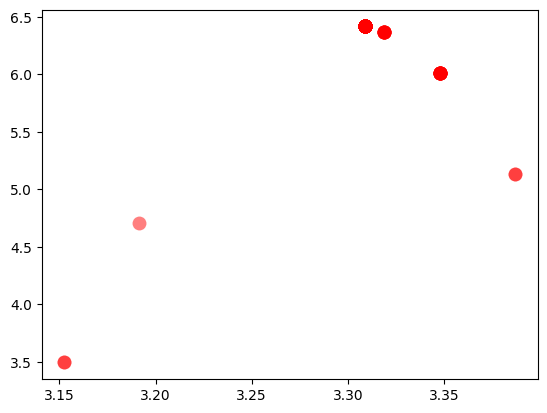

Time for Generation 120: 0.0595 seconds
Generation: 121
Max F_values: 641.7842408655421


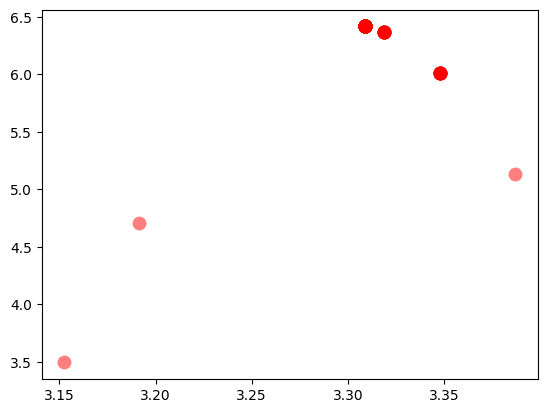

Time for Generation 121: 0.0741 seconds
Generation: 122
Max F_values: 641.7842408655421


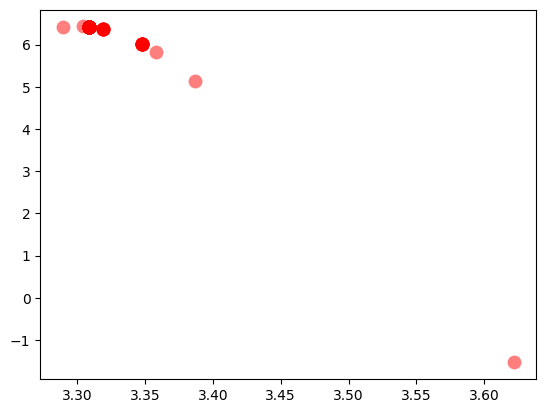

Time for Generation 122: 0.0616 seconds
Generation: 123
Max F_values: 641.7842408655421


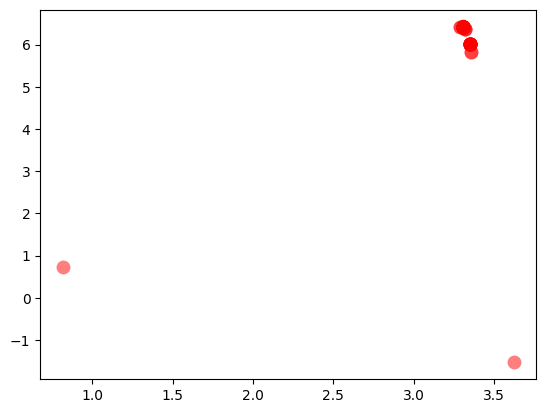

Time for Generation 123: 0.0549 seconds
Generation: 124
Max F_values: 641.7842408655421


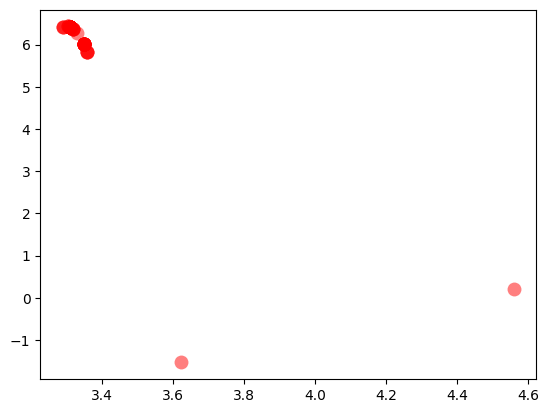

Time for Generation 124: 0.0574 seconds
Generation: 125
Max F_values: 641.7842408655421


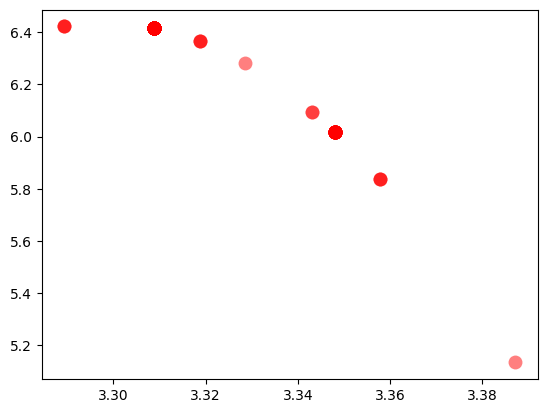

Time for Generation 125: 0.0544 seconds
Generation: 126
Max F_values: 641.7842408655421


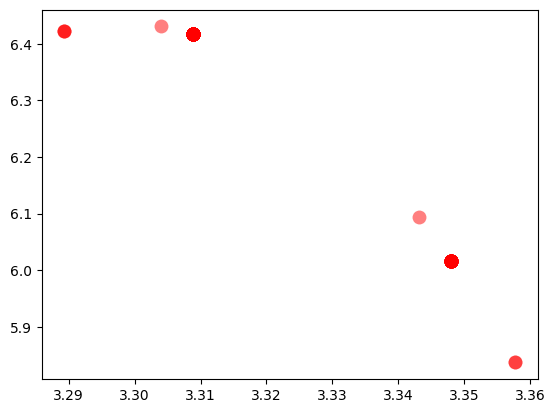

Time for Generation 126: 0.0557 seconds
Generation: 127
Max F_values: 641.7842408655421


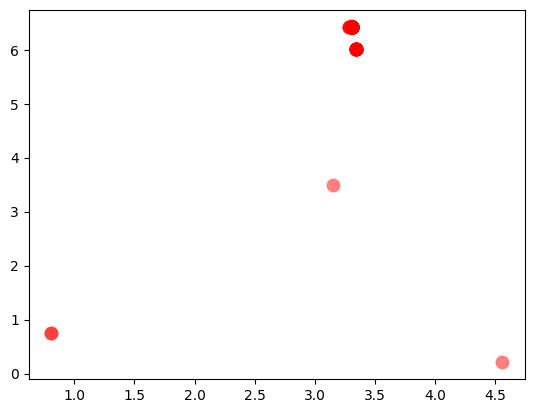

Time for Generation 127: 0.0572 seconds
Generation: 128
Max F_values: 641.7842408655421


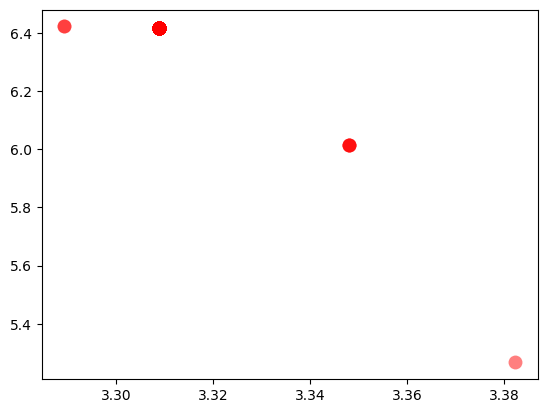

Time for Generation 128: 0.0819 seconds
Generation: 129
Max F_values: 641.7842408655421


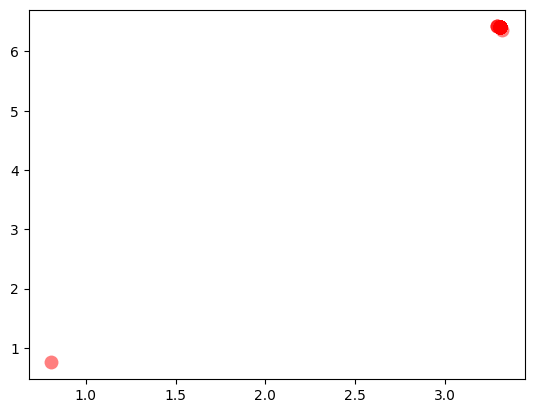

Time for Generation 129: 0.0523 seconds
Generation: 130
Max F_values: 641.7842408655421


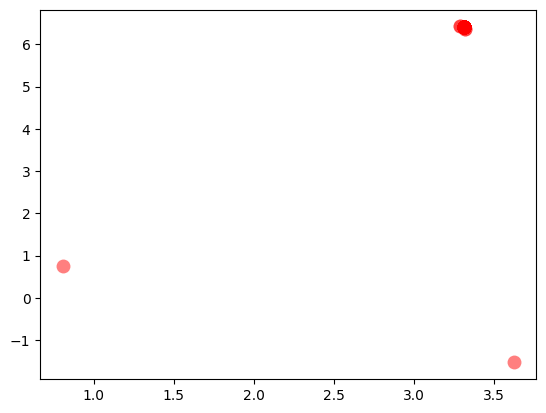

Time for Generation 130: 0.0832 seconds
Generation: 131
Max F_values: 641.7842408655421


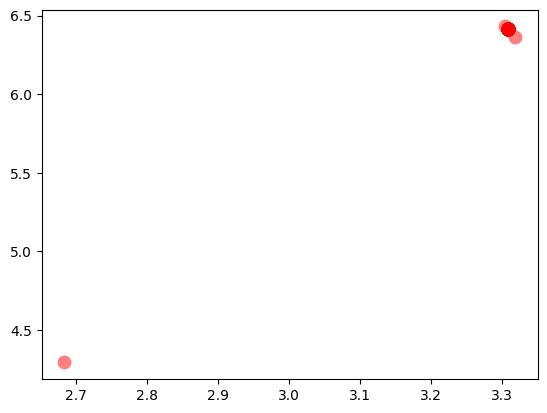

Time for Generation 131: 0.0662 seconds
Generation: 132
Max F_values: 641.7842408655421


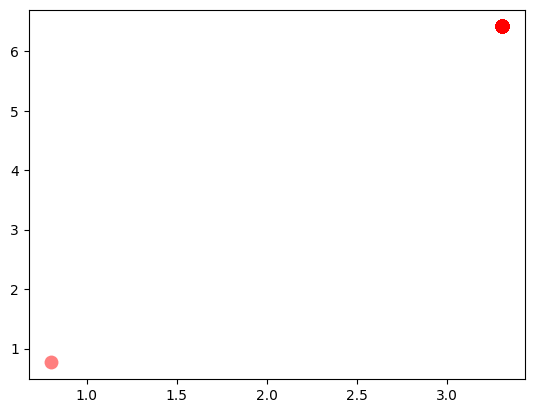

Time for Generation 132: 0.0504 seconds
Generation: 133
Max F_values: 641.7842408655421


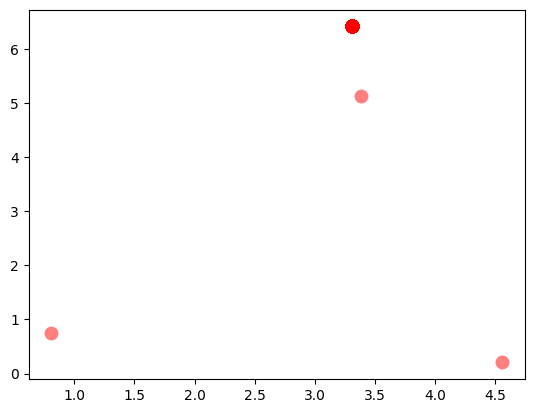

Time for Generation 133: 0.0610 seconds
Generation: 134
Max F_values: 641.7842408655421


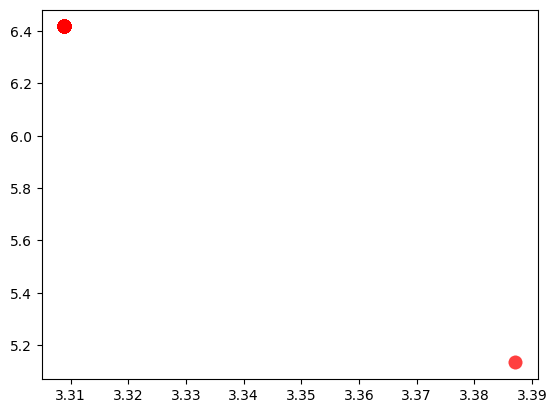

Time for Generation 134: 0.0553 seconds
Generation: 135
Max F_values: 641.7842408655421


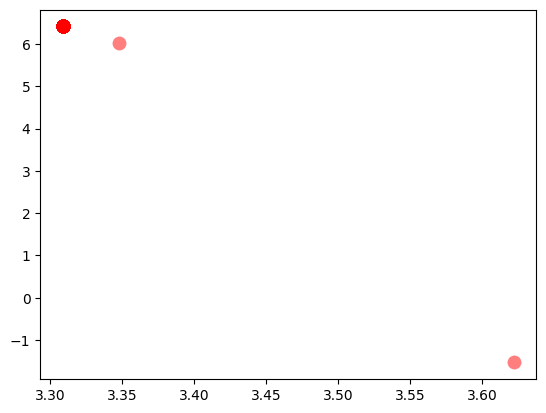

Time for Generation 135: 0.0679 seconds
Generation: 136
Max F_values: 641.7842408655421


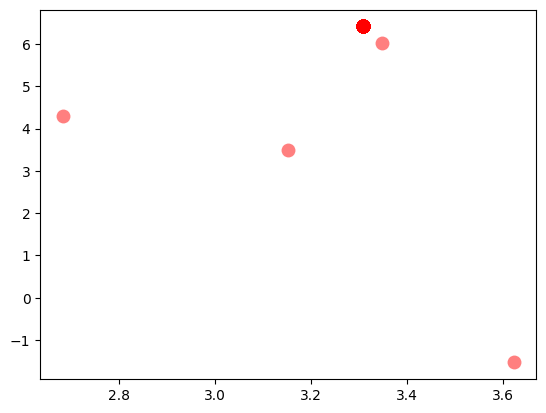

Time for Generation 136: 0.0573 seconds
Generation: 137
Max F_values: 641.7842408655421


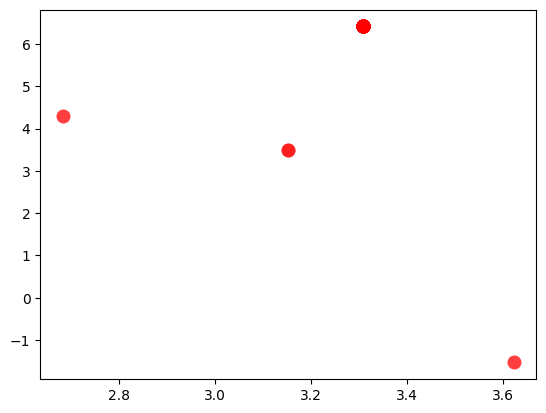

Time for Generation 137: 0.0713 seconds
Generation: 138
Max F_values: 641.7842408655421


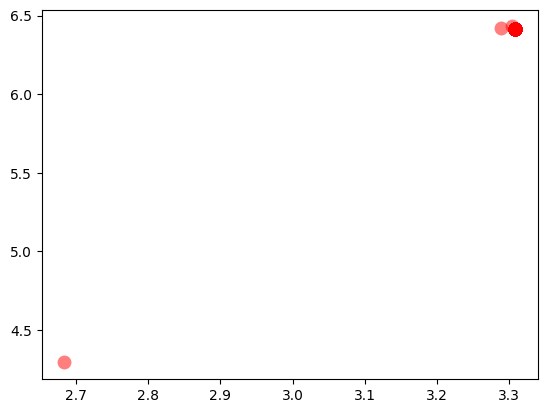

Time for Generation 138: 0.0538 seconds
Generation: 139
Max F_values: 641.7842408655421


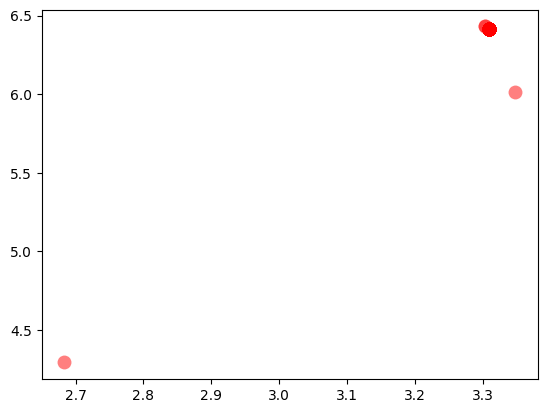

Time for Generation 139: 0.0500 seconds
Generation: 140
Max F_values: 641.7842408655421


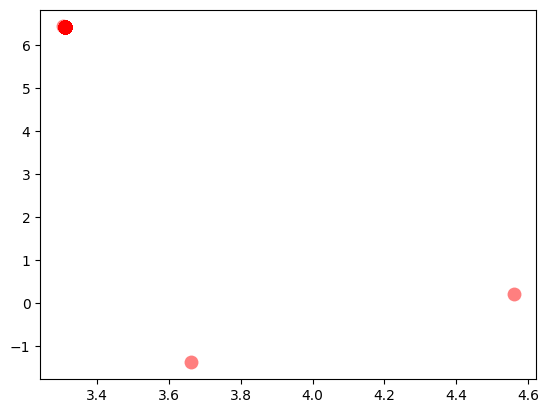

Time for Generation 140: 0.0661 seconds
Generation: 141
Max F_values: 641.7842408655421


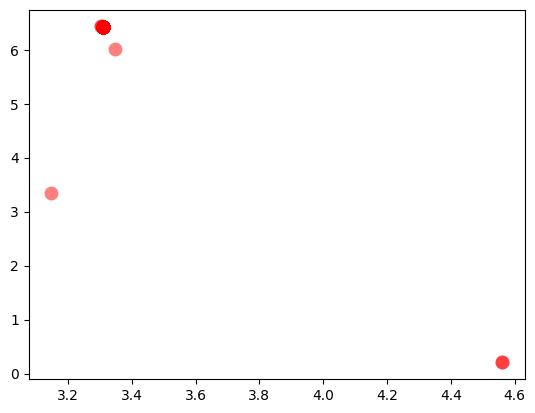

Time for Generation 141: 0.0509 seconds
Generation: 142
Max F_values: 641.7842408655421


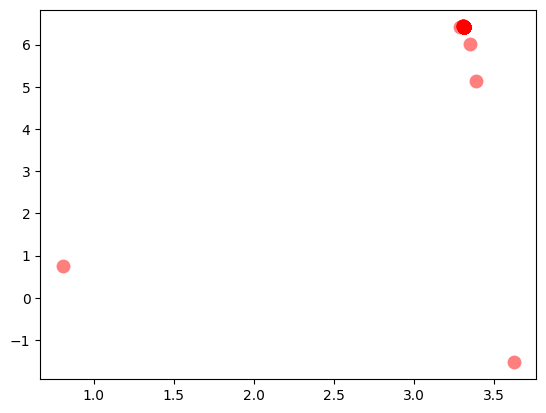

Time for Generation 142: 0.0658 seconds
Generation: 143
Max F_values: 641.7842408655421


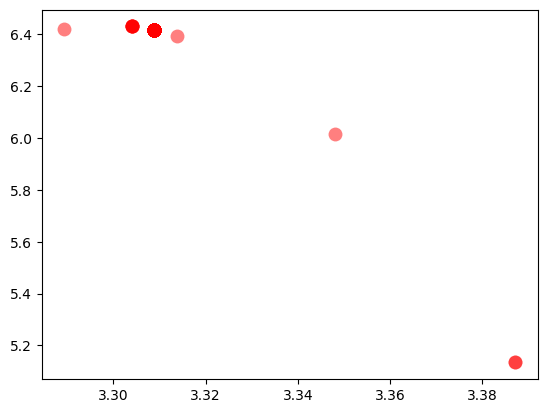

Time for Generation 143: 0.0666 seconds
Generation: 144
Max F_values: 641.7842408655421


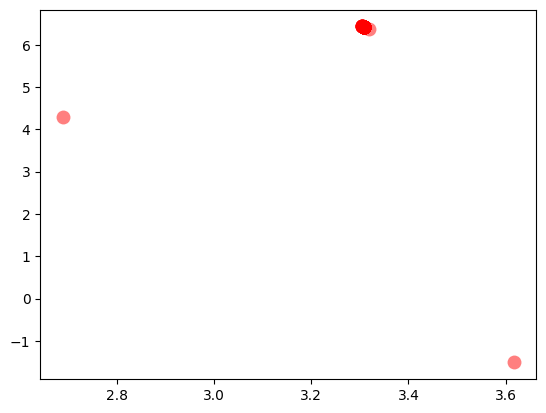

Time for Generation 144: 0.0506 seconds
Generation: 145
Max F_values: 641.7842408655421


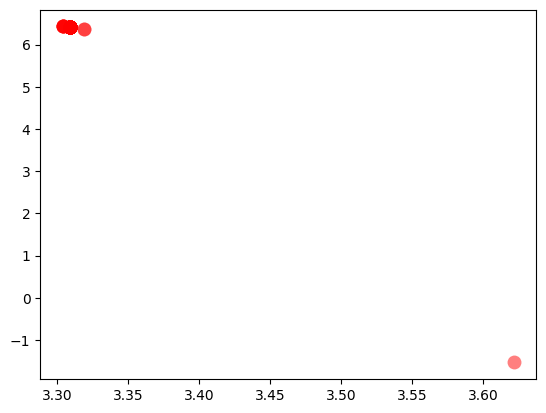

Time for Generation 145: 0.0665 seconds
Generation: 146
Max F_values: 641.7842408655421


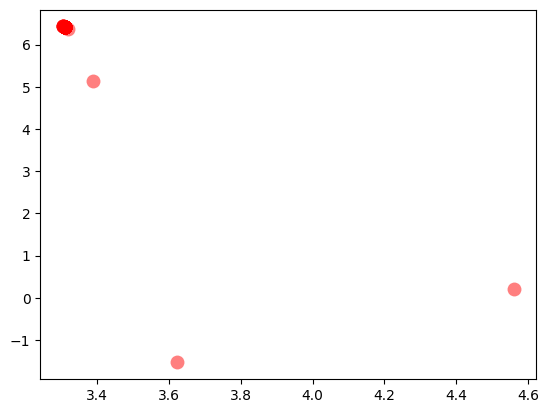

Time for Generation 146: 0.0499 seconds
Generation: 147
Max F_values: 641.7842408655421


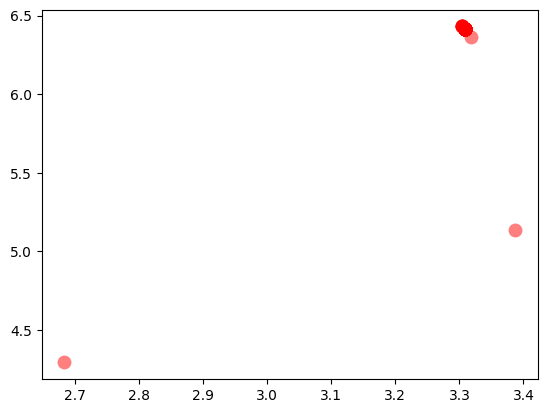

Time for Generation 147: 0.0666 seconds
Generation: 148
Max F_values: 641.7842408655421


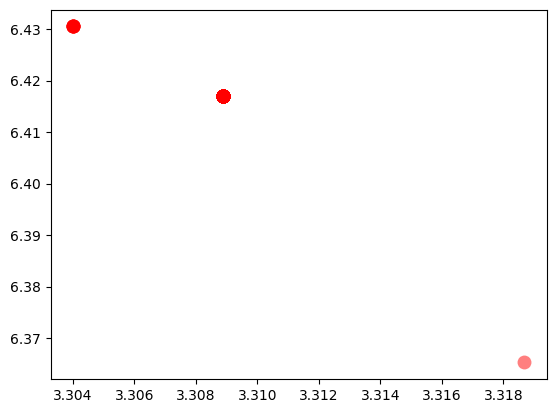

Time for Generation 148: 0.0597 seconds
Generation: 149
Max F_values: 641.7842408655421


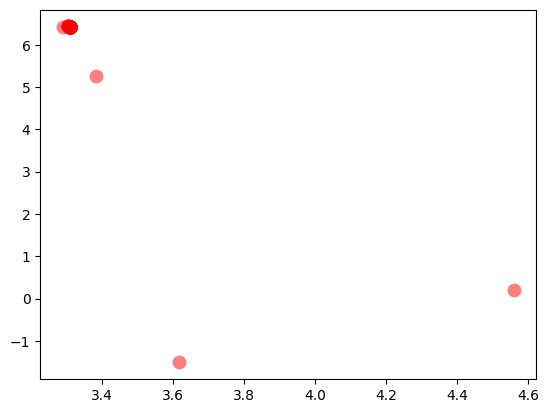

Time for Generation 149: 0.0577 seconds
Generation: 150
Max F_values: 641.7842408655421


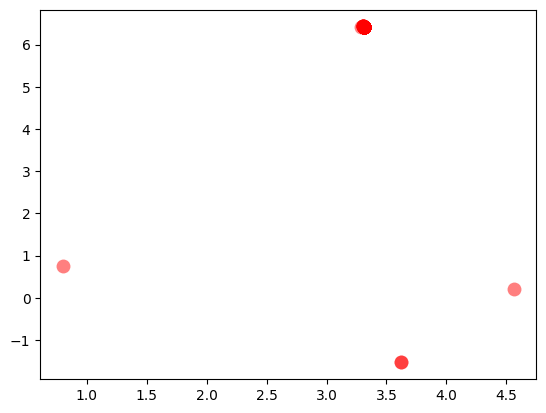

Time for Generation 150: 0.0677 seconds
Generation: 151
Max F_values: 641.7842408655421


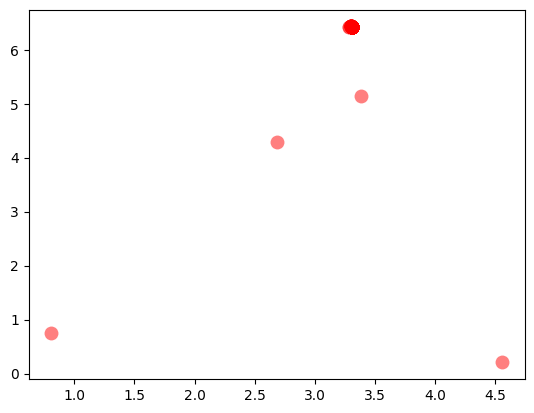

Time for Generation 151: 0.1157 seconds
Generation: 152
Max F_values: 641.7842408655421


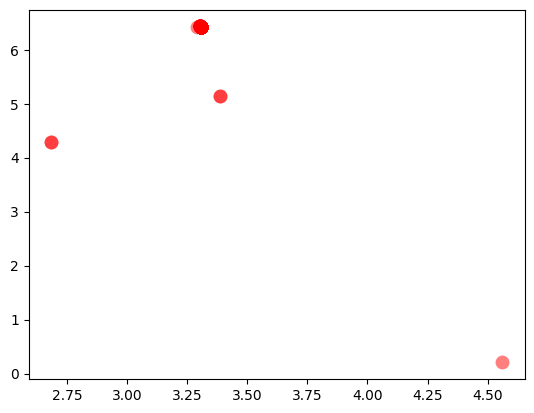

Time for Generation 152: 0.0620 seconds
Generation: 153
Max F_values: 641.7842408655421


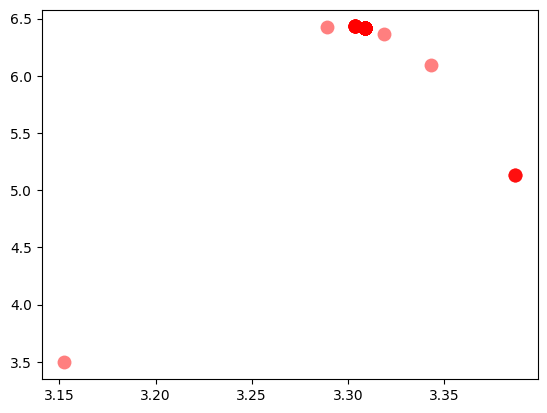

Time for Generation 153: 0.0508 seconds
Generation: 154
Max F_values: 641.7842408655421


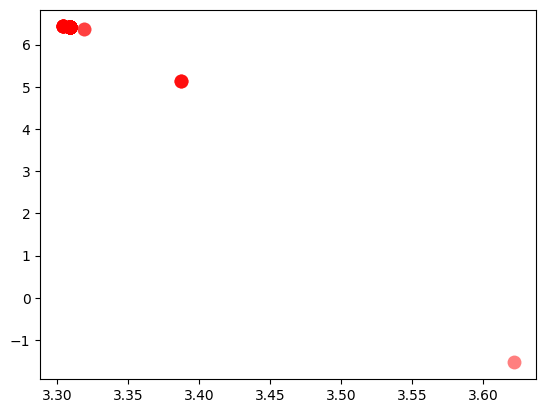

Time for Generation 154: 0.0669 seconds
Generation: 155
Max F_values: 641.7842408655421


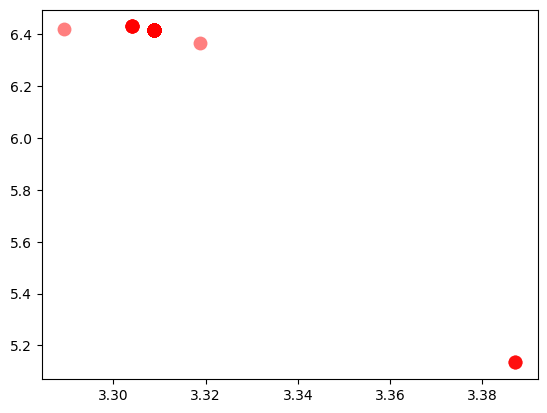

Time for Generation 155: 0.0662 seconds
Generation: 156
Max F_values: 641.7842408655421


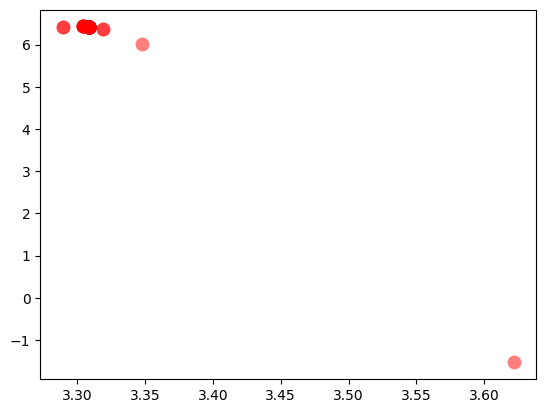

Time for Generation 156: 0.0664 seconds
Generation: 157
Max F_values: 641.7842408655421


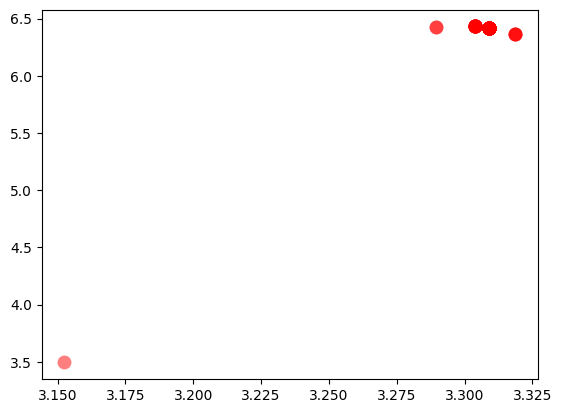

Time for Generation 157: 0.0666 seconds
Generation: 158
Max F_values: 641.7842408655421


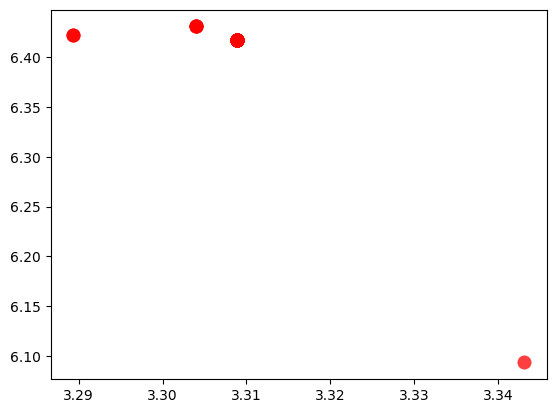

Time for Generation 158: 0.0499 seconds
Generation: 159
Max F_values: 641.7842408655421


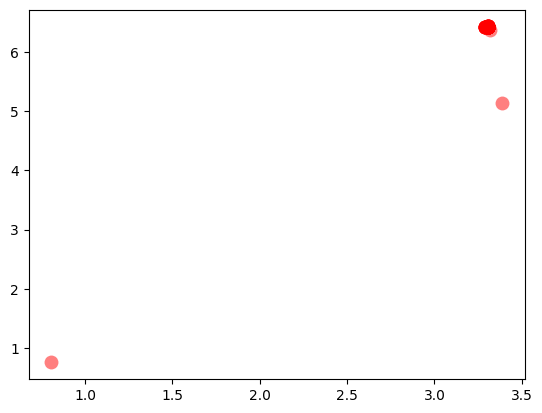

Time for Generation 159: 0.0606 seconds
Generation: 160
Max F_values: 641.8702069664205


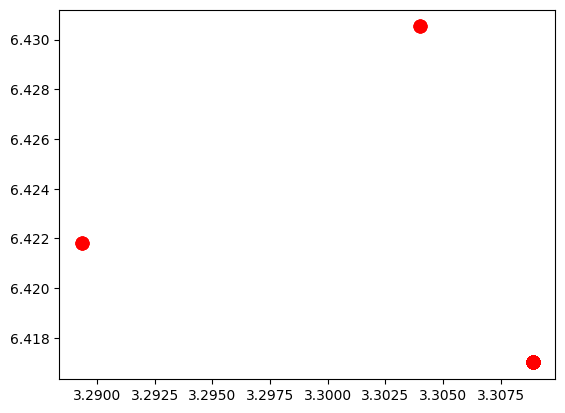

Time for Generation 160: 0.0794 seconds
Generation: 161
Max F_values: 642.1047241751999


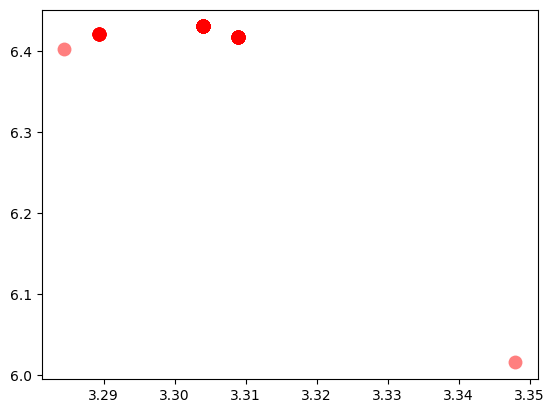

Time for Generation 161: 0.0617 seconds
Generation: 162
Max F_values: 642.1047241751999


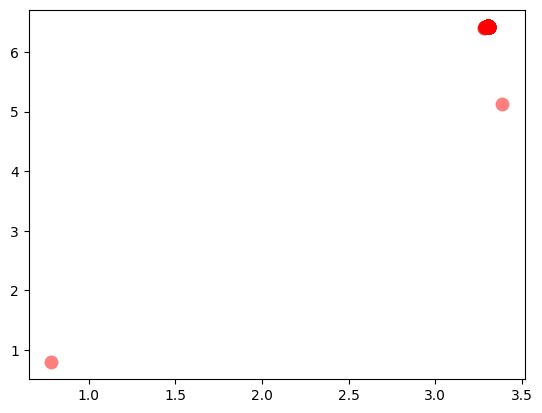

Time for Generation 162: 0.0484 seconds
Generation: 163
Max F_values: 642.1047241751999


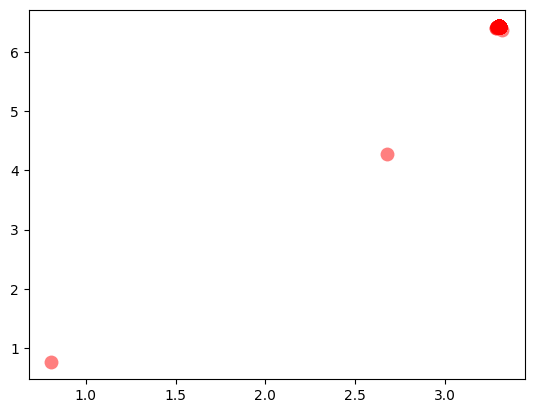

Time for Generation 163: 0.0586 seconds
Generation: 164
Max F_values: 642.1047241751999


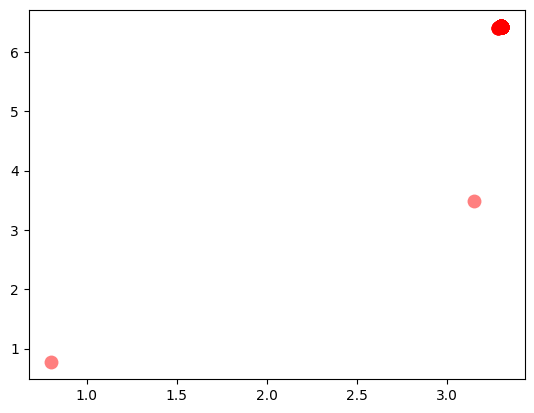

Time for Generation 164: 0.0422 seconds
Generation: 165
Max F_values: 642.1047241751999


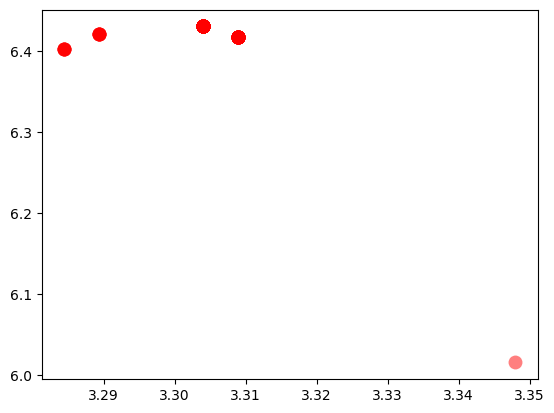

Time for Generation 165: 0.0661 seconds
Generation: 166
Max F_values: 642.6351020665231


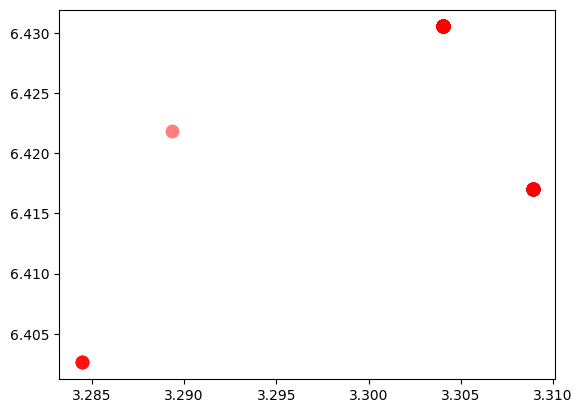

Time for Generation 166: 0.0603 seconds
Generation: 167
Max F_values: 642.6351020665231


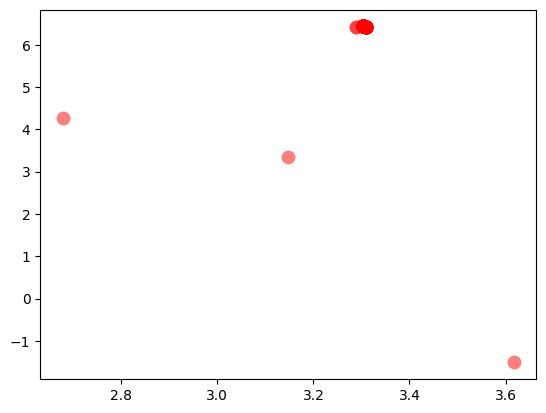

Time for Generation 167: 0.0560 seconds
Generation: 168
Max F_values: 642.6351020665231


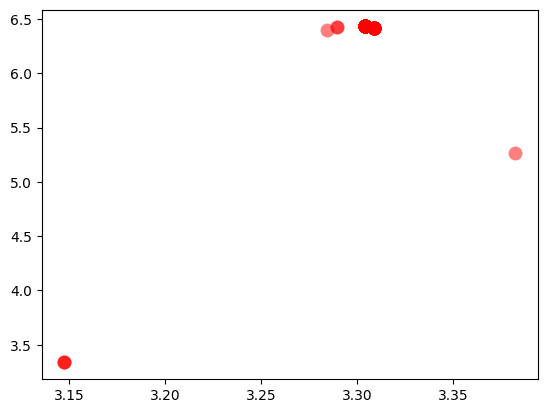

Time for Generation 168: 0.0670 seconds
Generation: 169
Max F_values: 642.6351020665231


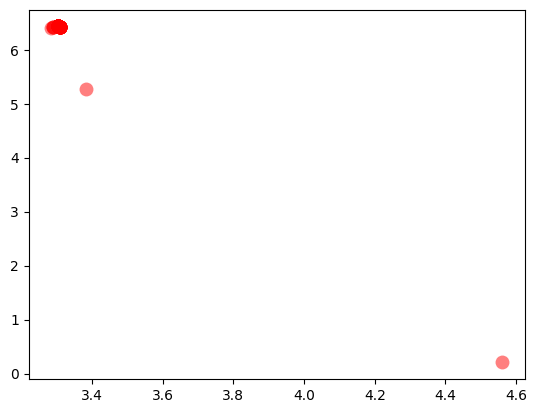

Time for Generation 169: 0.0618 seconds
Generation: 170
Max F_values: 642.6351020665231


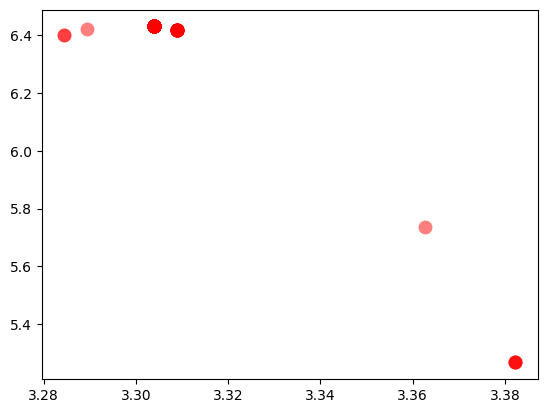

Time for Generation 170: 0.0555 seconds
Generation: 171
Max F_values: 642.6351020665231


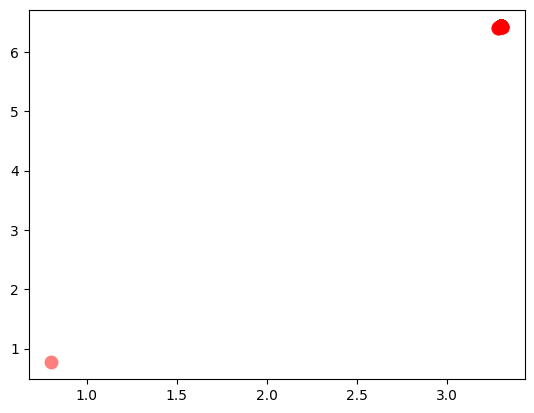

Time for Generation 171: 0.0490 seconds
Generation: 172
Max F_values: 642.6351020665231


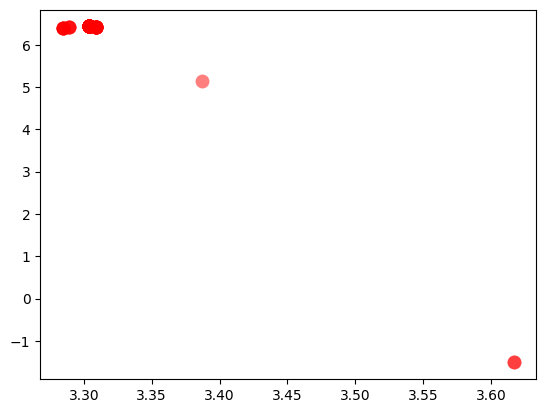

Time for Generation 172: 0.1002 seconds
Generation: 173
Max F_values: 642.6351020665231


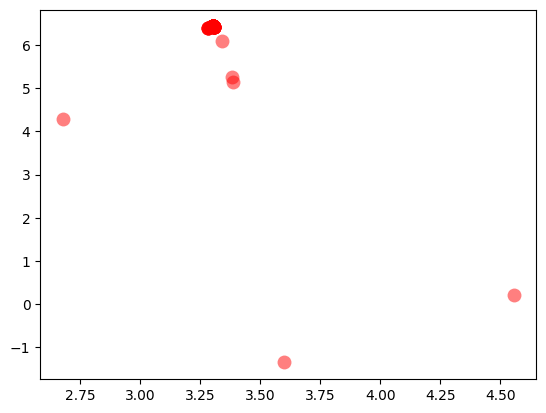

Time for Generation 173: 0.0679 seconds
Generation: 174
Max F_values: 642.6351020665231


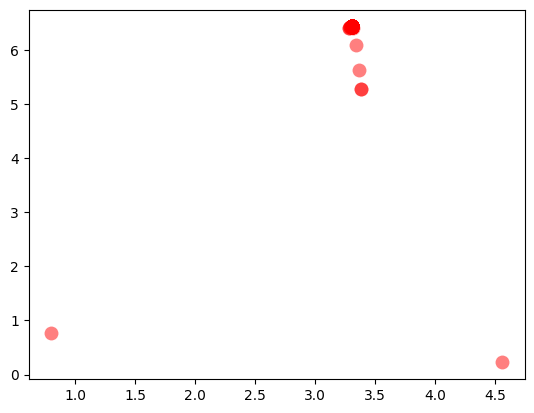

Time for Generation 174: 0.0485 seconds
Generation: 175
Max F_values: 642.6351020665231


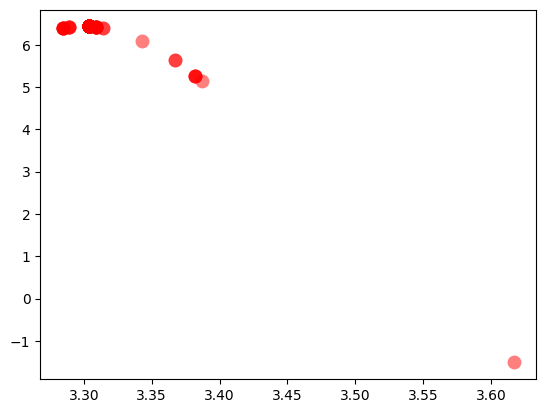

Time for Generation 175: 0.0672 seconds
Generation: 176
Max F_values: 642.6351020665231


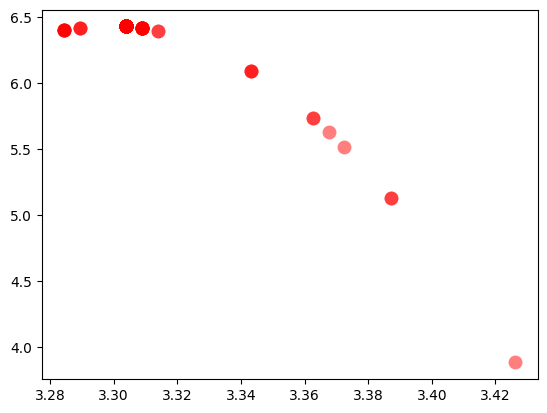

Time for Generation 176: 0.0756 seconds
Generation: 177
Max F_values: 642.6351020665231


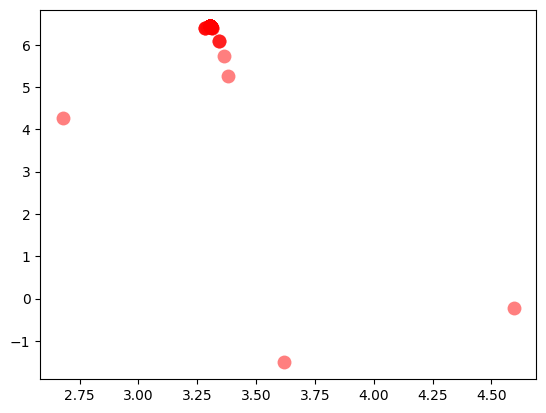

Time for Generation 177: 0.0664 seconds
Generation: 178
Max F_values: 642.6351020665231


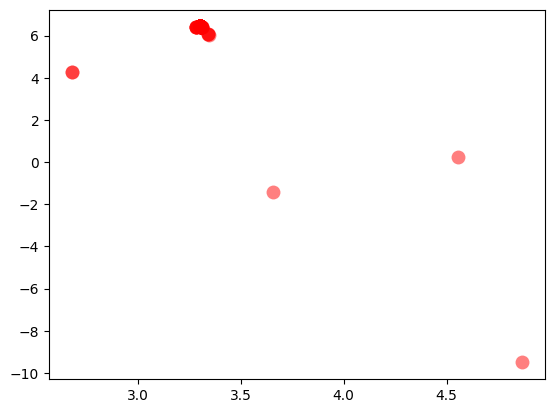

Time for Generation 178: 0.0572 seconds
Generation: 179
Max F_values: 642.6351020665231


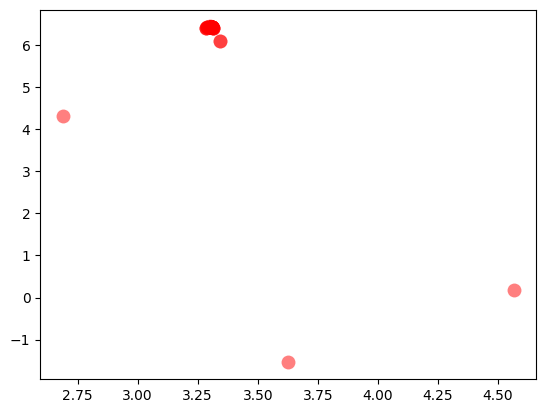

Time for Generation 179: 0.0603 seconds
Generation: 180
Max F_values: 642.6351020665231


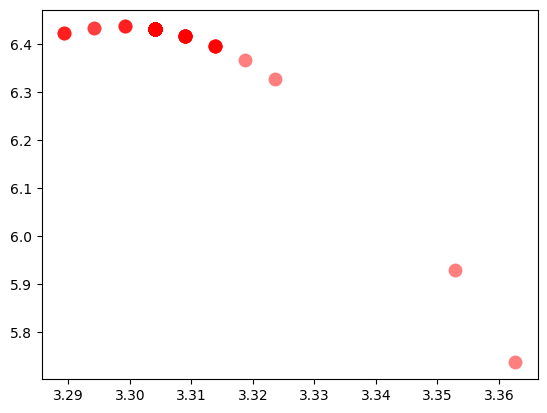

Time for Generation 180: 0.0566 seconds
Generation: 181
Max F_values: 642.6351020665231


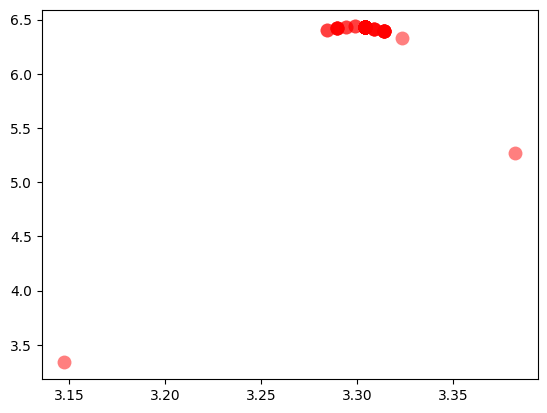

Time for Generation 181: 0.0522 seconds
Generation: 182
Max F_values: 642.6351020665231


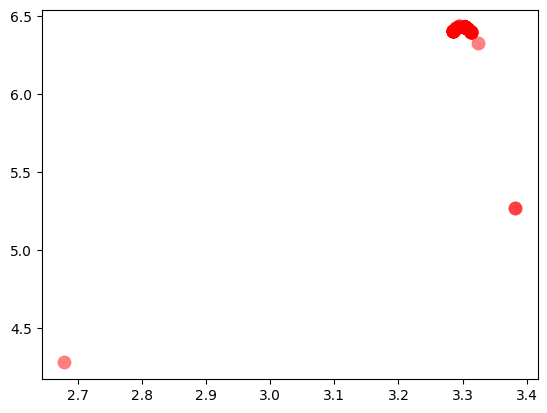

Time for Generation 182: 0.0748 seconds
Generation: 183
Max F_values: 642.6351020665231


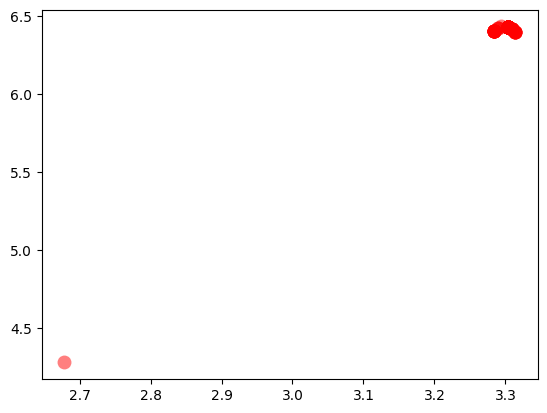

Time for Generation 183: 0.0566 seconds
Generation: 184
Max F_values: 642.6351020665231


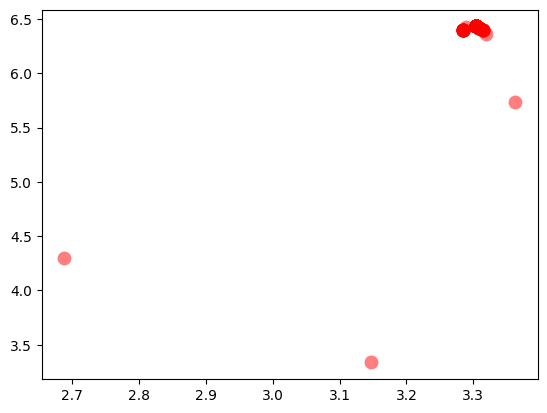

Time for Generation 184: 0.0499 seconds
Generation: 185
Max F_values: 642.6351020665231


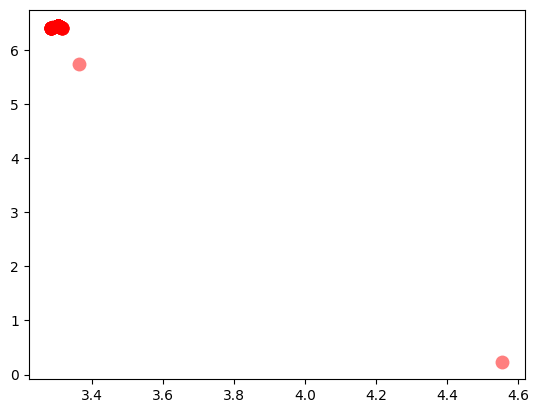

Time for Generation 185: 0.0674 seconds
Generation: 186
Max F_values: 642.6351020665231


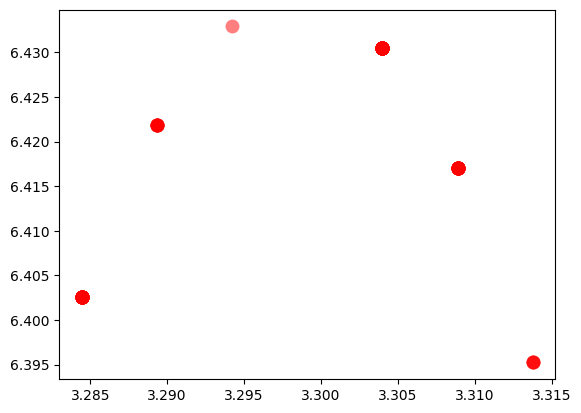

Time for Generation 186: 0.0746 seconds
Generation: 187
Max F_values: 642.6351020665231


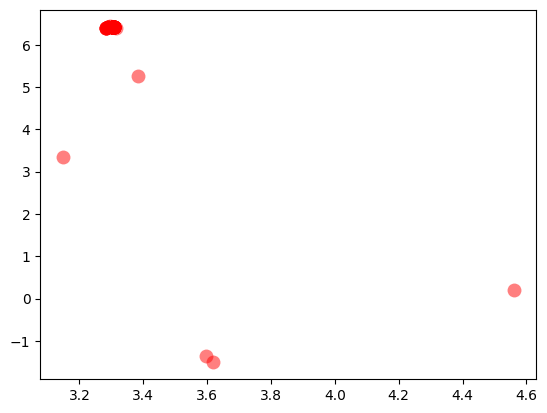

Time for Generation 187: 0.0576 seconds
Generation: 188
Max F_values: 642.6351020665231


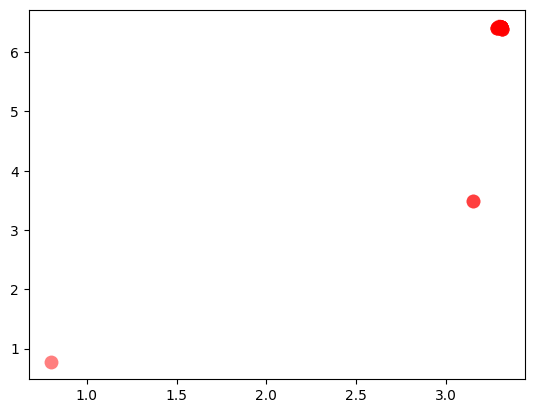

Time for Generation 188: 0.0627 seconds
Generation: 189
Max F_values: 642.6351020665231


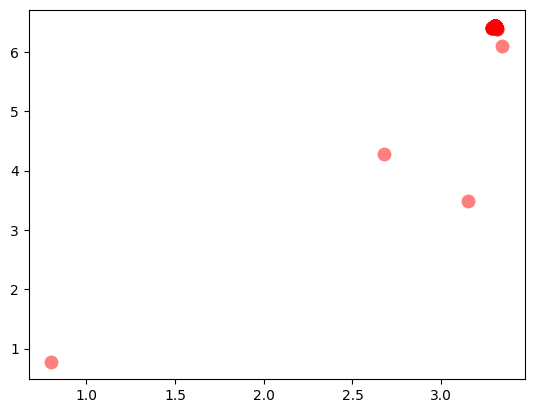

Time for Generation 189: 0.0579 seconds
Generation: 190
Max F_values: 642.6351020665231


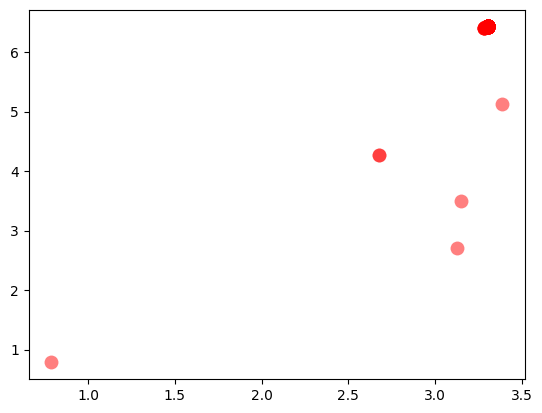

Time for Generation 190: 0.0460 seconds
Generation: 191
Max F_values: 642.6351020665231


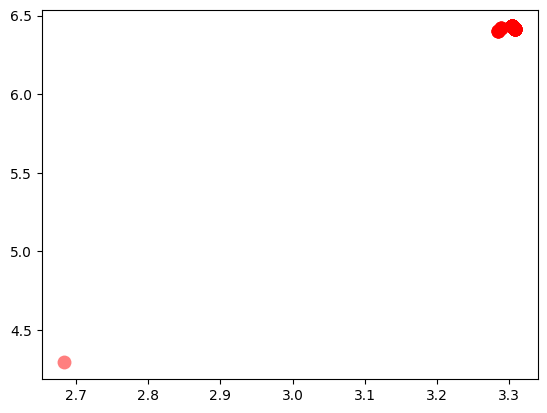

Time for Generation 191: 0.0708 seconds
Generation: 192
Max F_values: 642.6351020665231


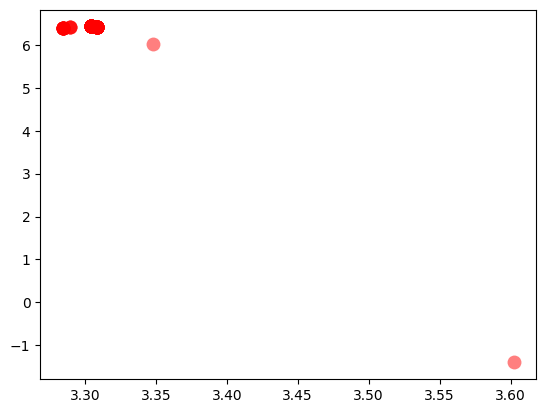

Time for Generation 192: 0.0834 seconds
Generation: 193
Max F_values: 642.6351020665231


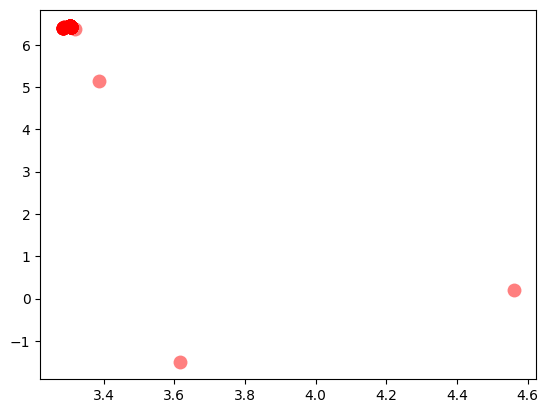

Time for Generation 193: 0.1003 seconds
Generation: 194
Max F_values: 642.6351020665231


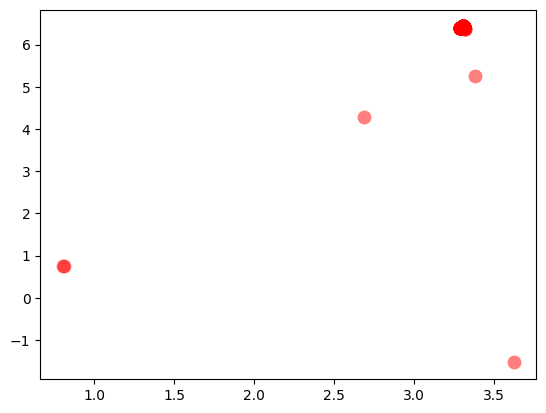

Time for Generation 194: 0.0623 seconds
Generation: 195
Max F_values: 642.6351020665231


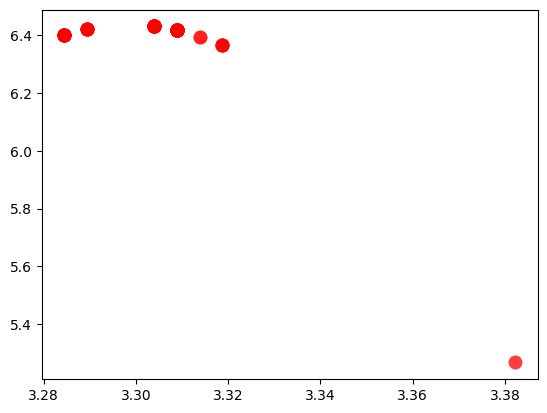

Time for Generation 195: 0.0504 seconds
Generation: 196
Max F_values: 642.6351020665231


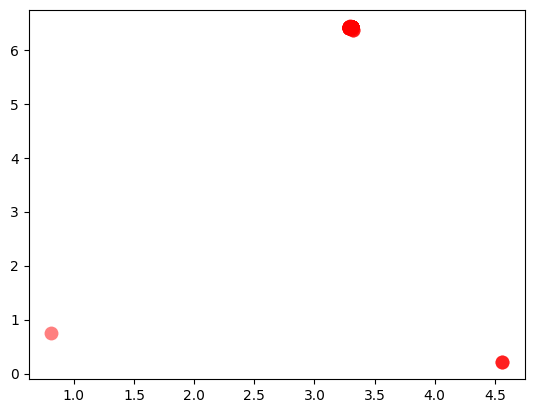

Time for Generation 196: 0.0503 seconds
Generation: 197
Max F_values: 642.6351020665231


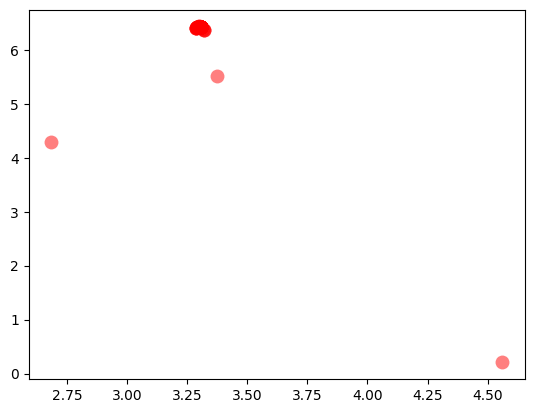

Time for Generation 197: 0.0659 seconds
Generation: 198
Max F_values: 642.6351020665231


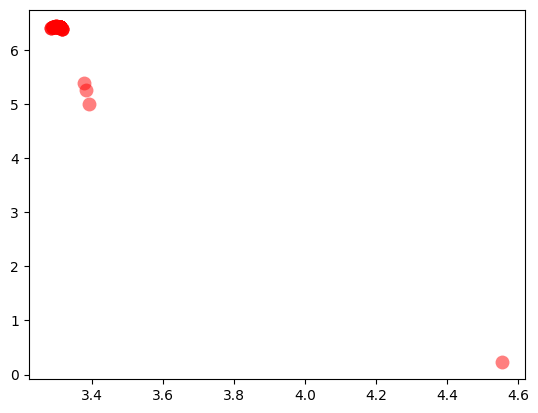

Time for Generation 198: 0.0676 seconds
Generation: 199
Max F_values: 642.6351020665231


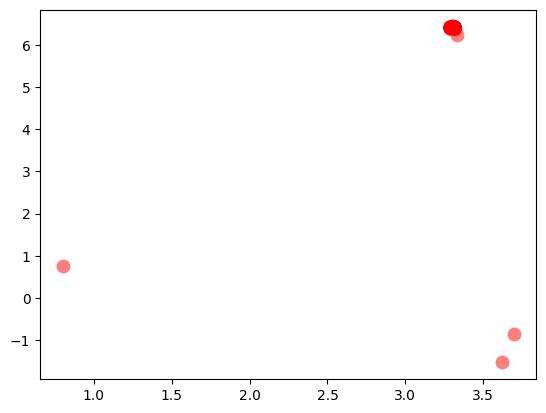

Time for Generation 199: 0.0666 seconds


([np.float64(-56.07128747178426),
  np.float64(-27.86980832378912),
  np.float64(56.00565605276138),
  np.float64(102.241506634866),
  np.float64(154.68200561783254),
  np.float64(224.08758281133598),
  np.float64(375.5066372390579),
  np.float64(472.7525106129044),
  np.float64(479.8782419354948),
  np.float64(497.2808972112485),
  np.float64(528.210484297106),
  np.float64(556.8818549693149),
  np.float64(548.2391509725541),
  np.float64(548.2231074023775),
  np.float64(546.5311886117177),
  np.float64(591.7213313265465),
  np.float64(594.5203044723944),
  np.float64(601.2187783669301),
  np.float64(607.9135540640011),
  np.float64(592.5041343767136),
  np.float64(616.8133407600118),
  np.float64(627.8442435545205),
  np.float64(619.3629036570387),
  np.float64(625.9275468603935),
  np.float64(634.0303798100923),
  np.float64(631.0276372219608),
  np.float64(621.8030964117851),
  np.float64(631.0670320223086),
  np.float64(640.7578988618708),
  np.float64(619.3545691728708),
  np.flo

In [11]:
performance, time_per_iteration = GA(N_GENERATIONS, pop)
performance, time_per_iteration

## HW3.8 Performance Visualization
Generates a line plot using matplotlib or other tool to visualize the performance of the genetic algorithm over multiple generations.

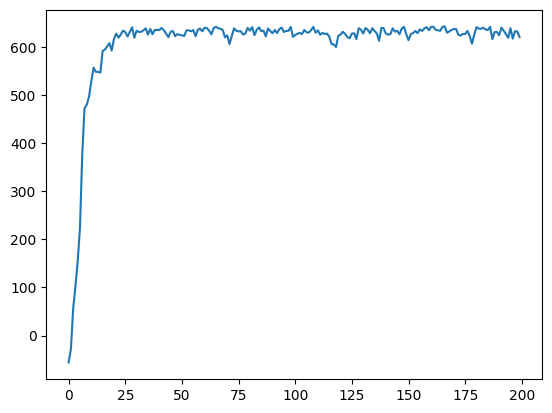

In [12]:
# TODO: Generates a line plot to visualize the genetic algorithm's performance across generations.
plt.plot(range(N_GENERATIONS), performance)

## HW3.9 Discuss1
Increase the mutation rate, follow the above steps, observe the performance, and provide a discussion.

Generation: 0
Max F_values: -56.07128747178426


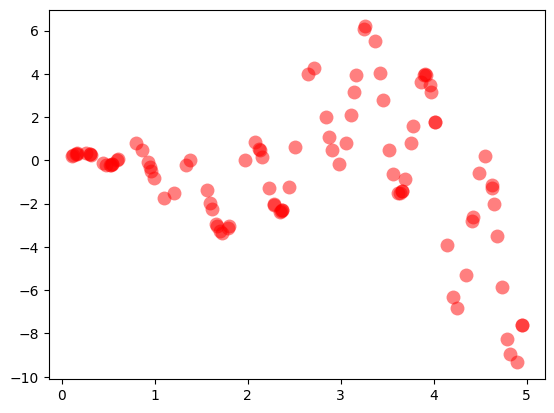

Time for Generation 0: 0.0656 seconds
Generation: 1
Max F_values: 63.2088757574513


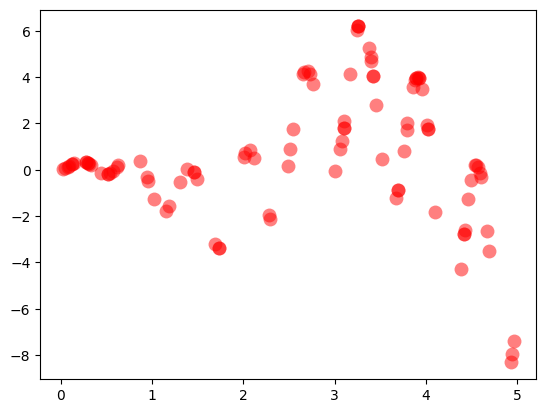

Time for Generation 1: 0.0563 seconds
Generation: 2
Max F_values: 102.63297626510449


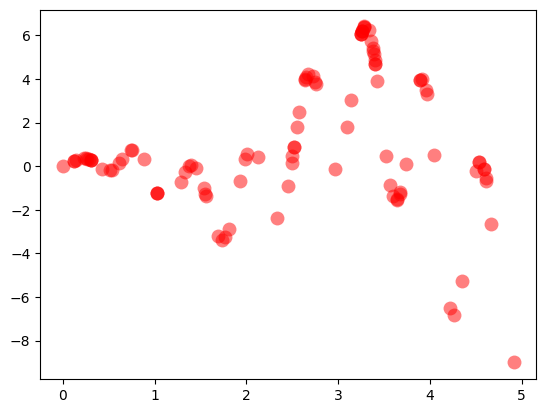

Time for Generation 2: 0.0580 seconds
Generation: 3
Max F_values: 203.08355768504467


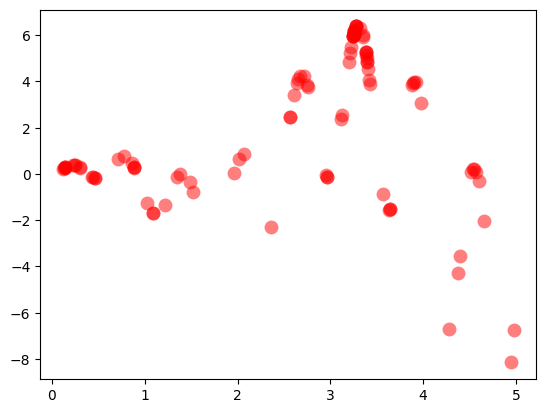

Time for Generation 3: 0.0531 seconds
Generation: 4
Max F_values: 309.2168270424632


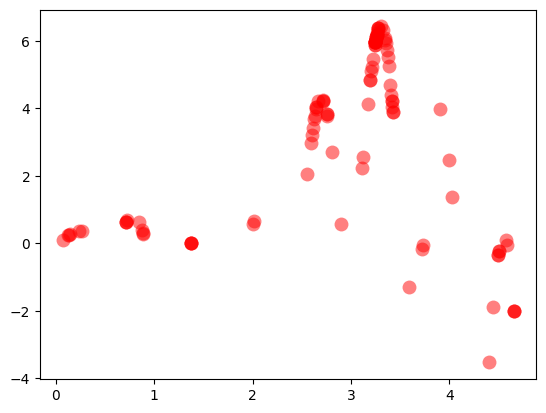

Time for Generation 4: 0.0496 seconds
Generation: 5
Max F_values: 390.7832666198483


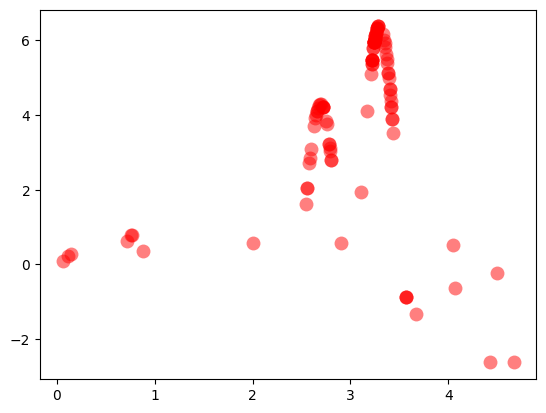

Time for Generation 5: 0.0502 seconds
Generation: 6
Max F_values: 445.6636350274974


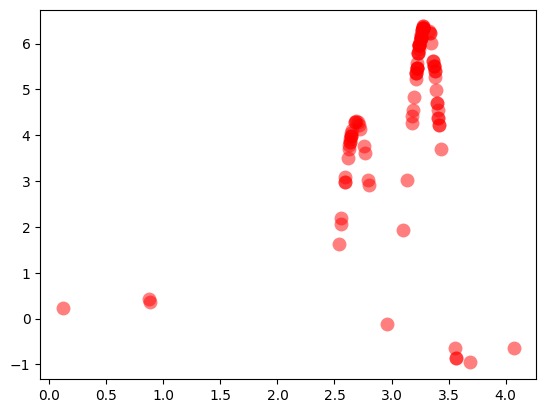

Time for Generation 6: 0.0662 seconds
Generation: 7
Max F_values: 499.65482451376135


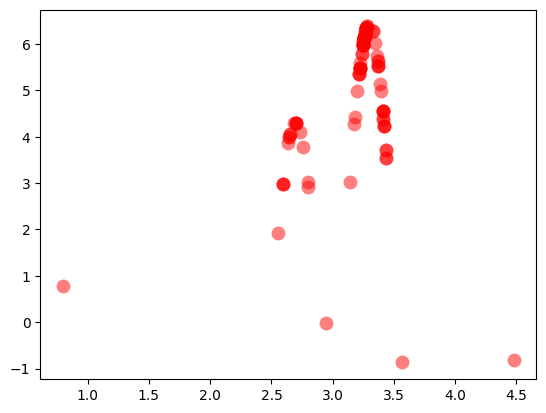

Time for Generation 7: 0.0616 seconds
Generation: 8
Max F_values: 510.3889255973268


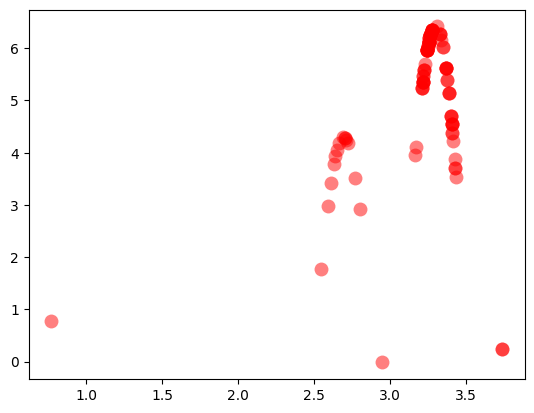

Time for Generation 8: 0.0552 seconds
Generation: 9
Max F_values: 510.3889255973268


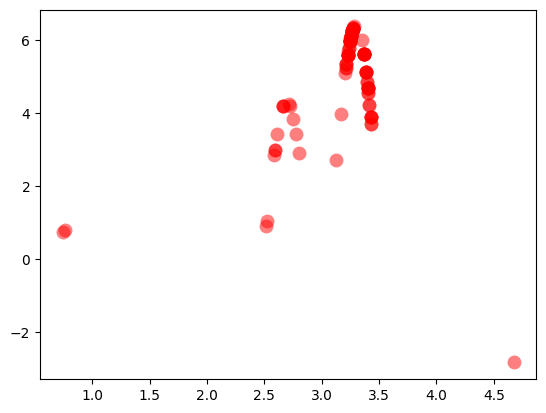

Time for Generation 9: 0.0498 seconds
Generation: 10
Max F_values: 510.3889255973268


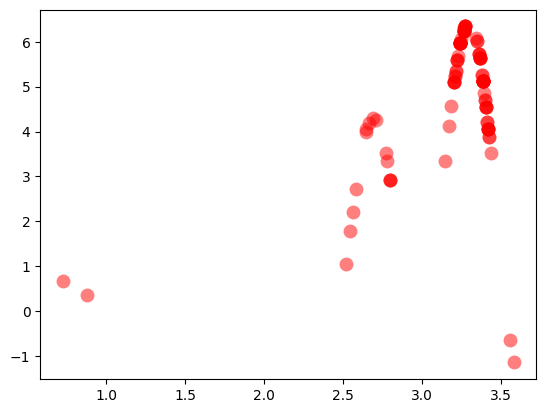

Time for Generation 10: 0.0629 seconds
Generation: 11
Max F_values: 510.3889255973268


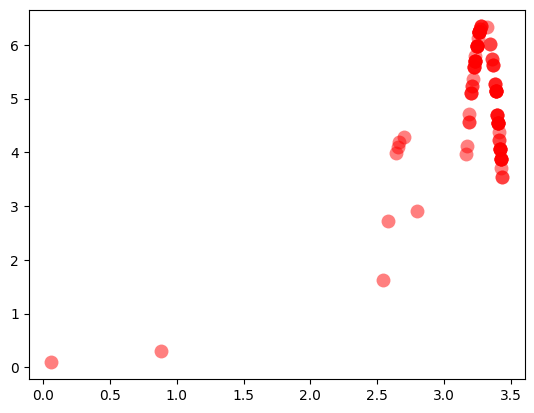

Time for Generation 11: 0.0541 seconds
Generation: 12
Max F_values: 510.3889255973268


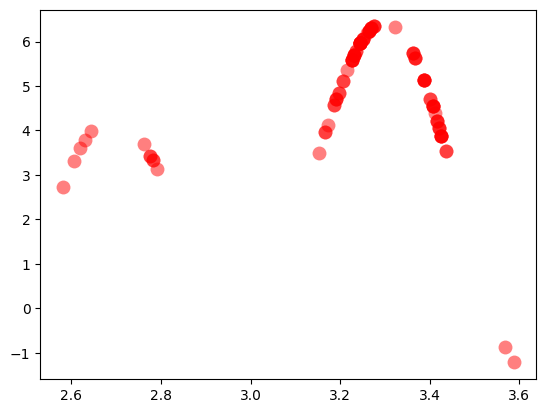

Time for Generation 12: 0.1008 seconds
Generation: 13
Max F_values: 510.3889255973268


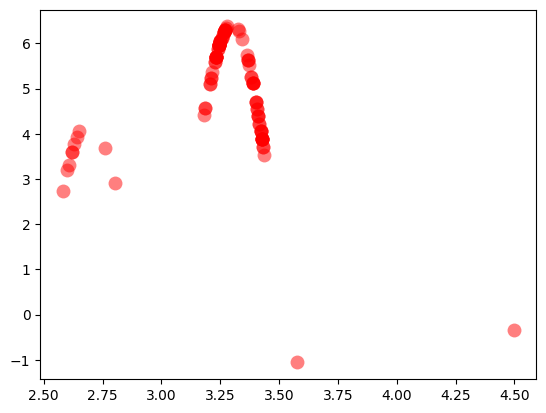

Time for Generation 13: 0.0659 seconds
Generation: 14
Max F_values: 527.9549352325413


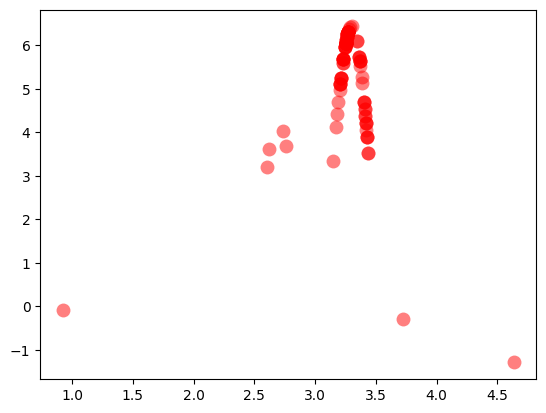

Time for Generation 14: 0.0682 seconds
Generation: 15
Max F_values: 527.9549352325413


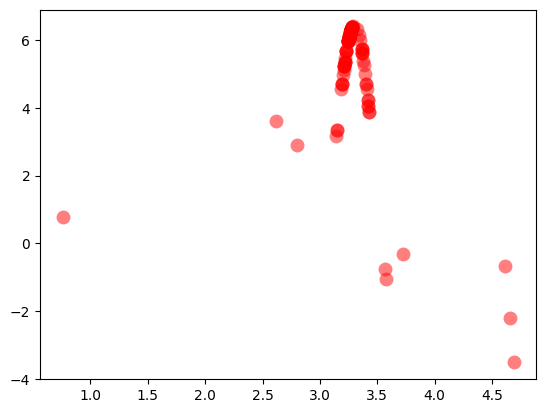

Time for Generation 15: 0.0652 seconds
Generation: 16
Max F_values: 527.9549352325413


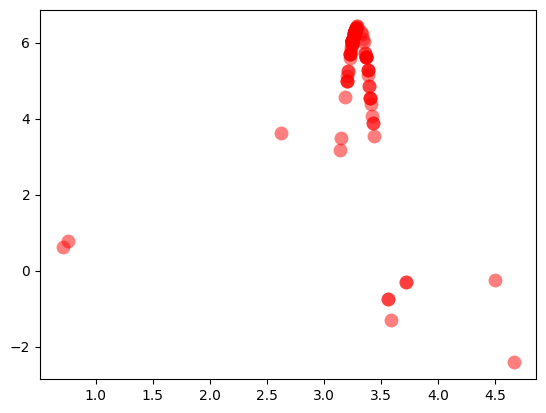

Time for Generation 16: 0.0603 seconds
Generation: 17
Max F_values: 548.9651516161096


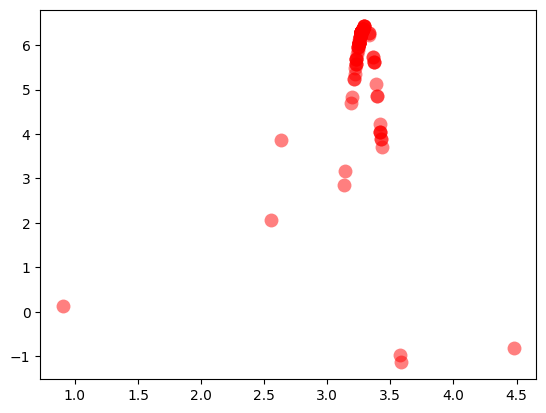

Time for Generation 17: 0.0560 seconds
Generation: 18
Max F_values: 548.9651516161096


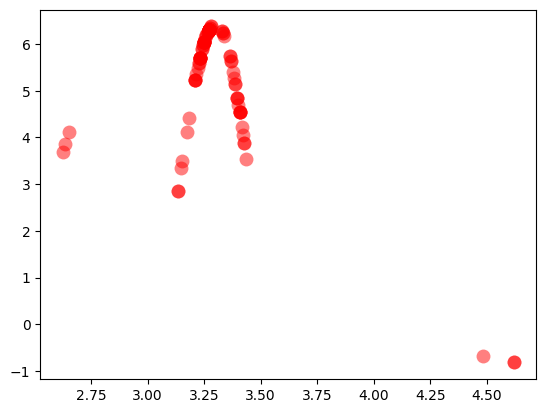

Time for Generation 18: 0.0636 seconds
Generation: 19
Max F_values: 548.9651516161096


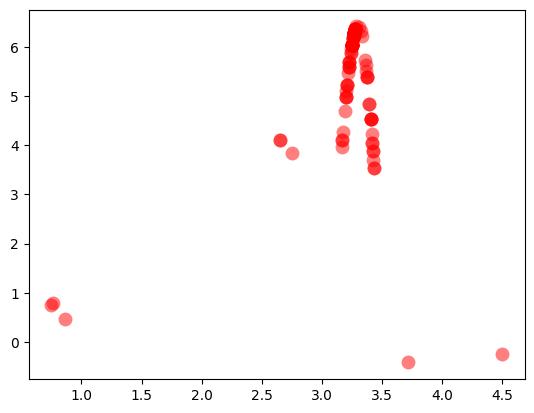

Time for Generation 19: 0.0614 seconds
Generation: 20
Max F_values: 552.0174423420992


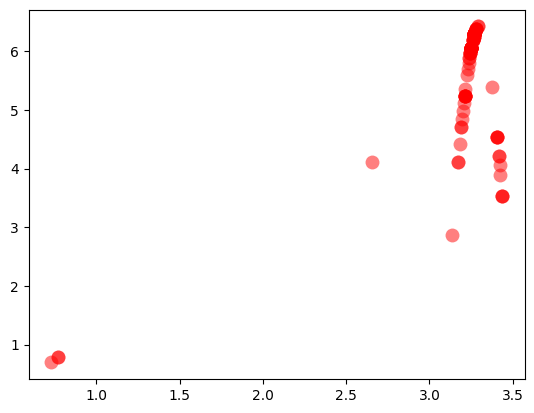

Time for Generation 20: 0.0433 seconds
Generation: 21
Max F_values: 552.0174423420992


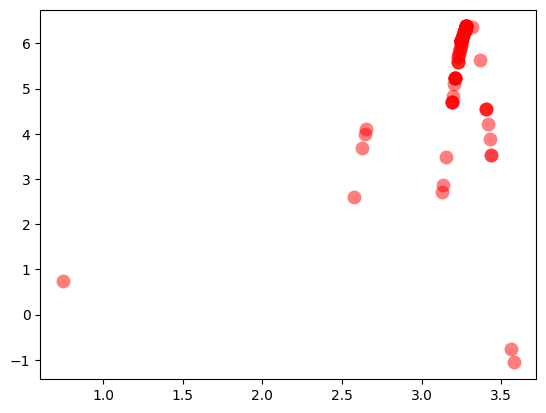

Time for Generation 21: 0.0661 seconds
Generation: 22
Max F_values: 558.0747525831147


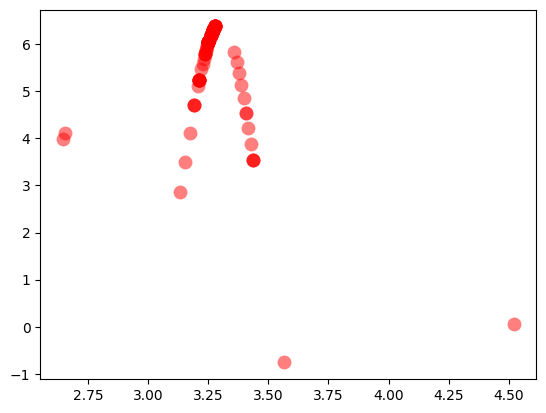

Time for Generation 22: 0.0659 seconds
Generation: 23
Max F_values: 562.9667101360884


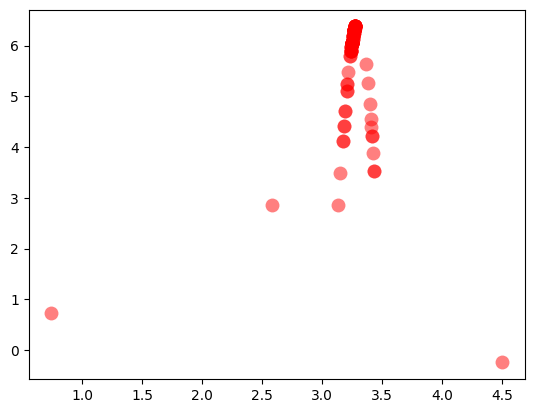

Time for Generation 23: 0.0577 seconds
Generation: 24
Max F_values: 562.9667101360884


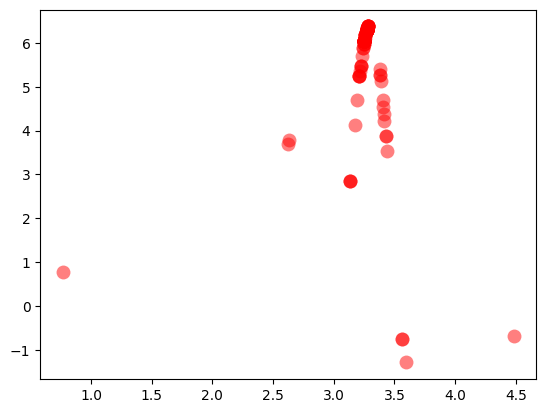

Time for Generation 24: 0.0587 seconds
Generation: 25
Max F_values: 562.9667101360884


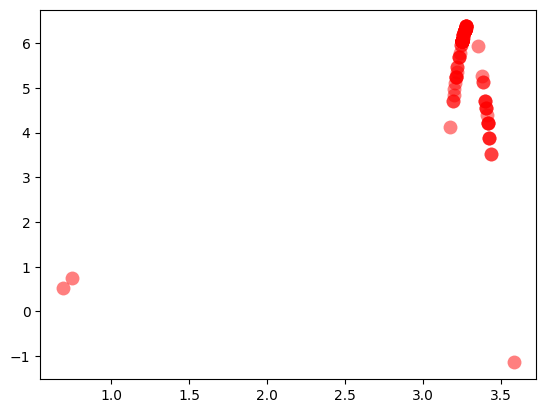

Time for Generation 25: 0.0506 seconds
Generation: 26
Max F_values: 562.9667101360884


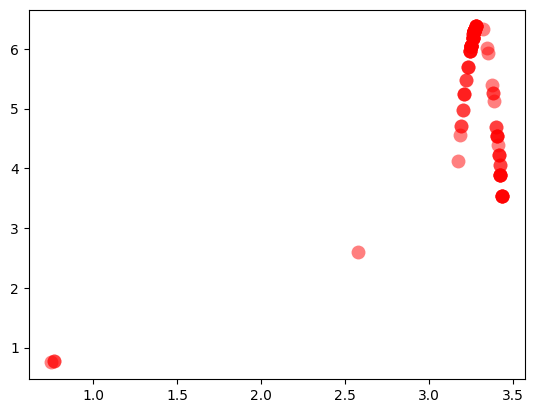

Time for Generation 26: 0.0584 seconds
Generation: 27
Max F_values: 562.9667101360884


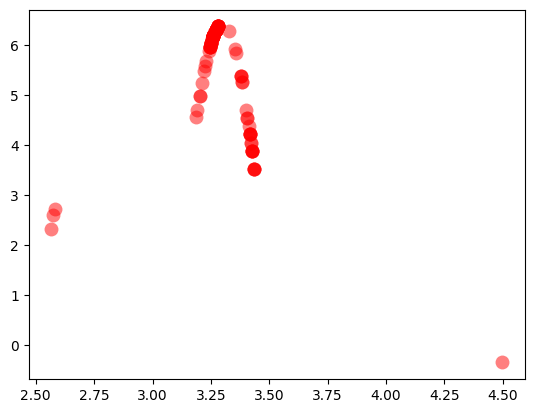

Time for Generation 27: 0.0571 seconds
Generation: 28
Max F_values: 562.9667101360884


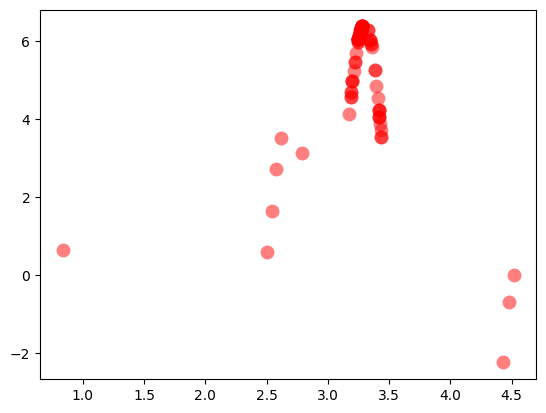

Time for Generation 28: 0.0630 seconds
Generation: 29
Max F_values: 562.9667101360884


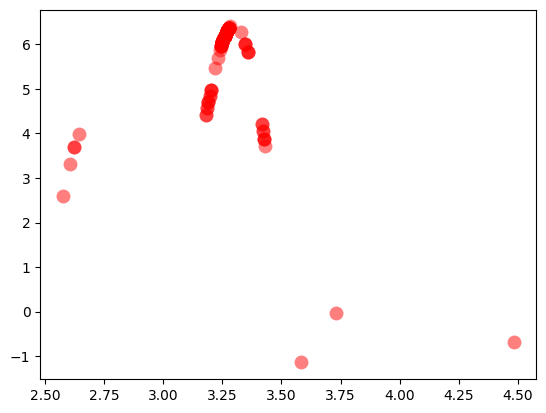

Time for Generation 29: 0.0640 seconds
Generation: 30
Max F_values: 562.9667101360884


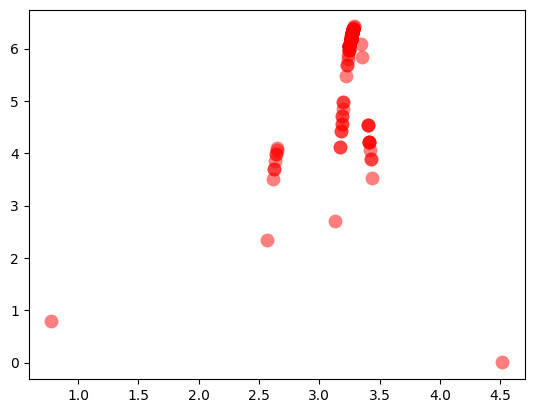

Time for Generation 30: 0.0731 seconds
Generation: 31
Max F_values: 562.9667101360884


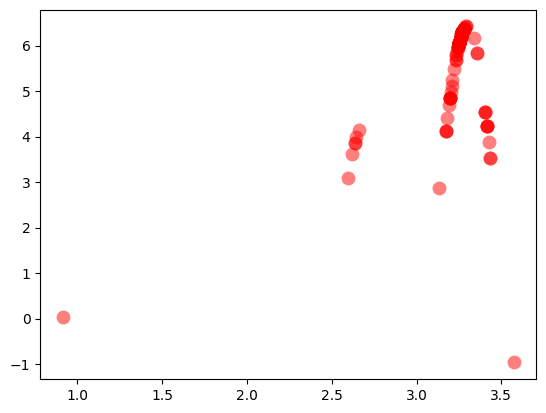

Time for Generation 31: 0.0832 seconds
Generation: 32
Max F_values: 562.9667101360884


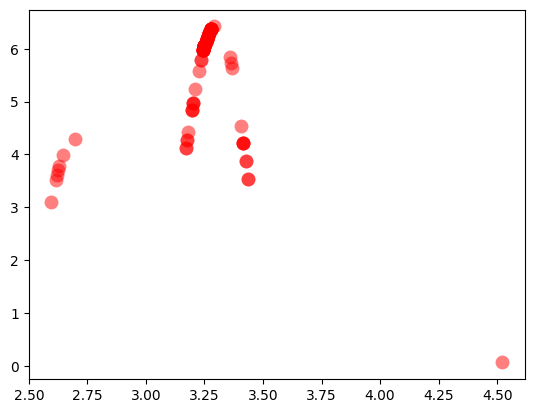

Time for Generation 32: 0.1013 seconds
Generation: 33
Max F_values: 562.9667101360884


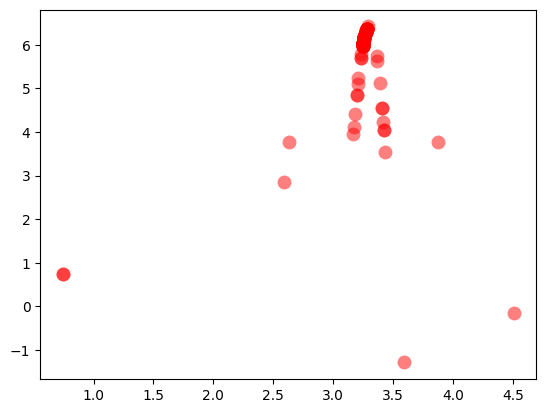

Time for Generation 33: 0.0757 seconds
Generation: 34
Max F_values: 562.9667101360884


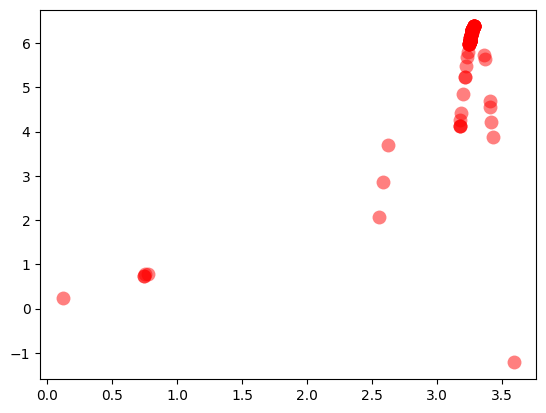

Time for Generation 34: 0.0564 seconds
Generation: 35
Max F_values: 572.1149565621562


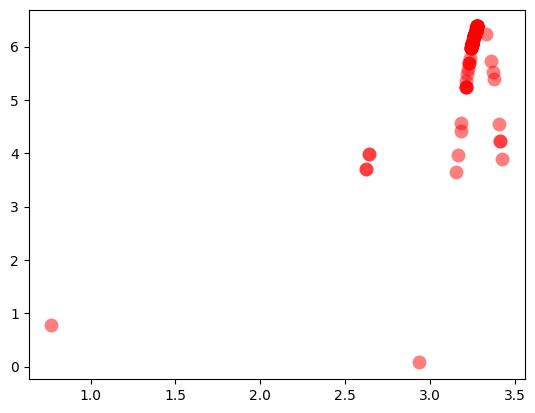

Time for Generation 35: 0.0628 seconds
Generation: 36
Max F_values: 572.1149565621562


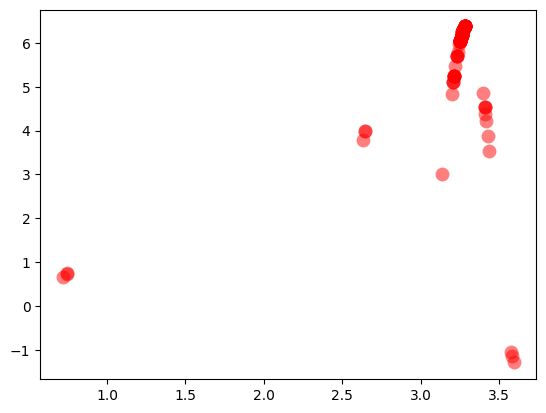

Time for Generation 36: 0.0711 seconds
Generation: 37
Max F_values: 576.7411159074964


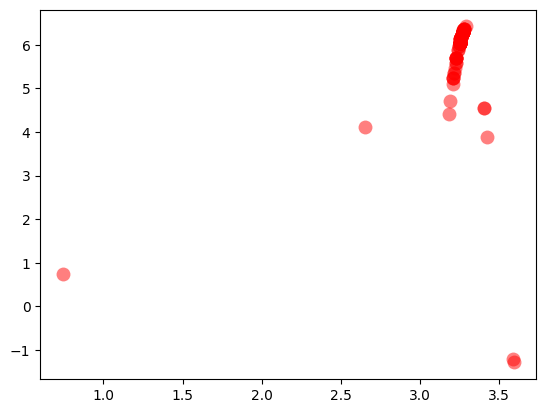

Time for Generation 37: 0.0494 seconds
Generation: 38
Max F_values: 576.7411159074964


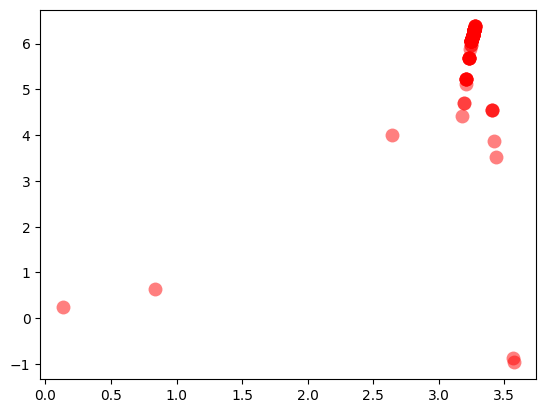

Time for Generation 38: 0.0666 seconds
Generation: 39
Max F_values: 576.7411159074964


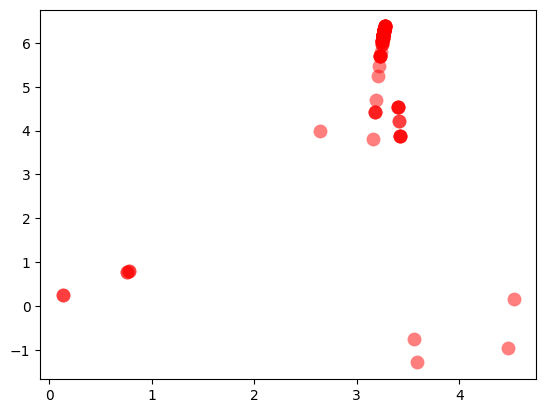

Time for Generation 39: 0.0608 seconds
Generation: 40
Max F_values: 576.7411159074964


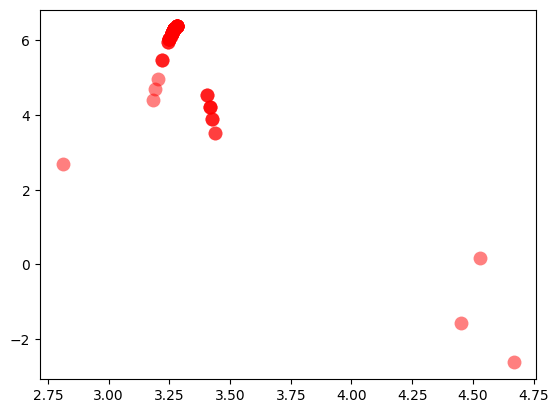

Time for Generation 40: 0.0568 seconds
Generation: 41
Max F_values: 578.4375517560458


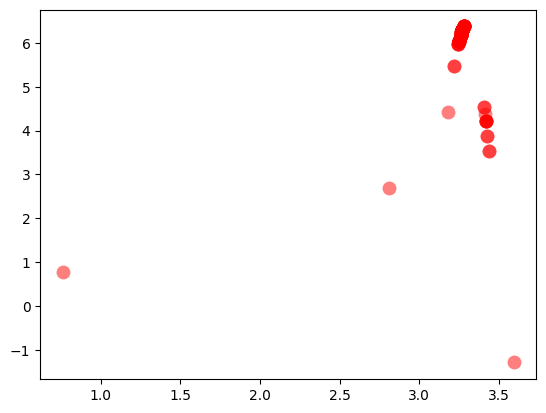

Time for Generation 41: 0.0670 seconds
Generation: 42
Max F_values: 578.4375517560458


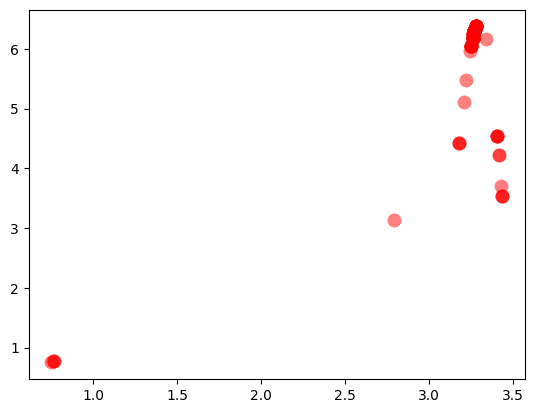

Time for Generation 42: 0.0495 seconds
Generation: 43
Max F_values: 578.4375517560458


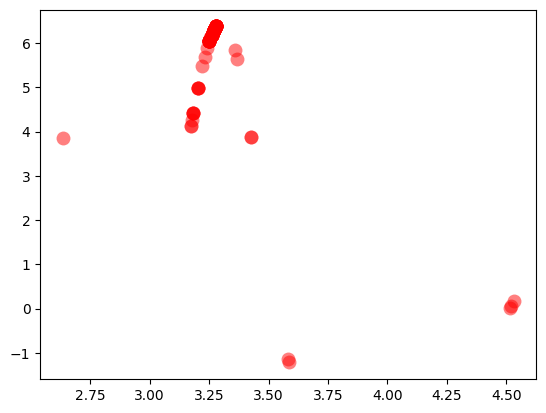

Time for Generation 43: 0.0659 seconds
Generation: 44
Max F_values: 578.4375517560458


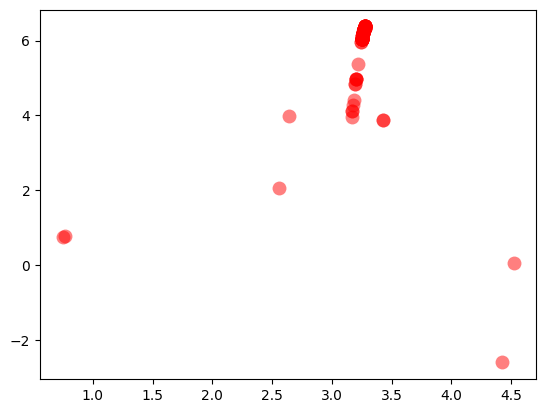

Time for Generation 44: 0.0502 seconds
Generation: 45
Max F_values: 578.4375517560458


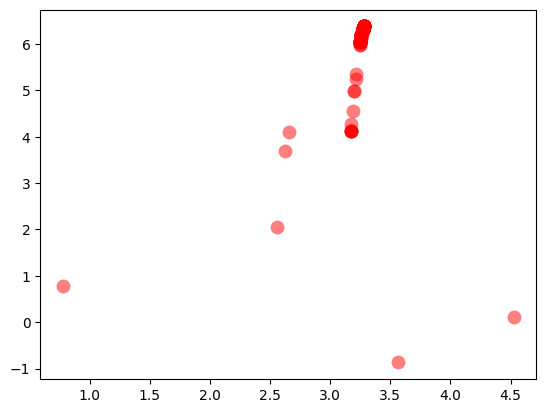

Time for Generation 45: 0.0777 seconds
Generation: 46
Max F_values: 587.5436044034865


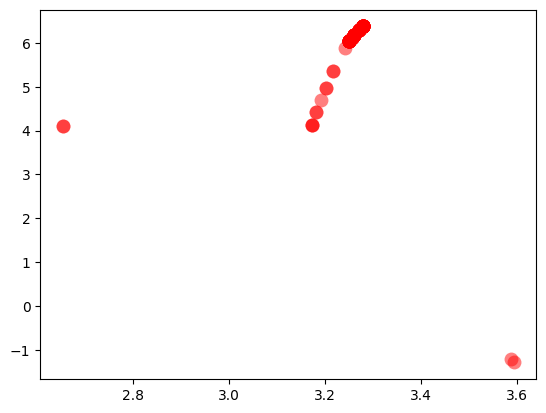

Time for Generation 46: 0.0564 seconds
Generation: 47
Max F_values: 587.5436044034865


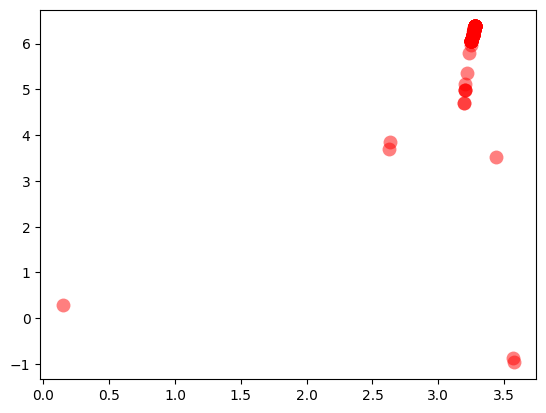

Time for Generation 47: 0.0657 seconds
Generation: 48
Max F_values: 587.5436044034865


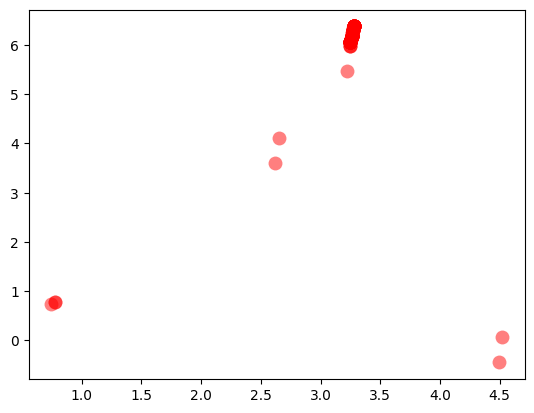

Time for Generation 48: 0.0613 seconds
Generation: 49
Max F_values: 590.0463342020104


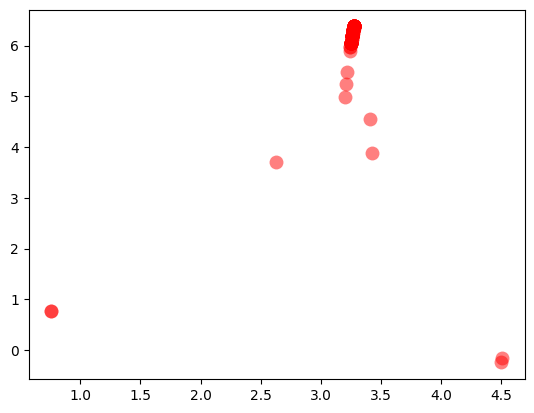

Time for Generation 49: 0.0562 seconds
Generation: 50
Max F_values: 590.0463342020104


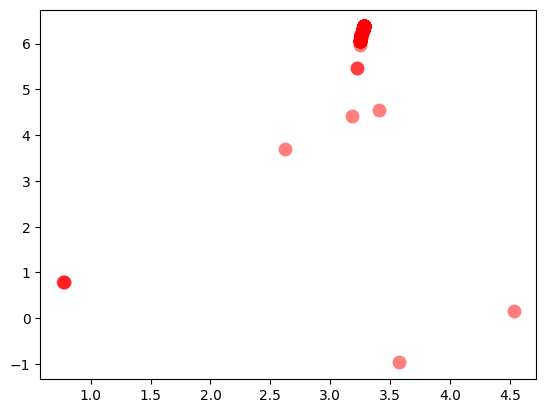

Time for Generation 50: 0.0658 seconds
Generation: 51
Max F_values: 611.3814883750582


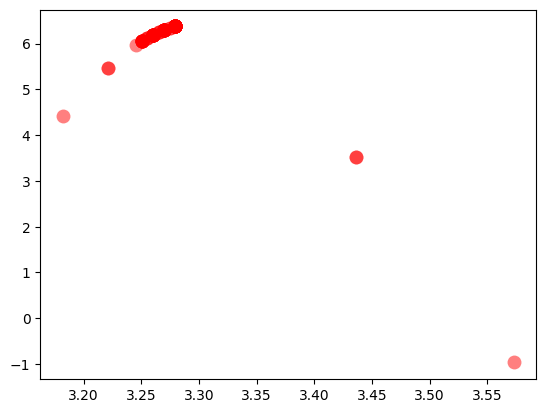

Time for Generation 51: 0.0620 seconds
Generation: 52
Max F_values: 611.3814883750582


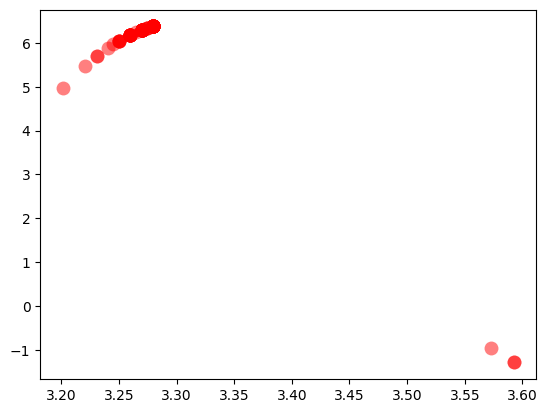

Time for Generation 52: 0.0887 seconds
Generation: 53
Max F_values: 611.3814883750582


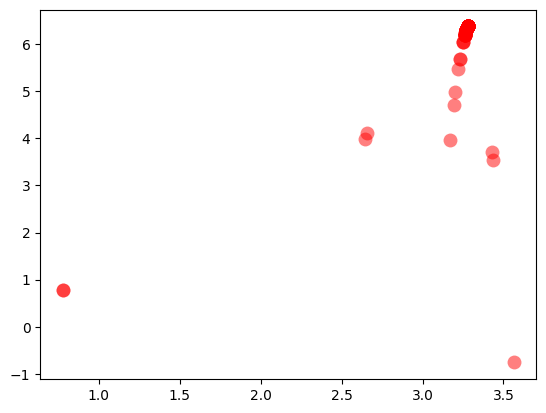

Time for Generation 53: 0.0663 seconds
Generation: 54
Max F_values: 611.3814883750582


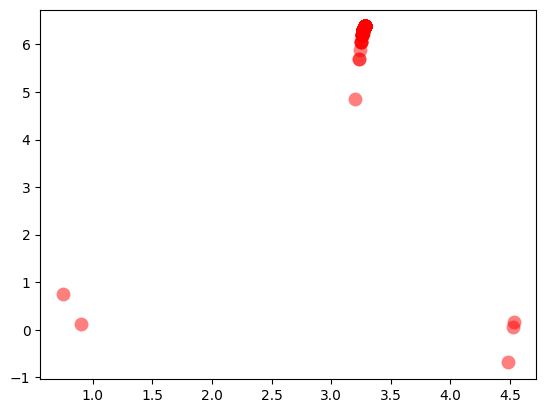

Time for Generation 54: 0.0829 seconds
Generation: 55
Max F_values: 611.3814883750582


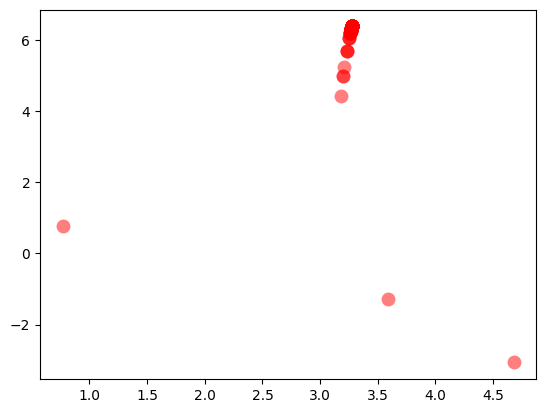

Time for Generation 55: 0.0673 seconds
Generation: 56
Max F_values: 611.3814883750582


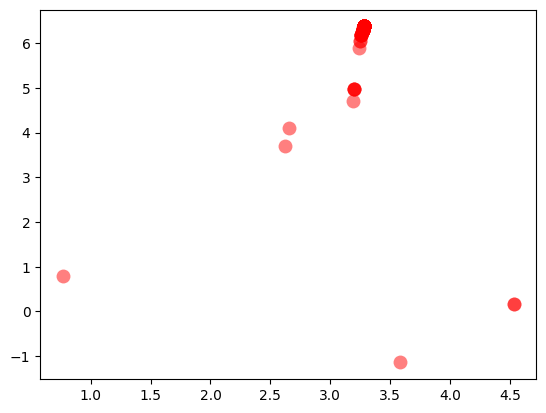

Time for Generation 56: 0.0626 seconds
Generation: 57
Max F_values: 611.3814883750582


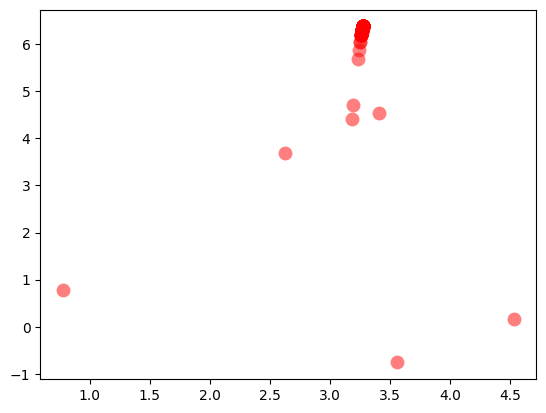

Time for Generation 57: 0.0643 seconds
Generation: 58
Max F_values: 611.3814883750582


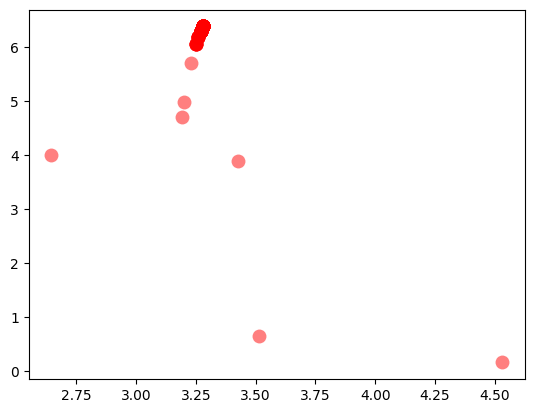

Time for Generation 58: 0.0630 seconds
Generation: 59
Max F_values: 611.3814883750582


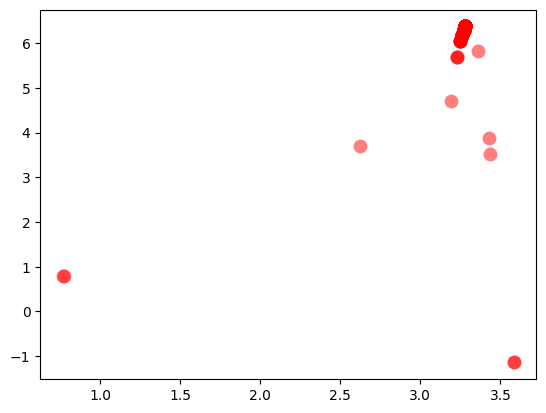

Time for Generation 59: 0.0558 seconds
Generation: 60
Max F_values: 611.3814883750582


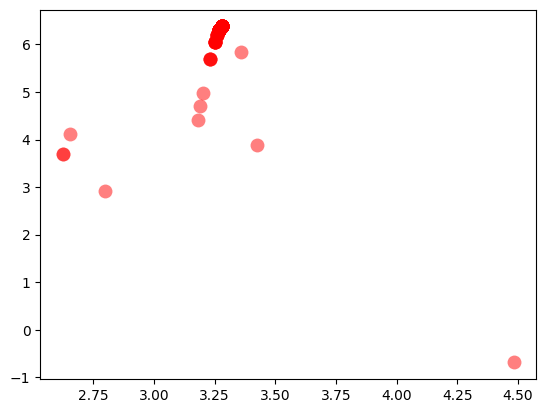

Time for Generation 60: 0.0541 seconds
Generation: 61
Max F_values: 611.3814883750582


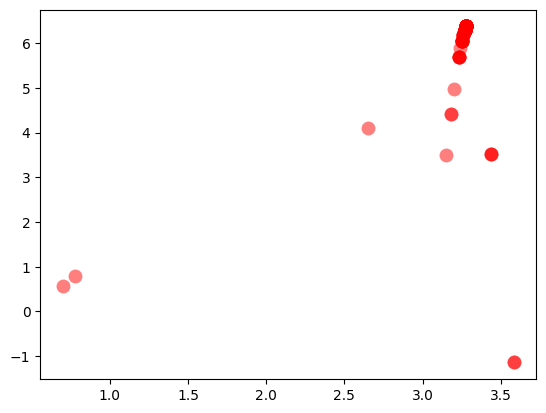

Time for Generation 61: 0.0509 seconds
Generation: 62
Max F_values: 611.3814883750582


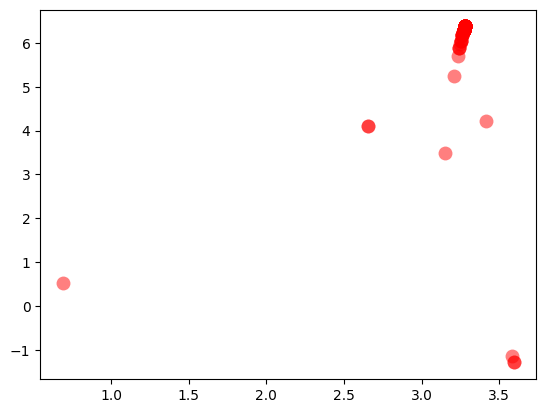

Time for Generation 62: 0.0658 seconds
Generation: 63
Max F_values: 611.3814883750582


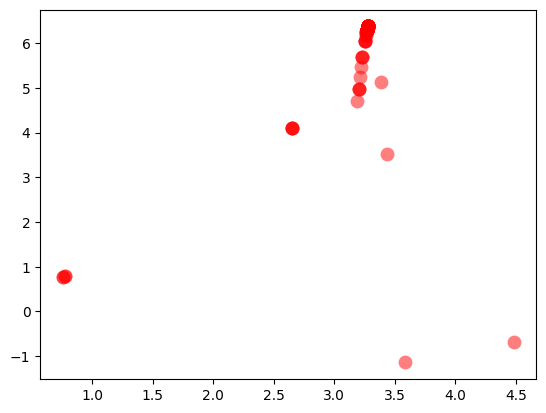

Time for Generation 63: 0.0839 seconds
Generation: 64
Max F_values: 611.3814883750582


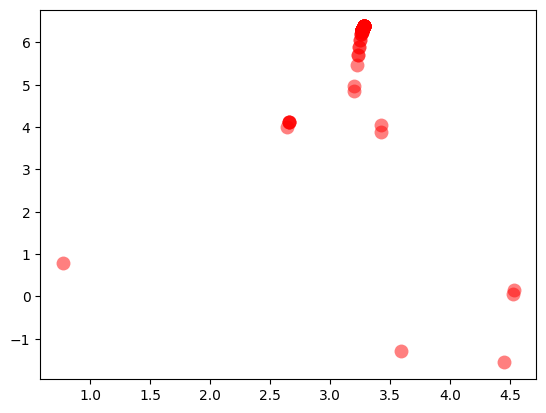

Time for Generation 64: 0.0499 seconds
Generation: 65
Max F_values: 611.3814883750582


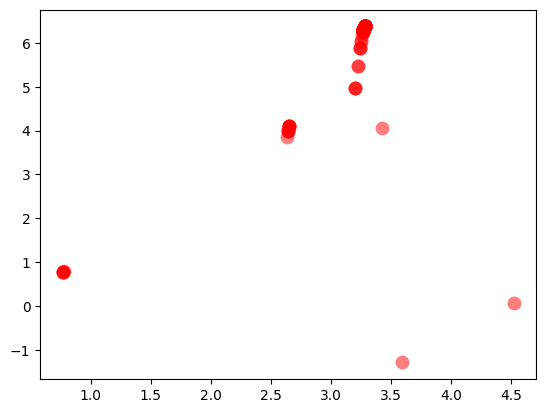

Time for Generation 65: 0.0658 seconds
Generation: 66
Max F_values: 611.3814883750582


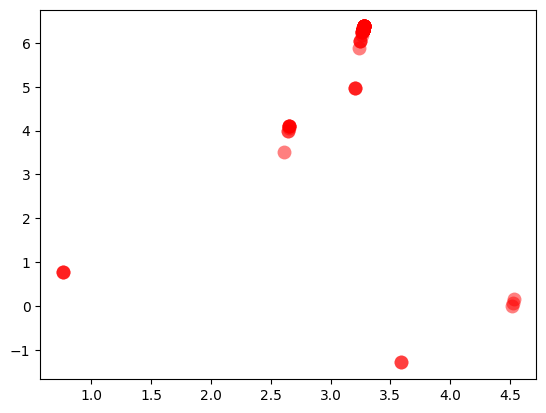

Time for Generation 66: 0.0669 seconds
Generation: 67
Max F_values: 611.3814883750582


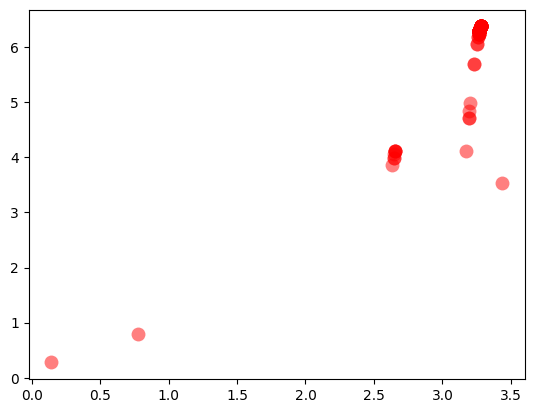

Time for Generation 67: 0.0500 seconds
Generation: 68
Max F_values: 611.3814883750582


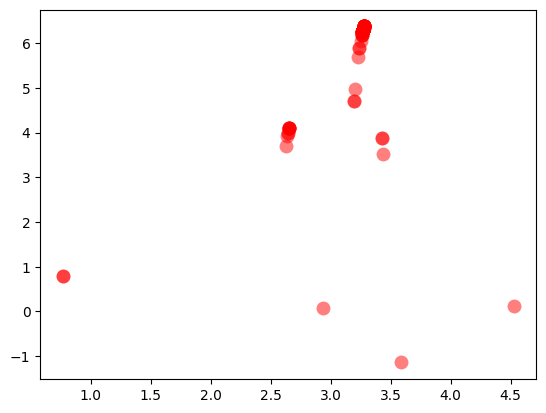

Time for Generation 68: 0.0836 seconds
Generation: 69
Max F_values: 611.3814883750582


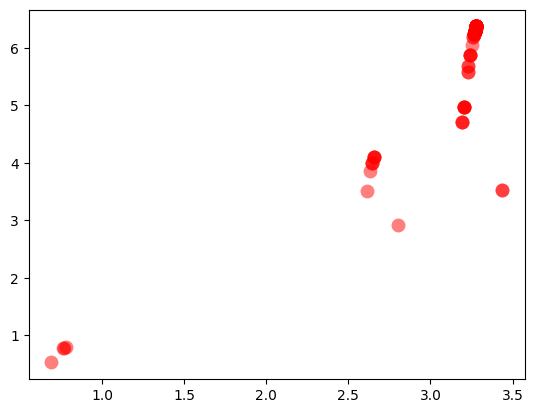

Time for Generation 69: 0.0643 seconds
Generation: 70
Max F_values: 611.3814883750582


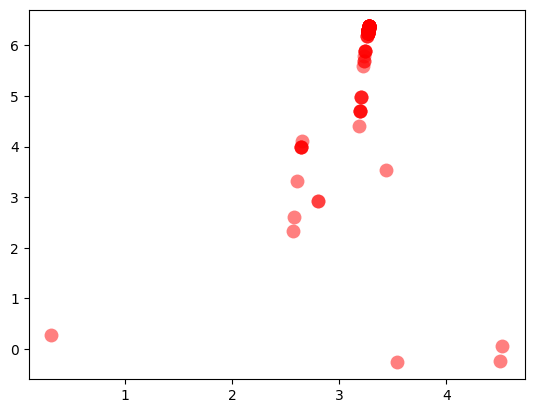

Time for Generation 70: 0.0526 seconds
Generation: 71
Max F_values: 611.3814883750582


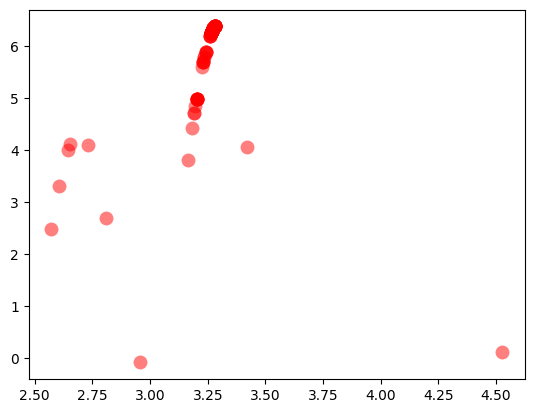

Time for Generation 71: 0.1001 seconds
Generation: 72
Max F_values: 611.3814883750582


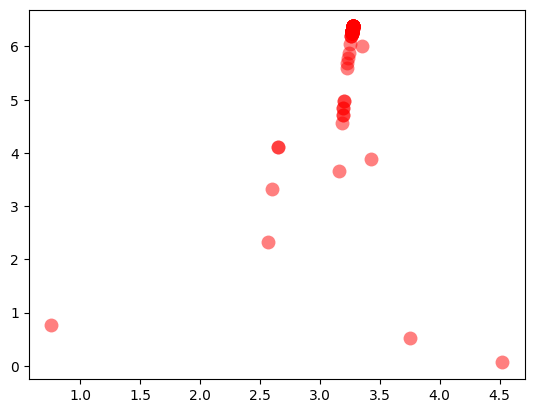

Time for Generation 72: 0.0493 seconds
Generation: 73
Max F_values: 611.3814883750582


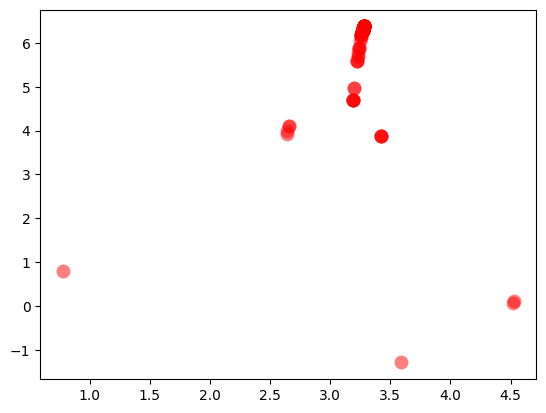

Time for Generation 73: 0.0839 seconds
Generation: 74
Max F_values: 611.3814883750582


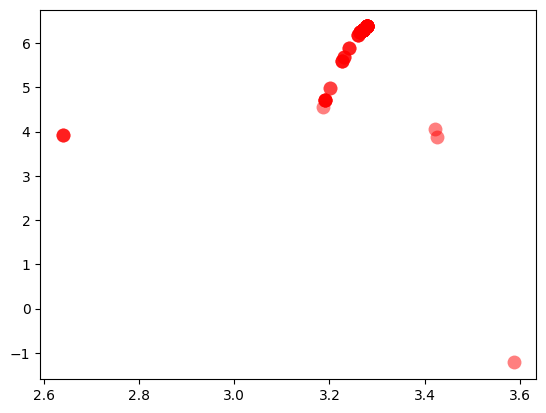

Time for Generation 74: 0.0595 seconds
Generation: 75
Max F_values: 611.3814883750582


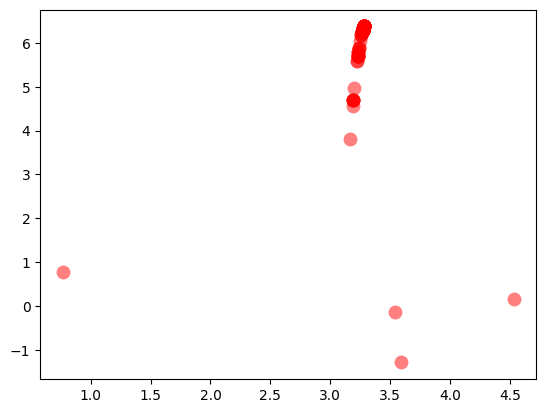

Time for Generation 75: 0.0573 seconds
Generation: 76
Max F_values: 611.3814883750582


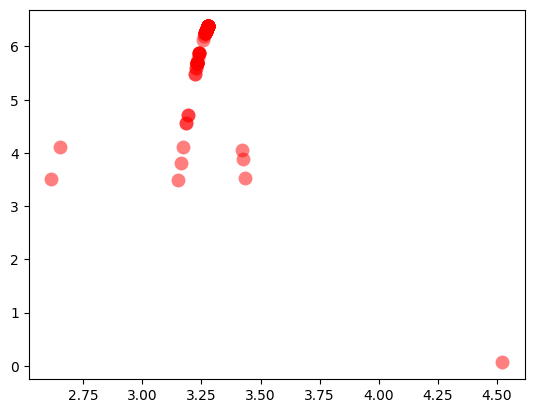

Time for Generation 76: 0.0656 seconds
Generation: 77
Max F_values: 611.3814883750582


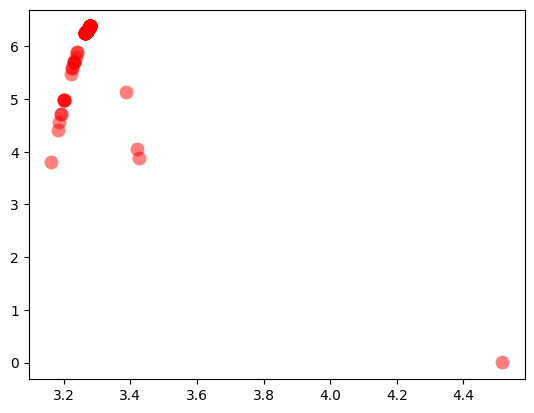

Time for Generation 77: 0.0502 seconds
Generation: 78
Max F_values: 611.3814883750582


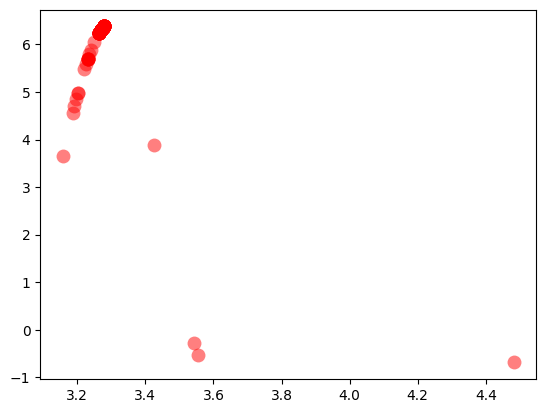

Time for Generation 78: 0.0585 seconds
Generation: 79
Max F_values: 611.3814883750582


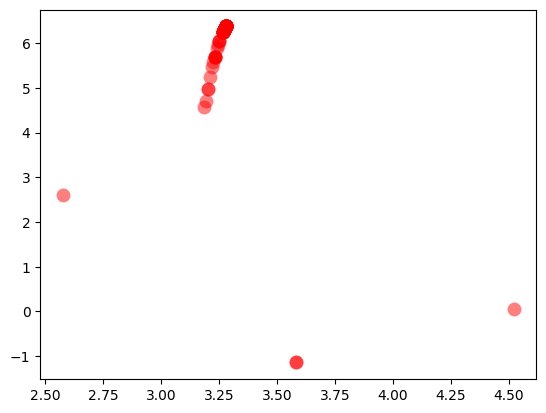

Time for Generation 79: 0.0586 seconds
Generation: 80
Max F_values: 611.3814883750582


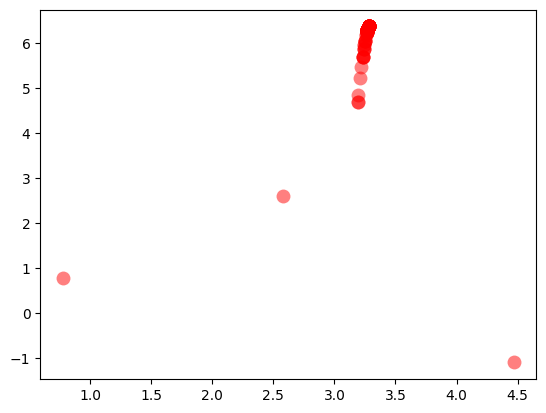

Time for Generation 80: 0.0680 seconds
Generation: 81
Max F_values: 615.1514700990705


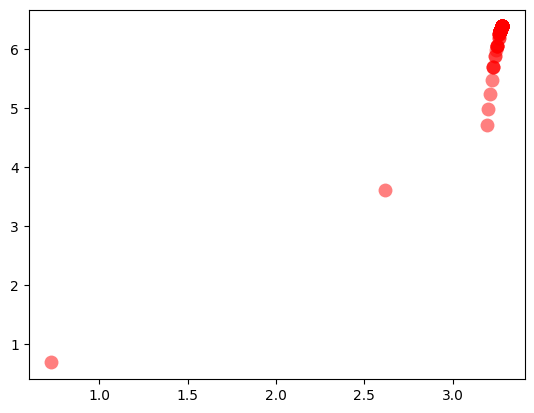

Time for Generation 81: 0.0571 seconds
Generation: 82
Max F_values: 615.1514700990705


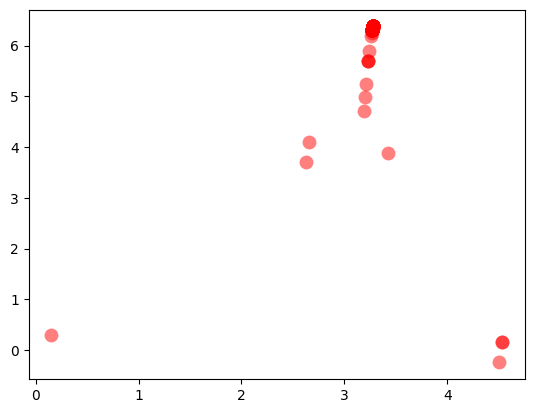

Time for Generation 82: 0.0583 seconds
Generation: 83
Max F_values: 615.1514700990705


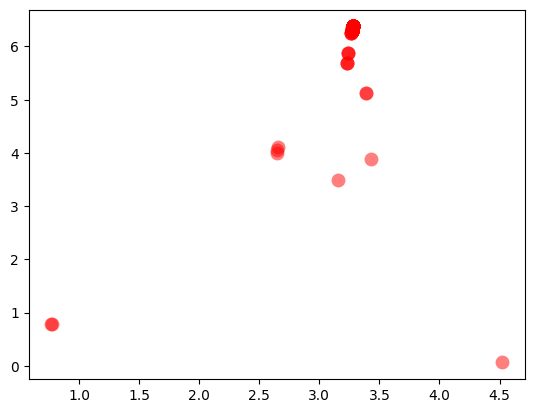

Time for Generation 83: 0.0660 seconds
Generation: 84
Max F_values: 615.1514700990705


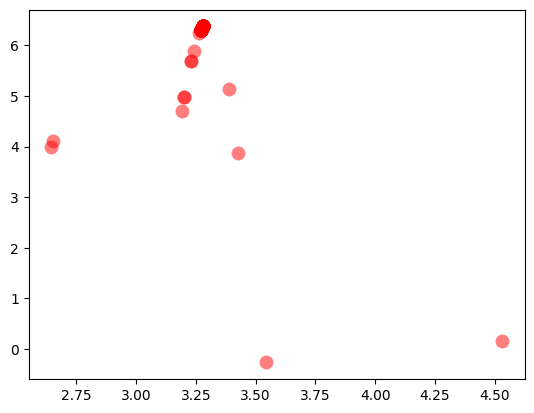

Time for Generation 84: 0.0677 seconds
Generation: 85
Max F_values: 615.2028057130257


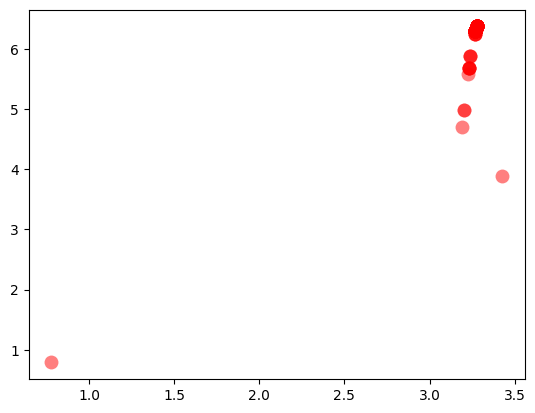

Time for Generation 85: 0.0673 seconds
Generation: 86
Max F_values: 615.2028057130257


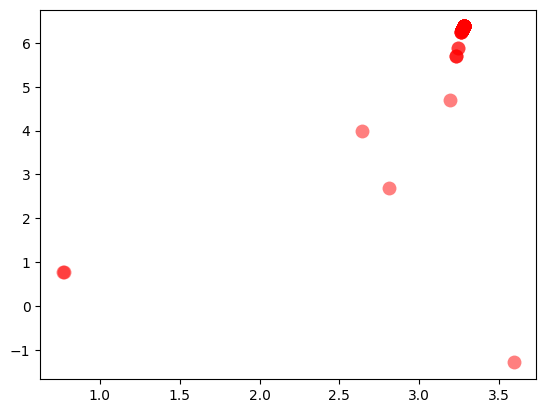

Time for Generation 86: 0.0487 seconds
Generation: 87
Max F_values: 615.2028057130257


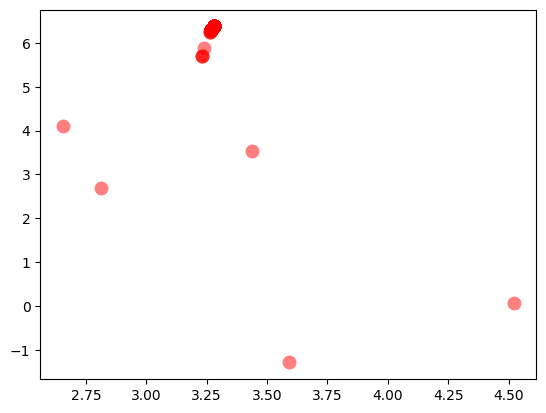

Time for Generation 87: 0.0663 seconds
Generation: 88
Max F_values: 615.2028057130257


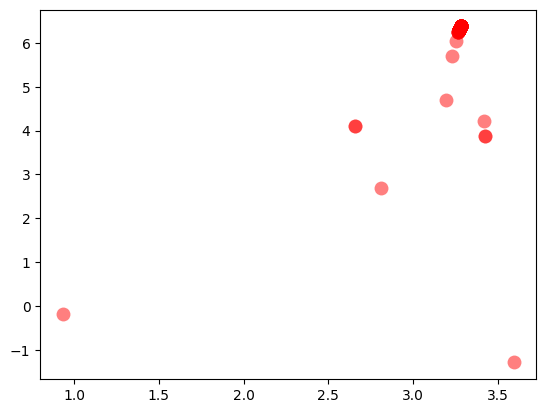

Time for Generation 88: 0.0499 seconds
Generation: 89
Max F_values: 615.2028057130257


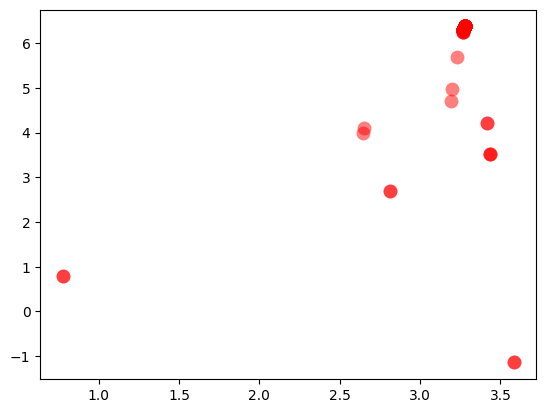

Time for Generation 89: 0.0673 seconds
Generation: 90
Max F_values: 615.2028057130257


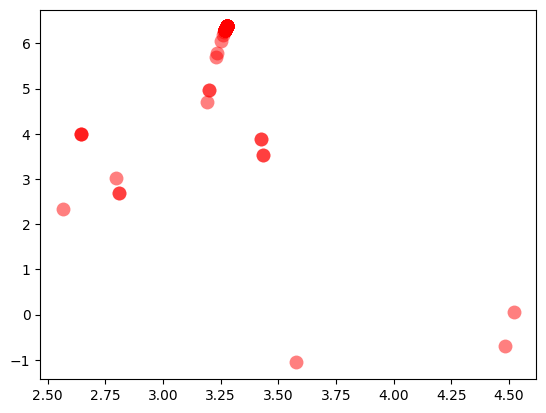

Time for Generation 90: 0.0833 seconds
Generation: 91
Max F_values: 615.2028057130257


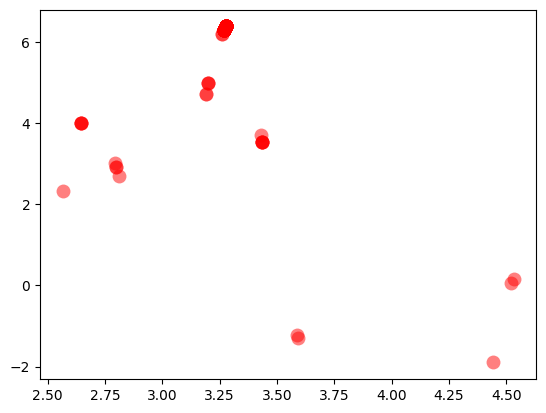

Time for Generation 91: 0.1009 seconds
Generation: 92
Max F_values: 615.2028057130257


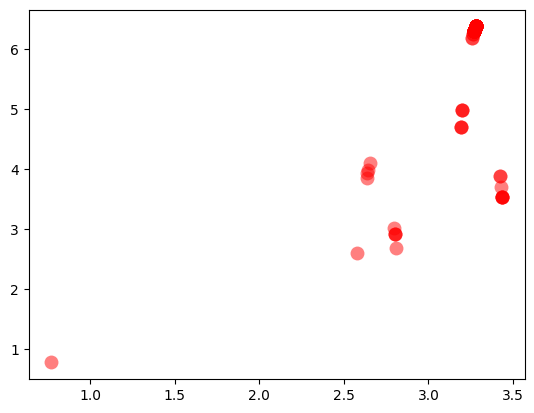

Time for Generation 92: 0.0741 seconds
Generation: 93
Max F_values: 615.2028057130257


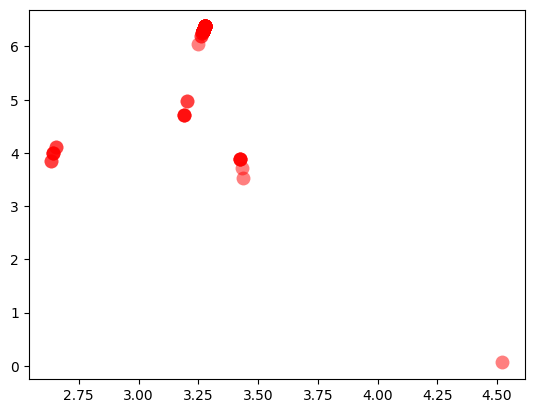

Time for Generation 93: 0.0583 seconds
Generation: 94
Max F_values: 615.2028057130257


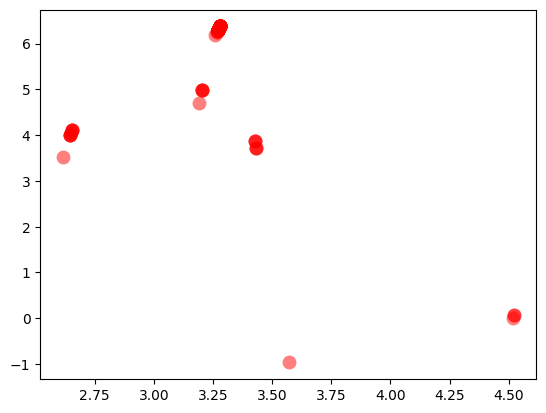

Time for Generation 94: 0.0662 seconds
Generation: 95
Max F_values: 615.2028057130257


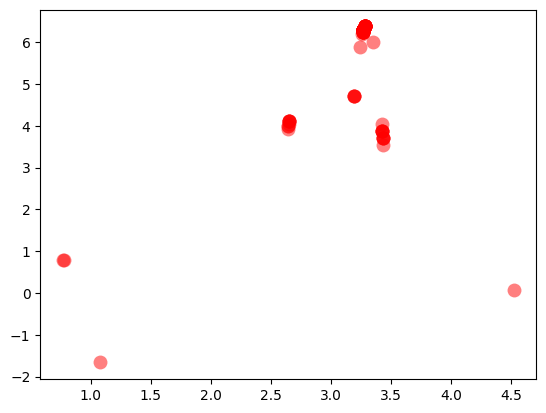

Time for Generation 95: 0.0752 seconds
Generation: 96
Max F_values: 615.2028057130257


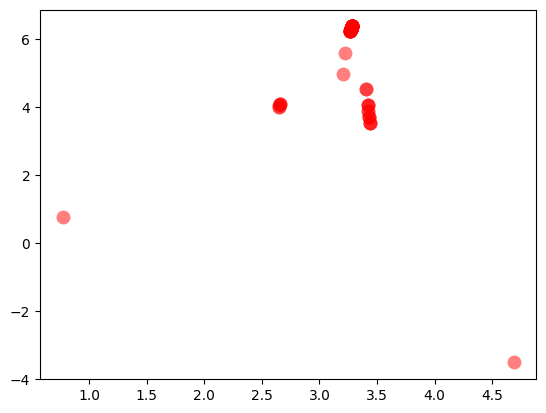

Time for Generation 96: 0.0583 seconds
Generation: 97
Max F_values: 615.2028057130257


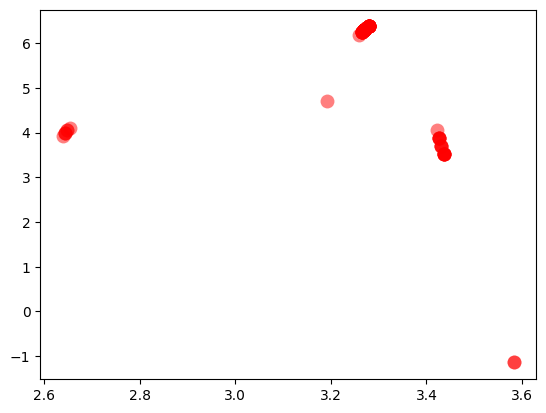

Time for Generation 97: 0.0494 seconds
Generation: 98
Max F_values: 615.2028057130257


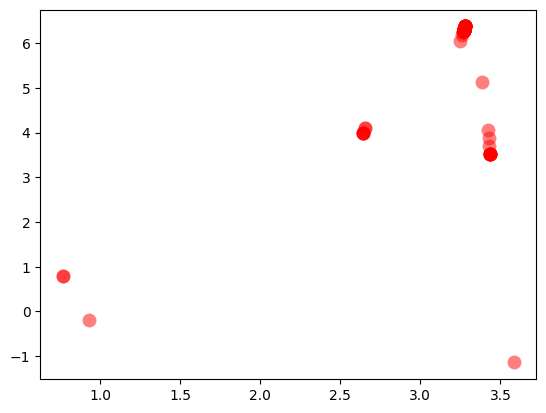

Time for Generation 98: 0.0667 seconds
Generation: 99
Max F_values: 615.2028057130257


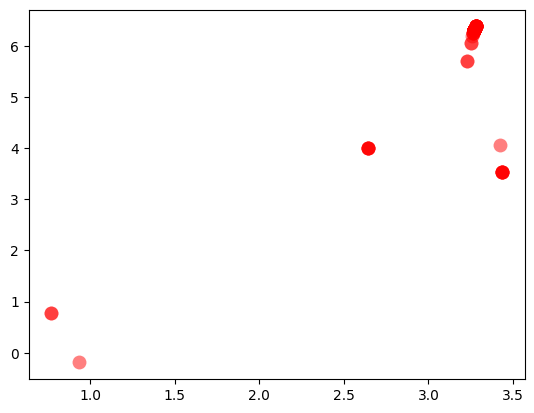

Time for Generation 99: 0.0589 seconds
Generation: 100
Max F_values: 615.2028057130257


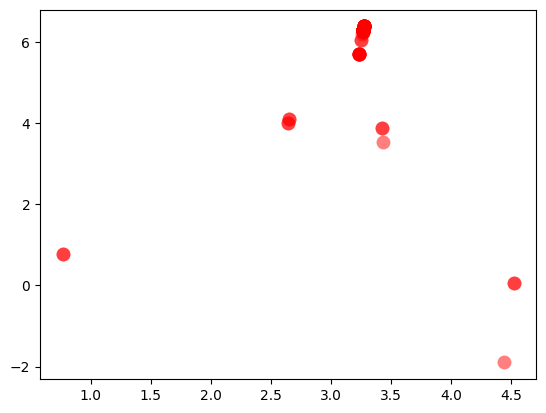

Time for Generation 100: 0.0562 seconds
Generation: 101
Max F_values: 615.2028057130257


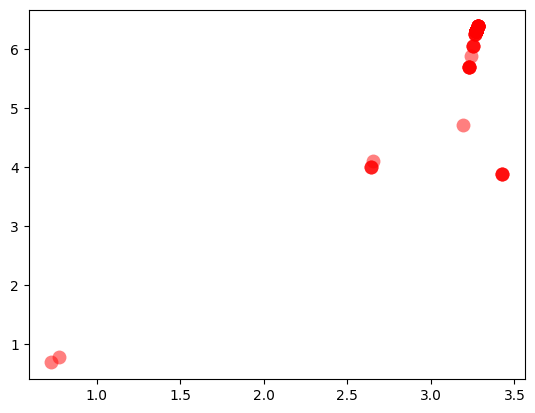

Time for Generation 101: 0.0519 seconds
Generation: 102
Max F_values: 615.2028057130257


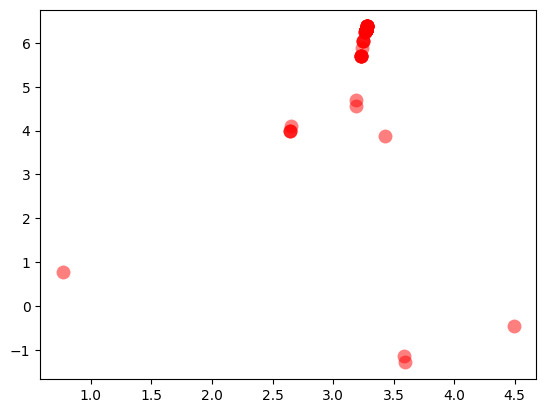

Time for Generation 102: 0.0605 seconds
Generation: 103
Max F_values: 615.2028057130257


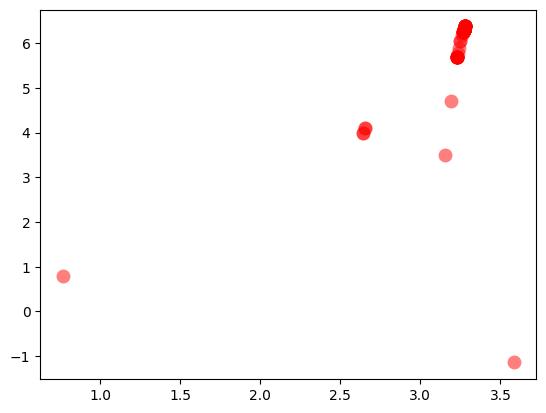

Time for Generation 103: 0.0949 seconds
Generation: 104
Max F_values: 615.2028057130257


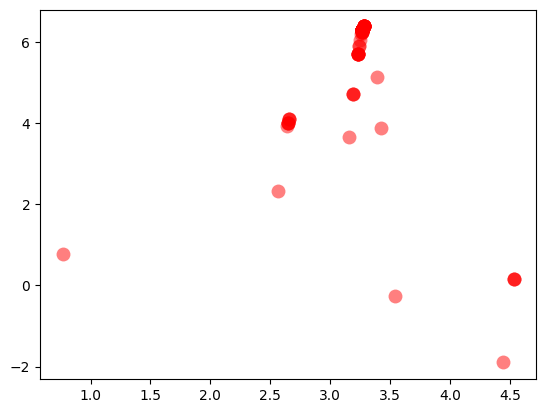

Time for Generation 104: 0.0574 seconds
Generation: 105
Max F_values: 615.2028057130257


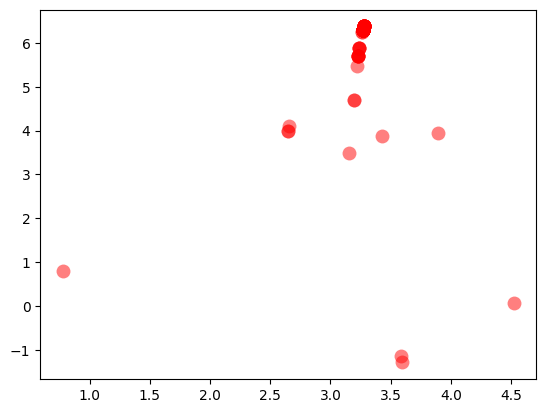

Time for Generation 105: 0.0633 seconds
Generation: 106
Max F_values: 615.2028057130257


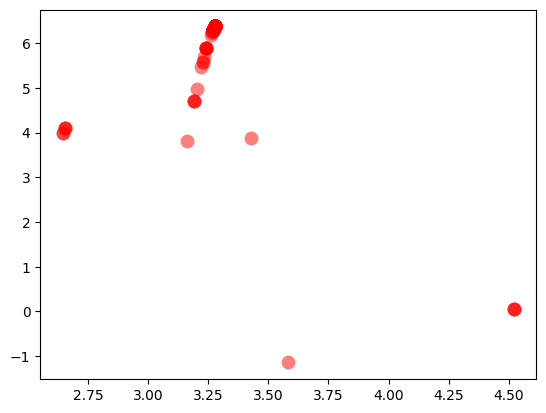

Time for Generation 106: 0.0566 seconds
Generation: 107
Max F_values: 615.2028057130257


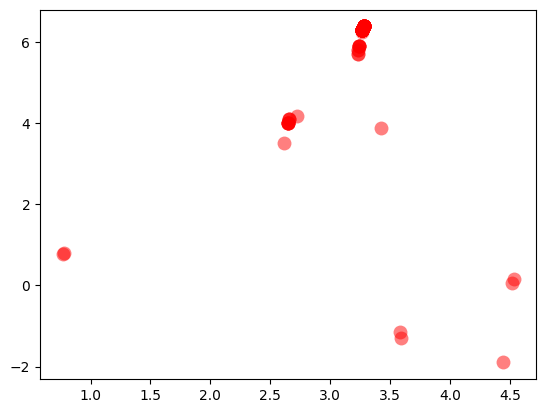

Time for Generation 107: 0.0503 seconds
Generation: 108
Max F_values: 615.2028057130257


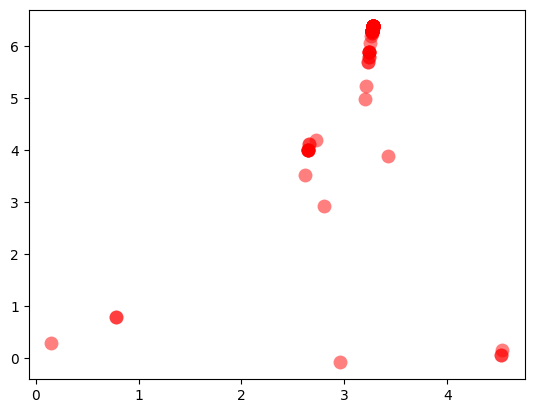

Time for Generation 108: 0.0666 seconds
Generation: 109
Max F_values: 615.2028057130257


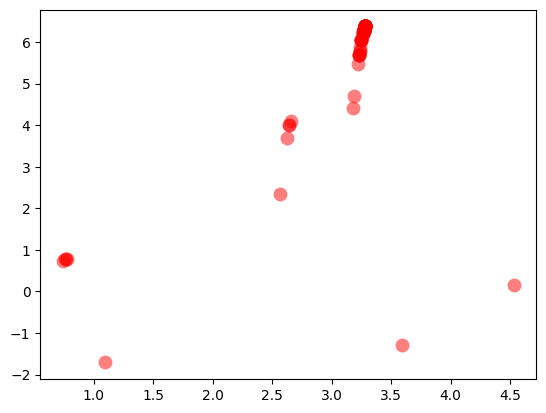

Time for Generation 109: 0.0500 seconds
Generation: 110
Max F_values: 615.2028057130257


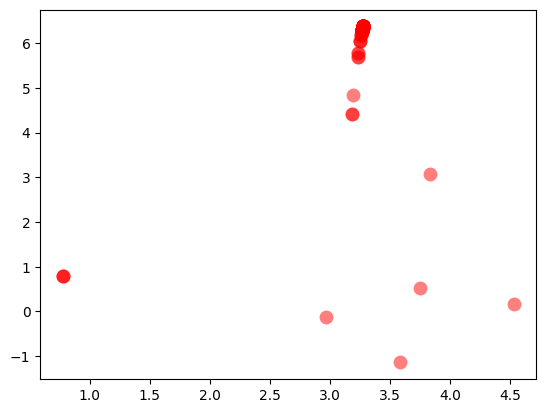

Time for Generation 110: 0.1008 seconds
Generation: 111
Max F_values: 615.2028057130257


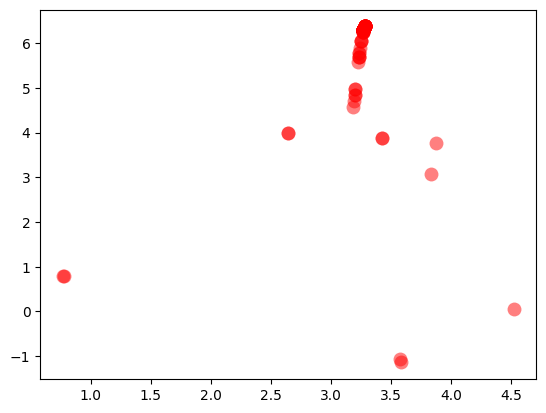

Time for Generation 111: 0.0830 seconds
Generation: 112
Max F_values: 615.2028057130257


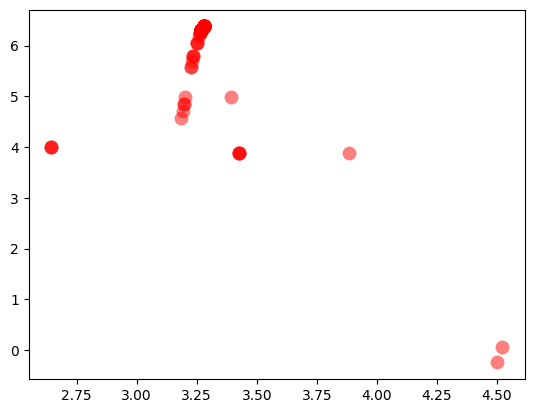

Time for Generation 112: 0.1161 seconds
Generation: 113
Max F_values: 615.2028057130257


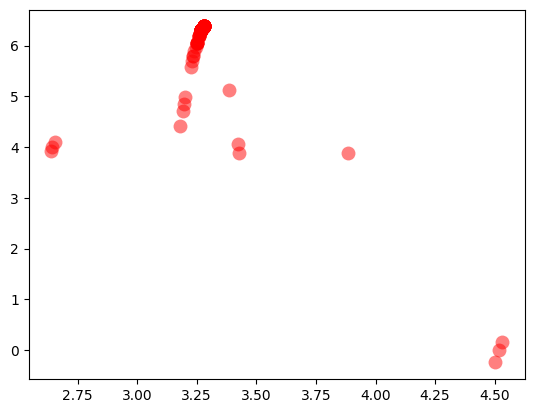

Time for Generation 113: 0.0604 seconds
Generation: 114
Max F_values: 615.2028057130257


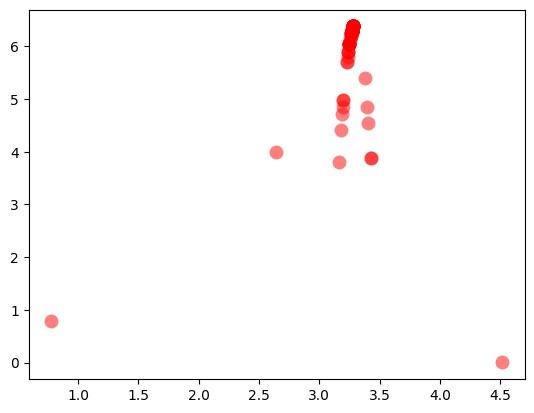

Time for Generation 114: 0.0568 seconds
Generation: 115
Max F_values: 615.2028057130257


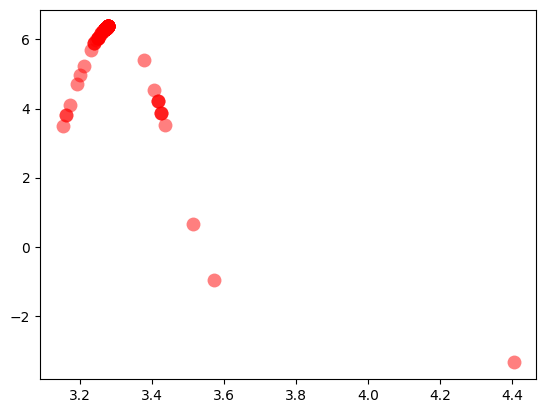

Time for Generation 115: 0.0639 seconds
Generation: 116
Max F_values: 615.2028057130257


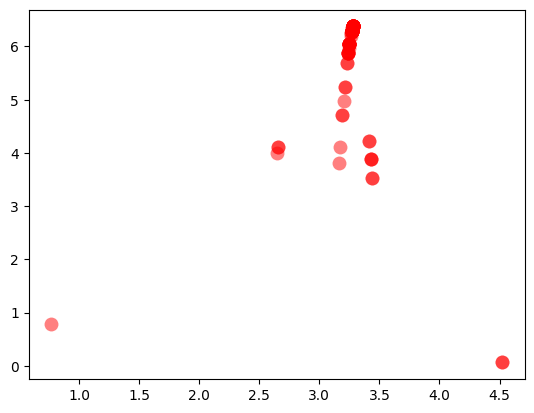

Time for Generation 116: 0.0533 seconds
Generation: 117
Max F_values: 615.2028057130257


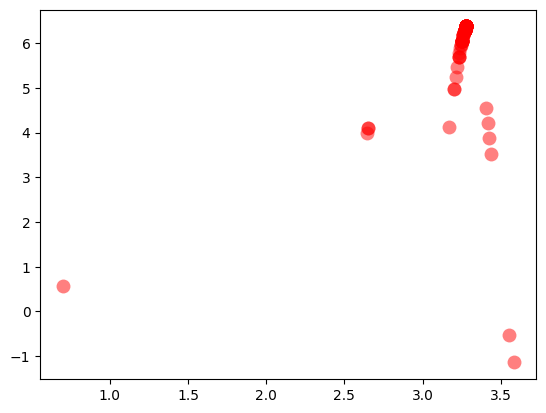

Time for Generation 117: 0.0661 seconds
Generation: 118
Max F_values: 615.2028057130257


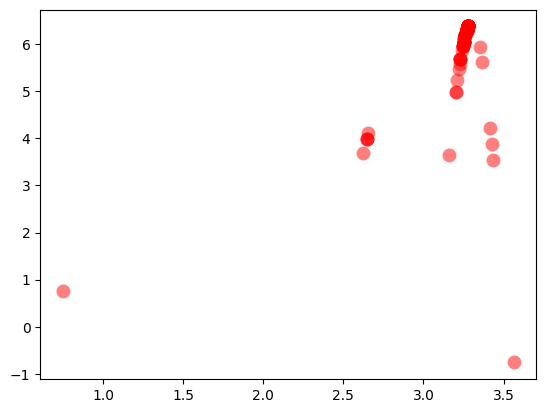

Time for Generation 118: 0.0578 seconds
Generation: 119
Max F_values: 615.2028057130257


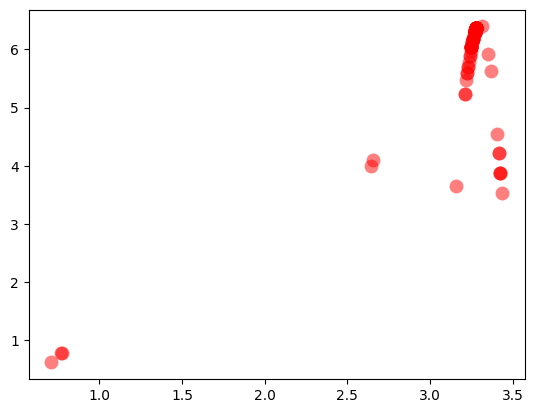

Time for Generation 119: 0.0559 seconds
Generation: 120
Max F_values: 615.2028057130257


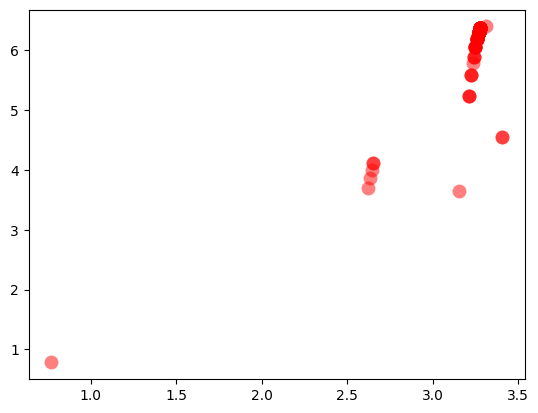

Time for Generation 120: 0.0720 seconds
Generation: 121
Max F_values: 615.2028057130257


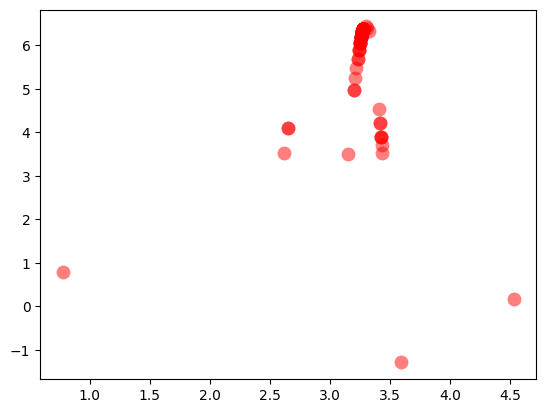

Time for Generation 121: 0.0802 seconds
Generation: 122
Max F_values: 615.2028057130257


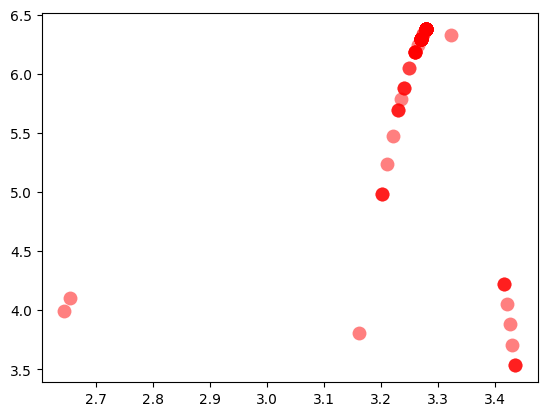

Time for Generation 122: 0.0501 seconds
Generation: 123
Max F_values: 615.2028057130257


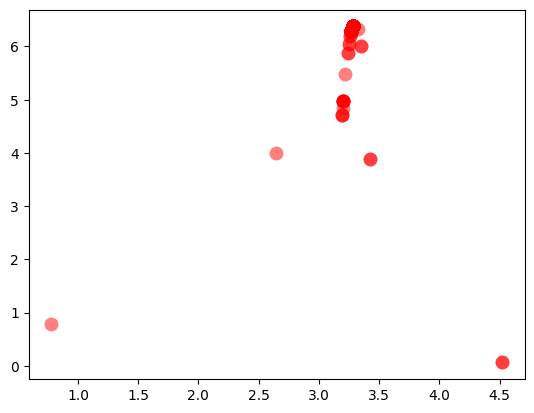

Time for Generation 123: 0.0673 seconds
Generation: 124
Max F_values: 615.2028057130257


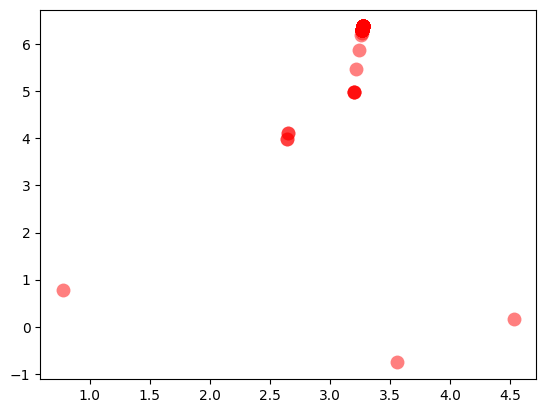

Time for Generation 124: 0.0494 seconds
Generation: 125
Max F_values: 615.2028057130257


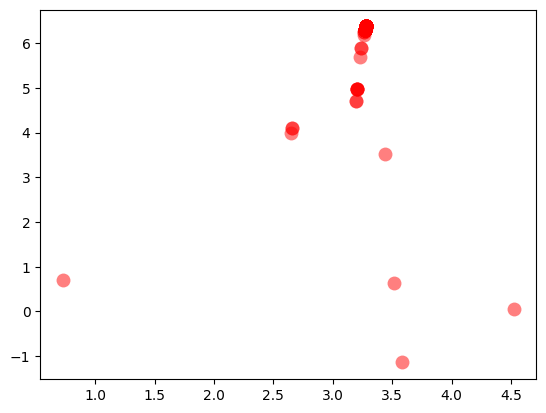

Time for Generation 125: 0.0671 seconds
Generation: 126
Max F_values: 615.2028057130257


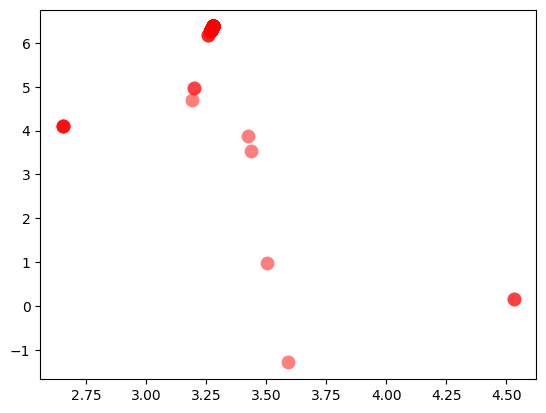

Time for Generation 126: 0.0835 seconds
Generation: 127
Max F_values: 615.2028057130257


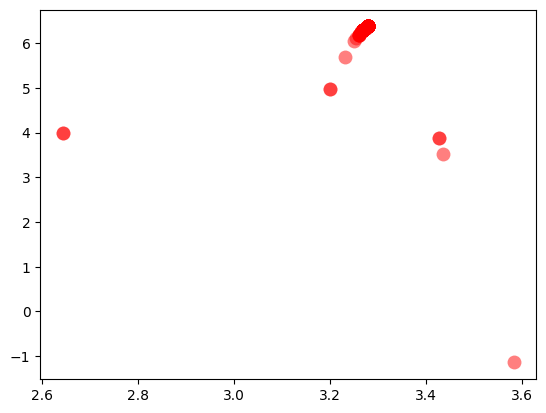

Time for Generation 127: 0.0497 seconds
Generation: 128
Max F_values: 615.2028057130257


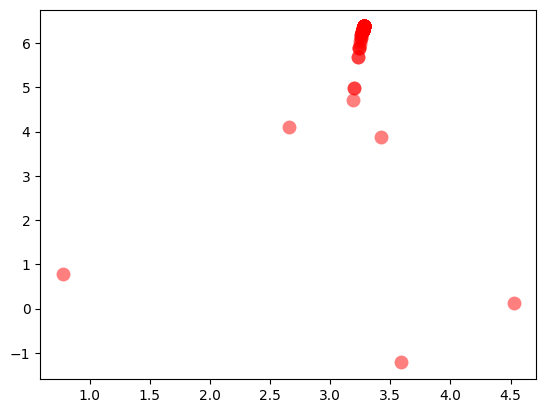

Time for Generation 128: 0.0661 seconds
Generation: 129
Max F_values: 615.2028057130257


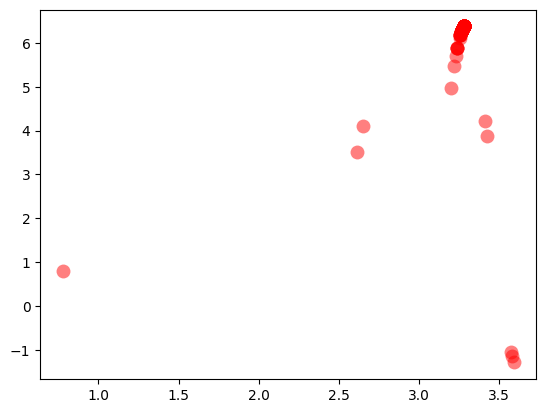

Time for Generation 129: 0.0672 seconds
Generation: 130
Max F_values: 615.2028057130257


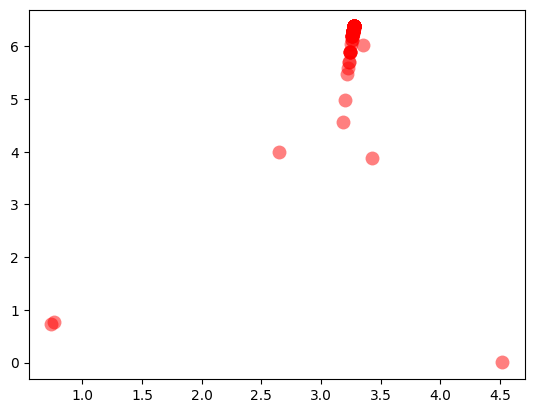

Time for Generation 130: 0.0669 seconds
Generation: 131
Max F_values: 615.2028057130257


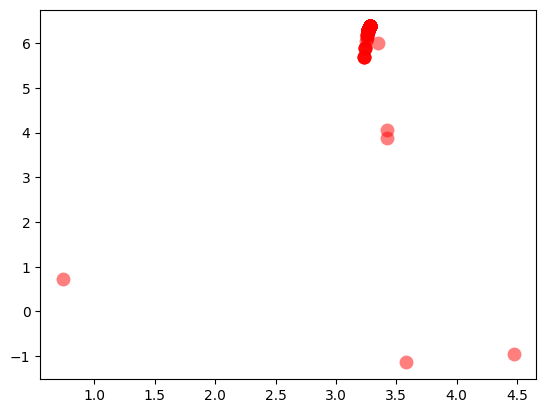

Time for Generation 131: 0.0666 seconds
Generation: 132
Max F_values: 615.2028057130257


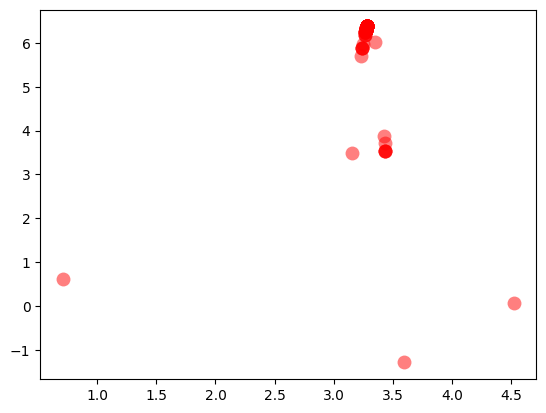

Time for Generation 132: 0.0993 seconds
Generation: 133
Max F_values: 615.2028057130257


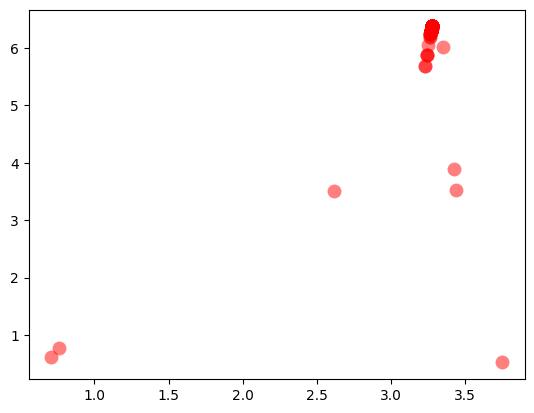

Time for Generation 133: 0.0503 seconds
Generation: 134
Max F_values: 615.2028057130257


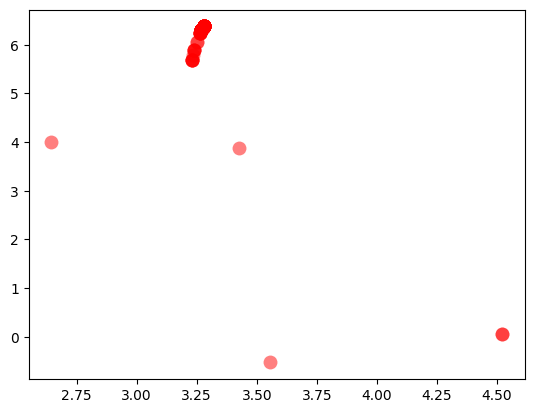

Time for Generation 134: 0.0669 seconds
Generation: 135
Max F_values: 615.2028057130257


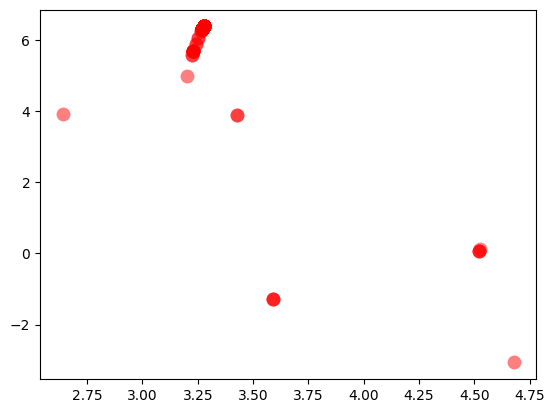

Time for Generation 135: 0.0503 seconds
Generation: 136
Max F_values: 615.2028057130257


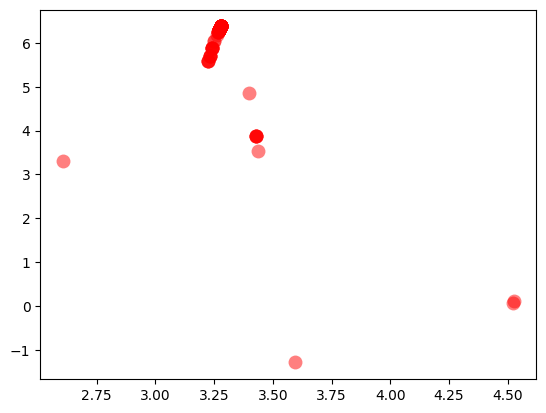

Time for Generation 136: 0.0859 seconds
Generation: 137
Max F_values: 615.2028057130257


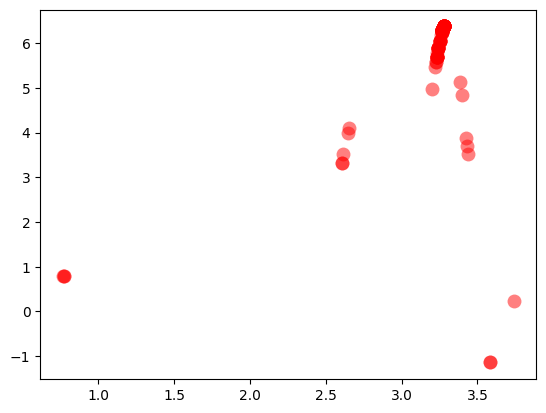

Time for Generation 137: 0.0778 seconds
Generation: 138
Max F_values: 615.2028057130257


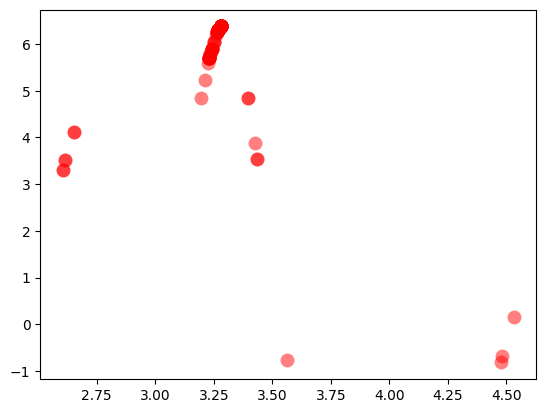

Time for Generation 138: 0.0637 seconds
Generation: 139
Max F_values: 615.2028057130257


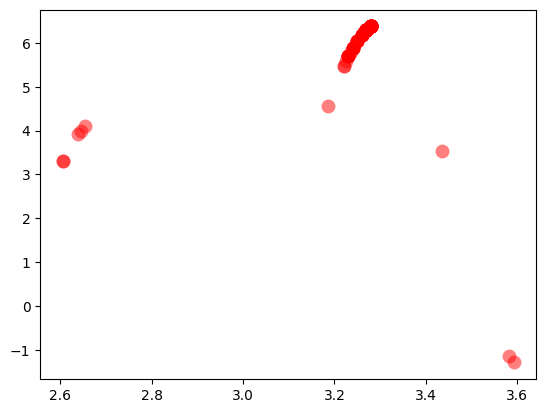

Time for Generation 139: 0.0551 seconds
Generation: 140
Max F_values: 615.2028057130257


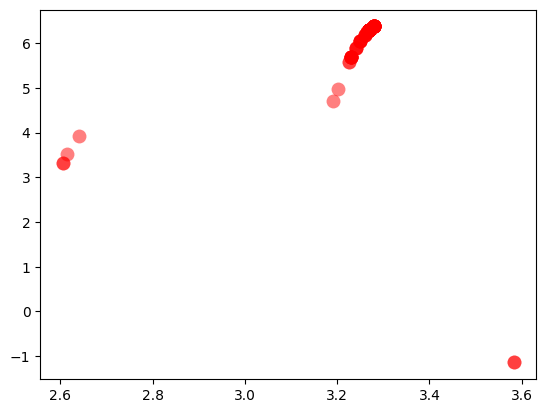

Time for Generation 140: 0.0505 seconds
Generation: 141
Max F_values: 615.2028057130257


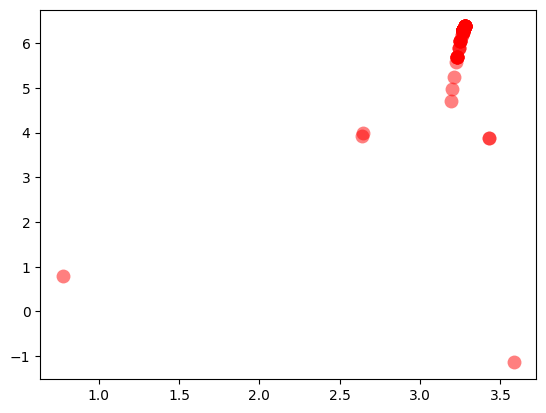

Time for Generation 141: 0.0675 seconds
Generation: 142
Max F_values: 615.2028057130257


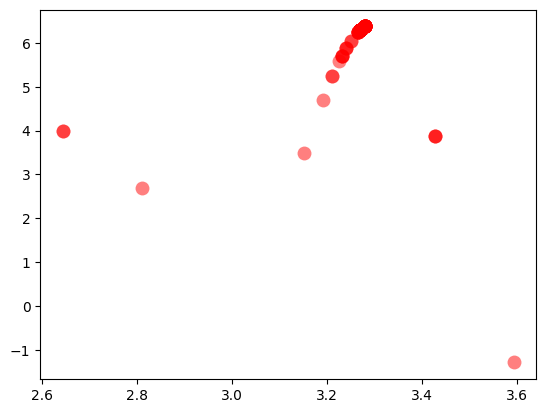

Time for Generation 142: 0.0497 seconds
Generation: 143
Max F_values: 615.2028057130257


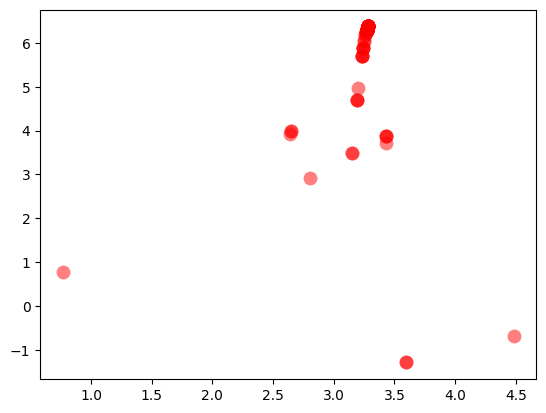

Time for Generation 143: 0.0830 seconds
Generation: 144
Max F_values: 615.2028057130257


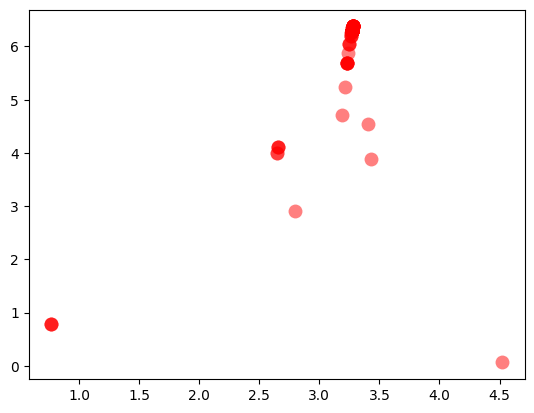

Time for Generation 144: 0.0612 seconds
Generation: 145
Max F_values: 615.2028057130257


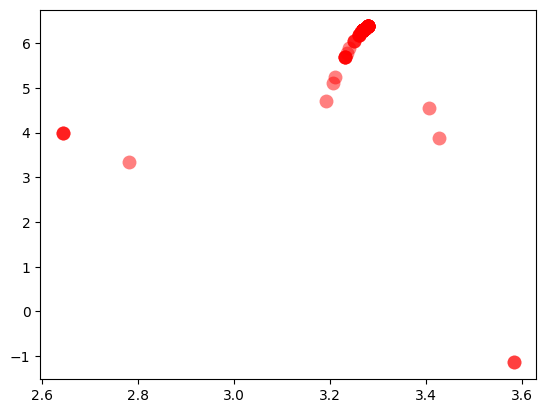

Time for Generation 145: 0.0719 seconds
Generation: 146
Max F_values: 615.2028057130257


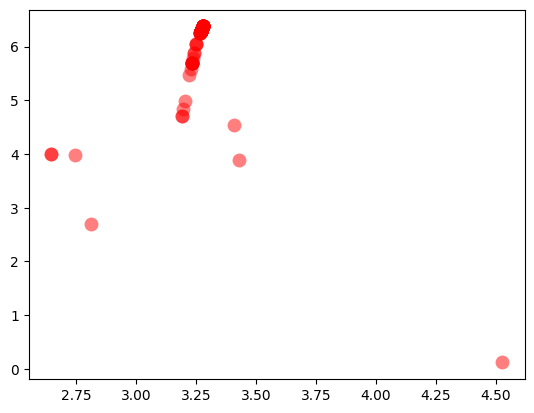

Time for Generation 146: 0.0663 seconds
Generation: 147
Max F_values: 615.2028057130257


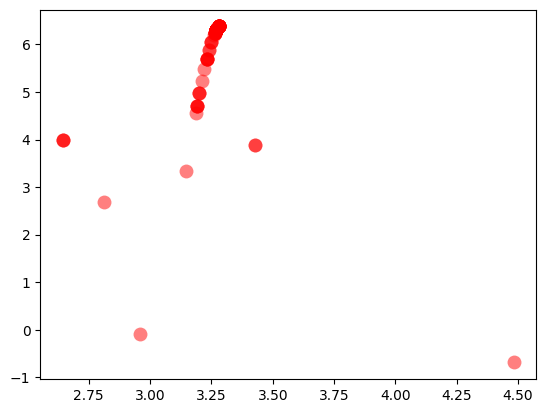

Time for Generation 147: 0.0621 seconds
Generation: 148
Max F_values: 615.2028057130257


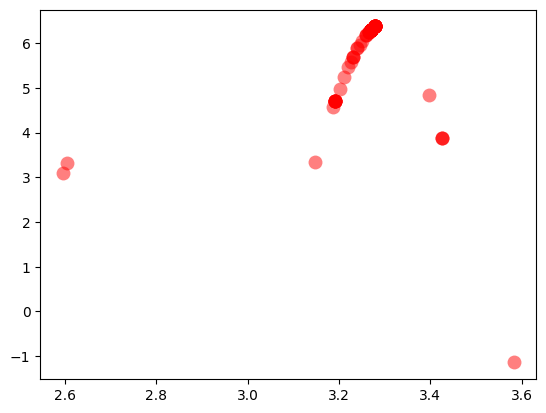

Time for Generation 148: 0.0720 seconds
Generation: 149
Max F_values: 615.2028057130257


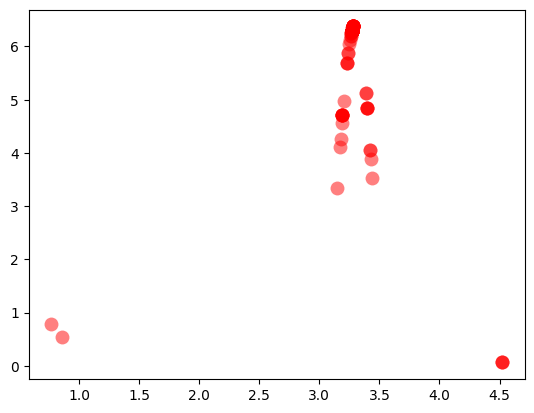

Time for Generation 149: 0.0615 seconds
Generation: 150
Max F_values: 615.2028057130257


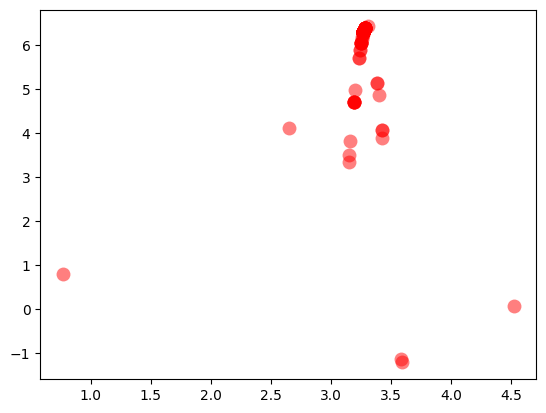

Time for Generation 150: 0.0586 seconds
Generation: 151
Max F_values: 615.2028057130257


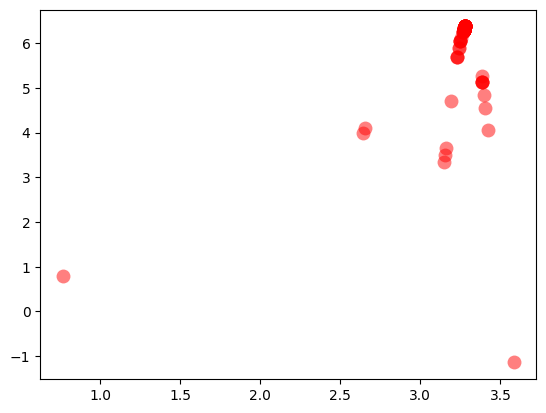

Time for Generation 151: 0.1001 seconds
Generation: 152
Max F_values: 615.2028057130257


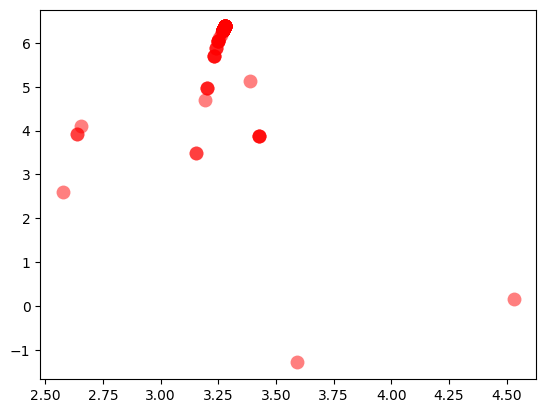

Time for Generation 152: 0.0725 seconds
Generation: 153
Max F_values: 615.2028057130257


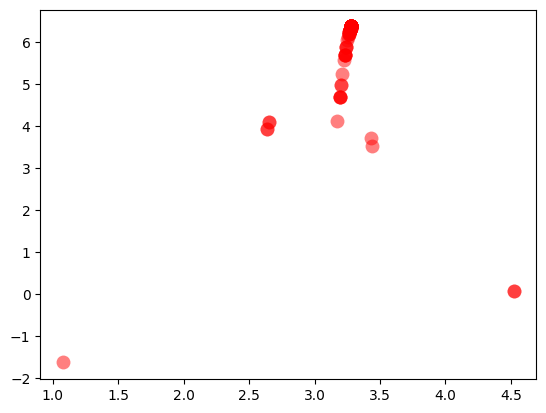

Time for Generation 153: 0.0899 seconds
Generation: 154
Max F_values: 615.2028057130257


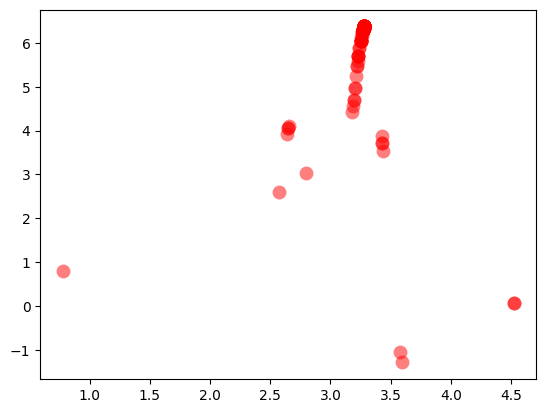

Time for Generation 154: 0.0666 seconds
Generation: 155
Max F_values: 615.2028057130257


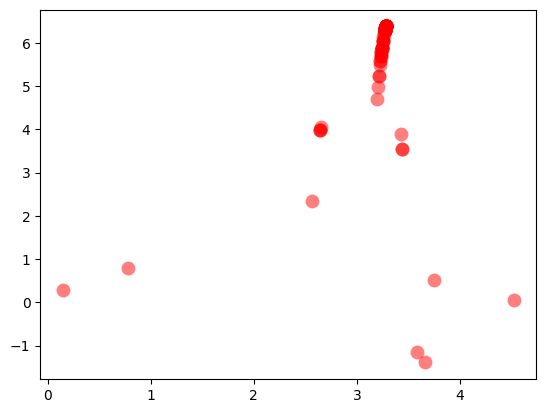

Time for Generation 155: 0.0583 seconds
Generation: 156
Max F_values: 615.2028057130257


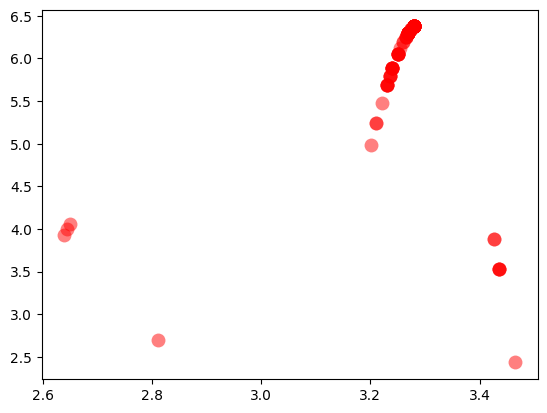

Time for Generation 156: 0.0588 seconds
Generation: 157
Max F_values: 615.2028057130257


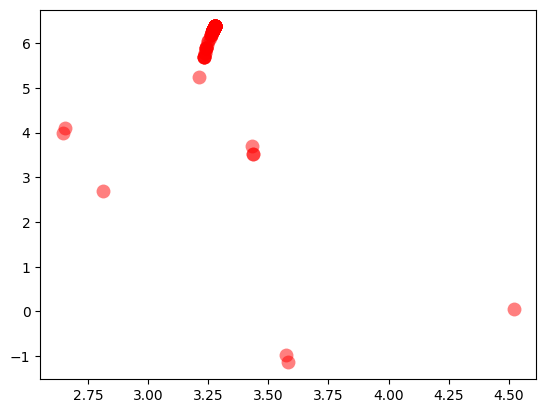

Time for Generation 157: 0.0824 seconds
Generation: 158
Max F_values: 615.2028057130257


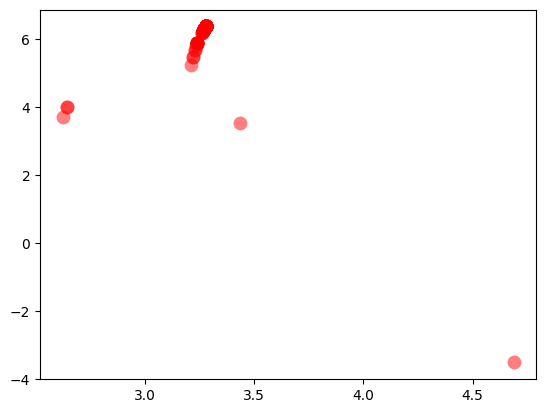

Time for Generation 158: 0.0506 seconds
Generation: 159
Max F_values: 615.2028057130257


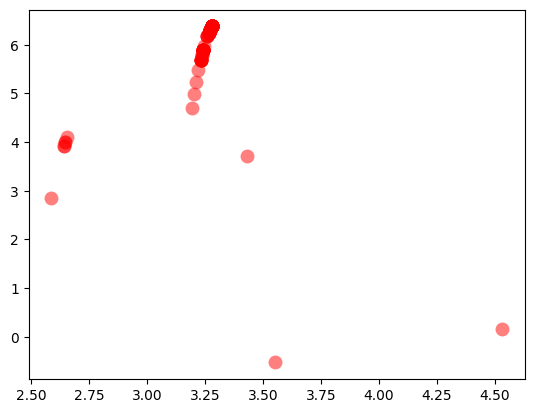

Time for Generation 159: 0.0486 seconds
Generation: 160
Max F_values: 615.2028057130257


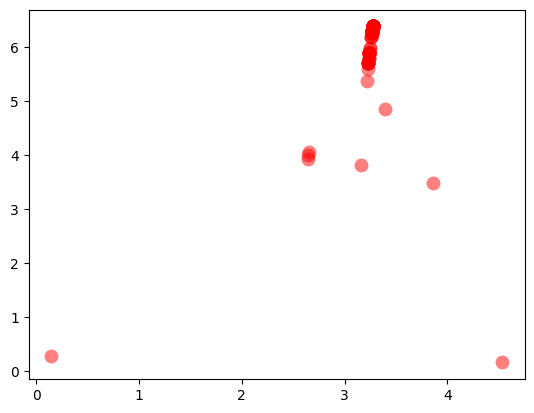

Time for Generation 160: 0.0802 seconds
Generation: 161
Max F_values: 615.2028057130257


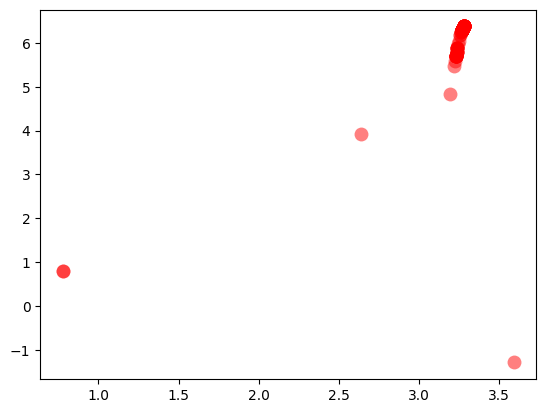

Time for Generation 161: 0.0728 seconds
Generation: 162
Max F_values: 615.2028057130257


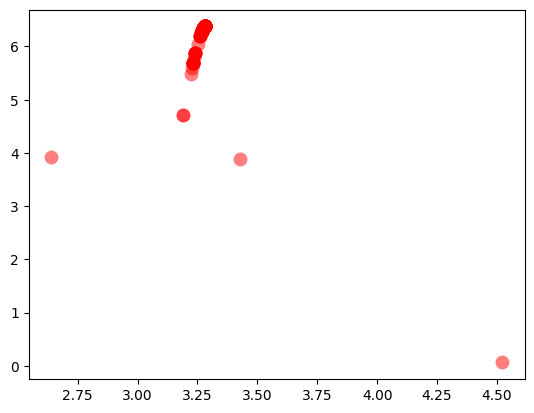

Time for Generation 162: 0.0636 seconds
Generation: 163
Max F_values: 615.2028057130257


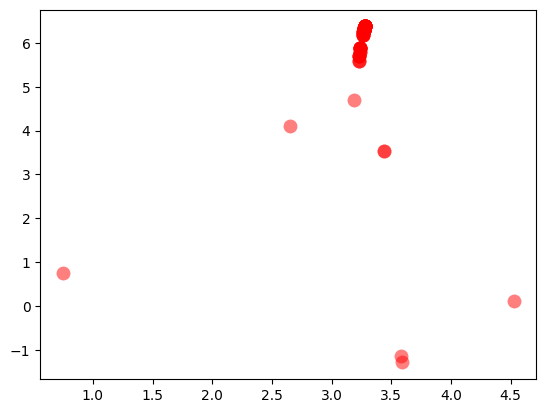

Time for Generation 163: 0.0506 seconds
Generation: 164
Max F_values: 615.2028057130257


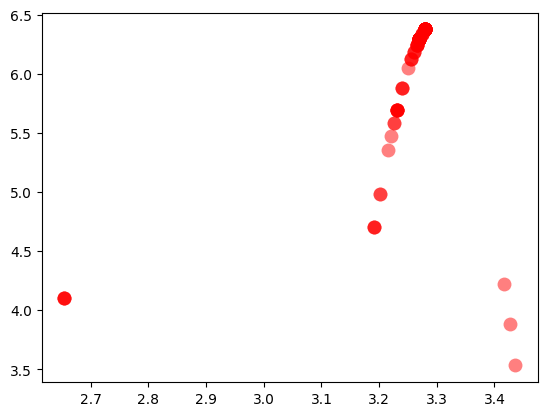

Time for Generation 164: 0.0662 seconds
Generation: 165
Max F_values: 615.2028057130257


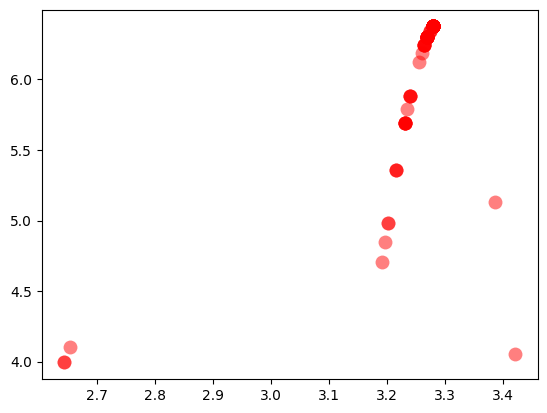

Time for Generation 165: 0.0611 seconds
Generation: 166
Max F_values: 615.2028057130257


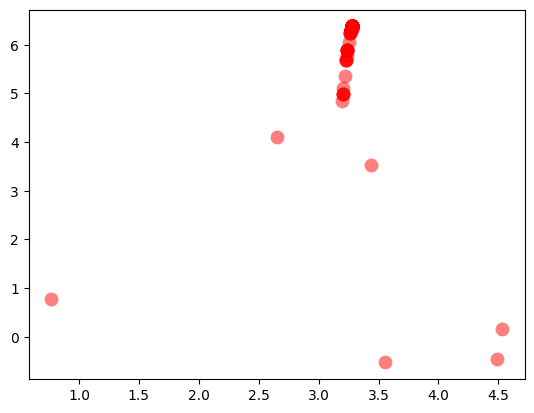

Time for Generation 166: 0.0643 seconds
Generation: 167
Max F_values: 615.2028057130257


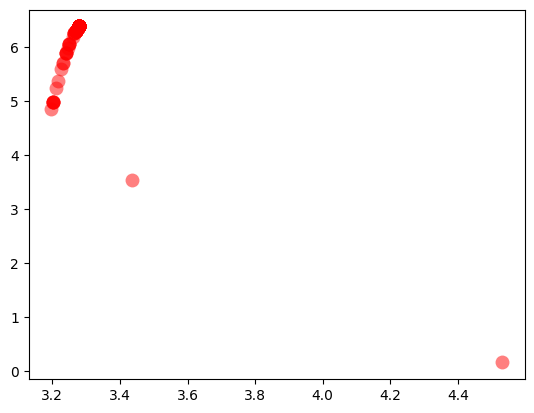

Time for Generation 167: 0.0749 seconds
Generation: 168
Max F_values: 615.2028057130257


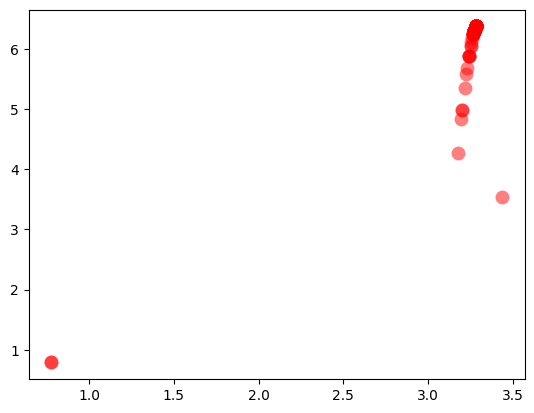

Time for Generation 168: 0.0497 seconds
Generation: 169
Max F_values: 615.2028057130257


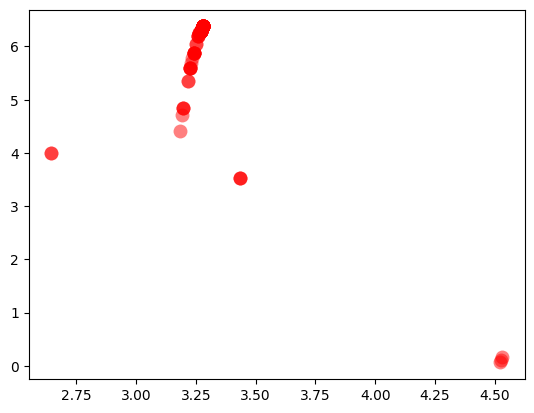

Time for Generation 169: 0.1000 seconds
Generation: 170
Max F_values: 615.2028057130257


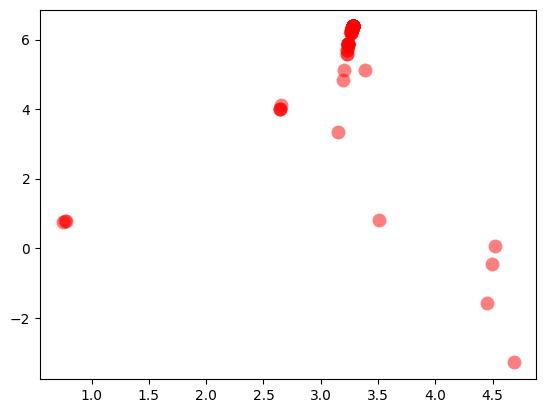

Time for Generation 170: 0.0500 seconds
Generation: 171
Max F_values: 615.2028057130257


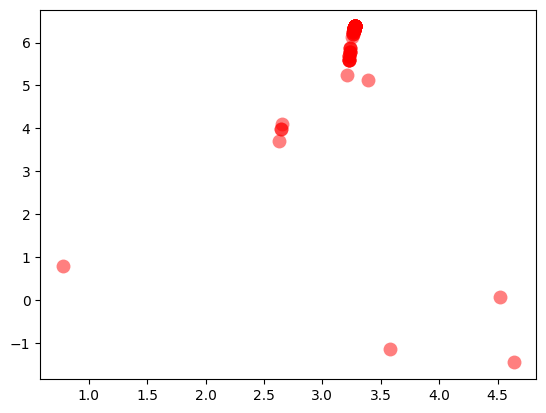

Time for Generation 171: 0.1098 seconds
Generation: 172
Max F_values: 615.2028057130257


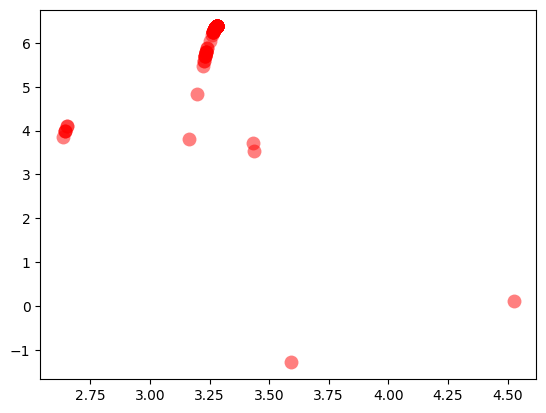

Time for Generation 172: 0.0611 seconds
Generation: 173
Max F_values: 615.2028057130257


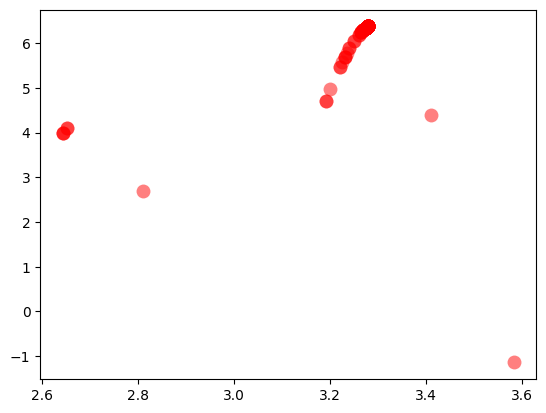

Time for Generation 173: 0.0689 seconds
Generation: 174
Max F_values: 615.2028057130257


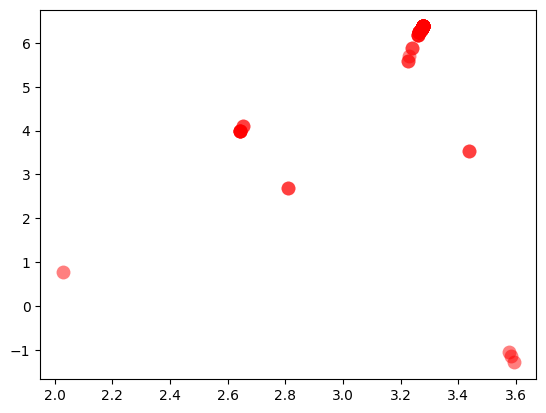

Time for Generation 174: 0.0732 seconds
Generation: 175
Max F_values: 615.2028057130257


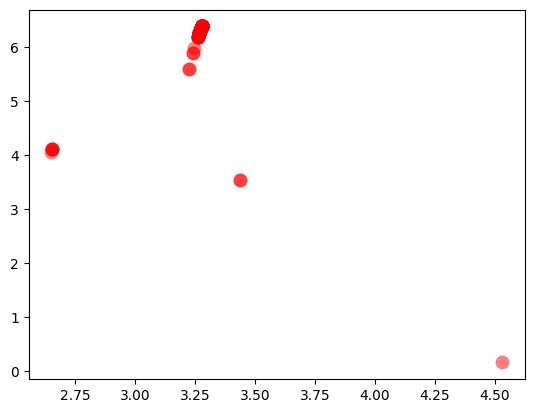

Time for Generation 175: 0.0703 seconds
Generation: 176
Max F_values: 615.2028057130257


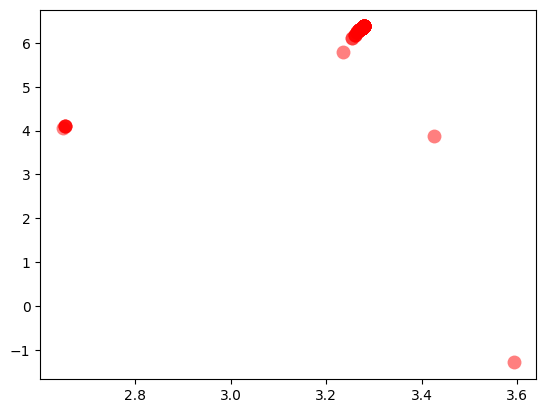

Time for Generation 176: 0.0631 seconds
Generation: 177
Max F_values: 615.2028057130257


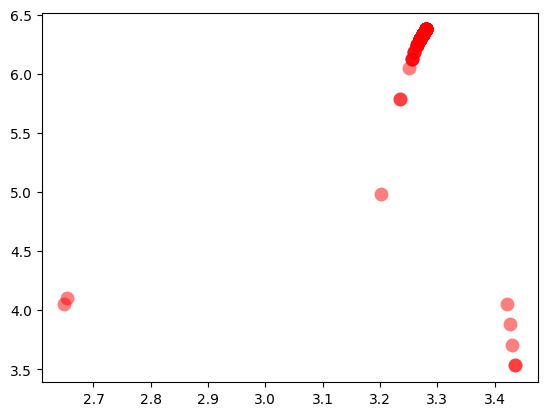

Time for Generation 177: 0.0534 seconds
Generation: 178
Max F_values: 615.2028057130257


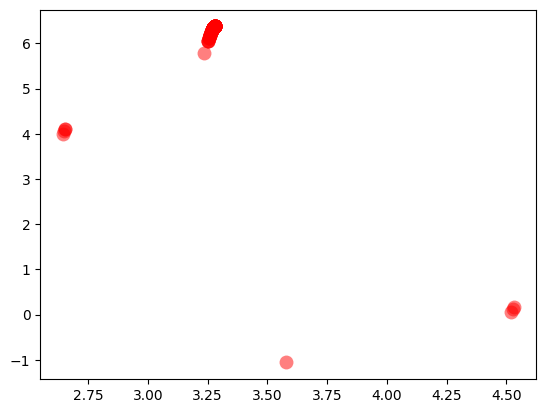

Time for Generation 178: 0.0666 seconds
Generation: 179
Max F_values: 615.2028057130257


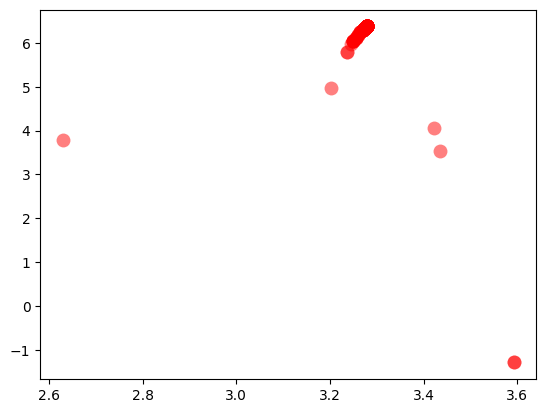

Time for Generation 179: 0.0831 seconds
Generation: 180
Max F_values: 615.2028057130257


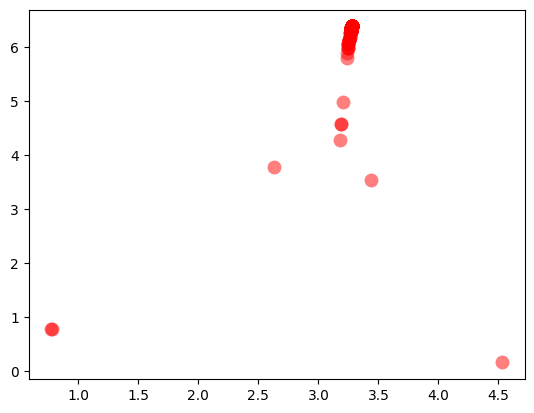

Time for Generation 180: 0.0738 seconds
Generation: 181
Max F_values: 615.2028057130257


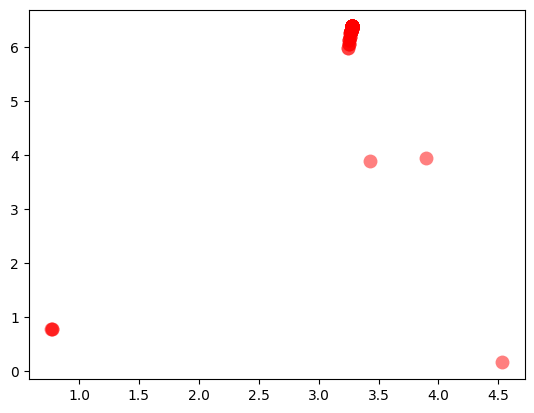

Time for Generation 181: 0.0627 seconds
Generation: 182
Max F_values: 615.2028057130257


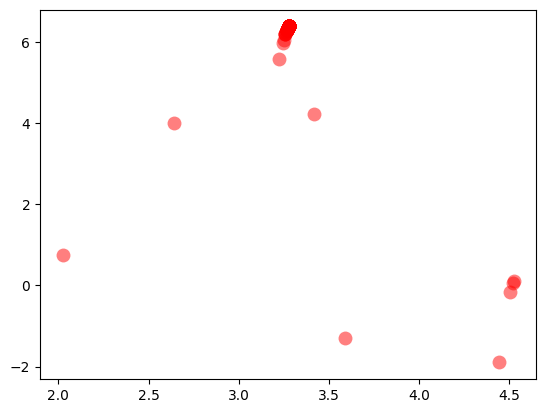

Time for Generation 182: 0.0472 seconds
Generation: 183
Max F_values: 615.2028057130257


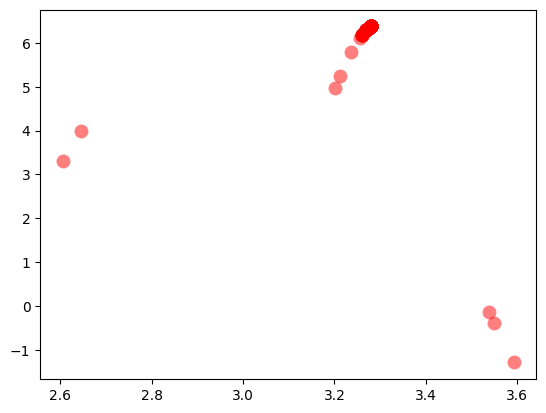

Time for Generation 183: 0.0675 seconds
Generation: 184
Max F_values: 615.2028057130257


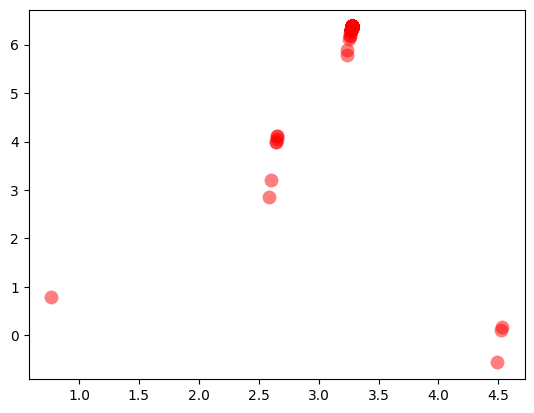

Time for Generation 184: 0.0820 seconds
Generation: 185
Max F_values: 615.2028057130257


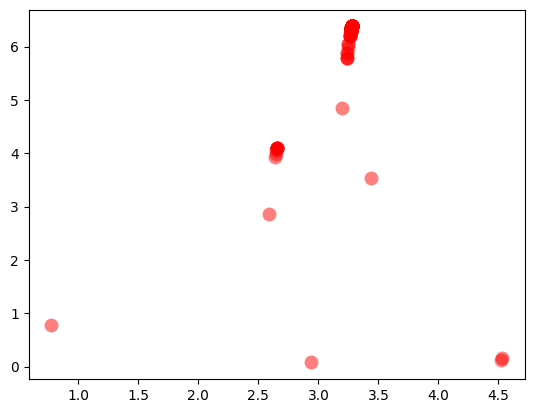

Time for Generation 185: 0.0677 seconds
Generation: 186
Max F_values: 615.2028057130257


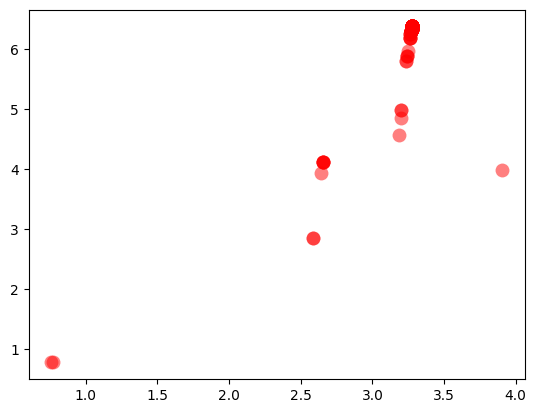

Time for Generation 186: 0.0495 seconds
Generation: 187
Max F_values: 615.2028057130257


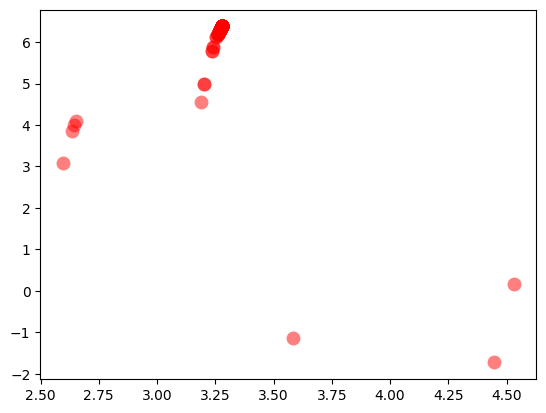

Time for Generation 187: 0.0712 seconds
Generation: 188
Max F_values: 615.2028057130257


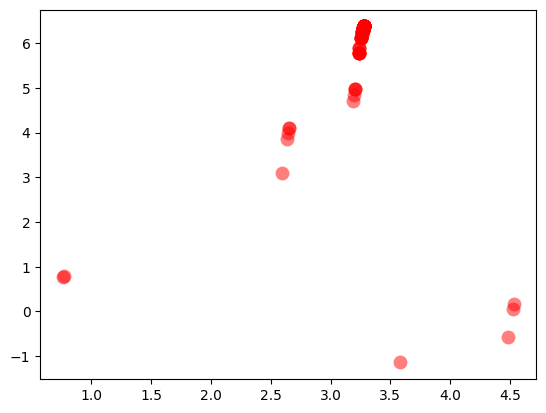

Time for Generation 188: 0.0622 seconds
Generation: 189
Max F_values: 615.2028057130257


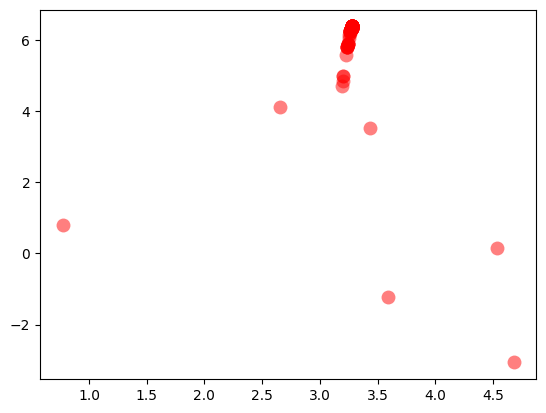

Time for Generation 189: 0.0546 seconds
Generation: 190
Max F_values: 615.2028057130257


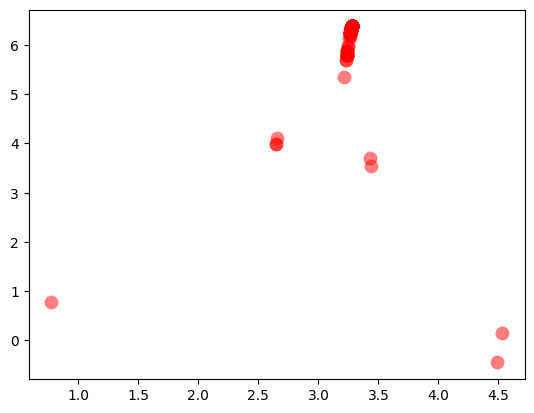

Time for Generation 190: 0.0781 seconds
Generation: 191
Max F_values: 615.2028057130257


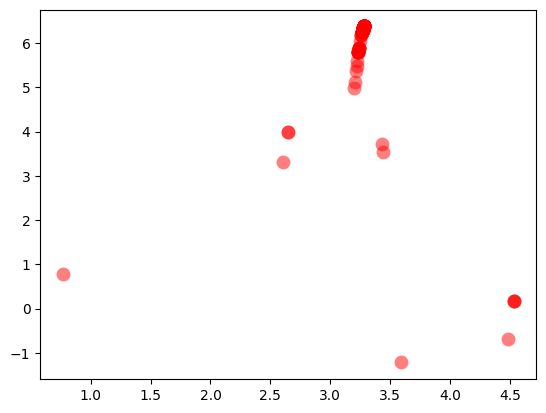

Time for Generation 191: 0.1172 seconds
Generation: 192
Max F_values: 615.2028057130257


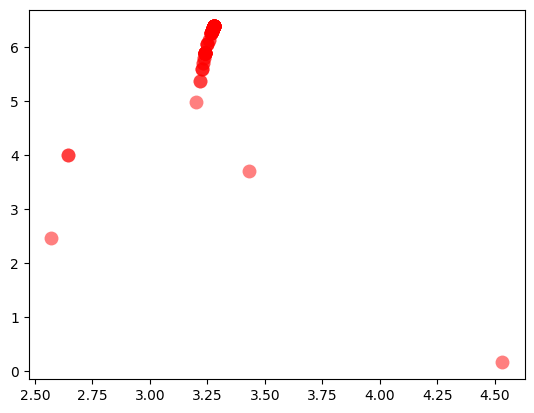

Time for Generation 192: 0.0661 seconds
Generation: 193
Max F_values: 615.2028057130257


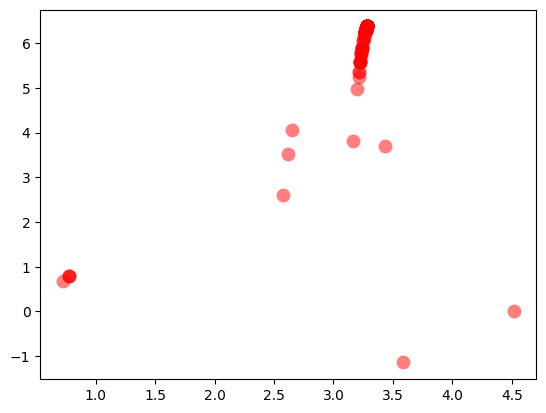

Time for Generation 193: 0.0611 seconds
Generation: 194
Max F_values: 615.2028057130257


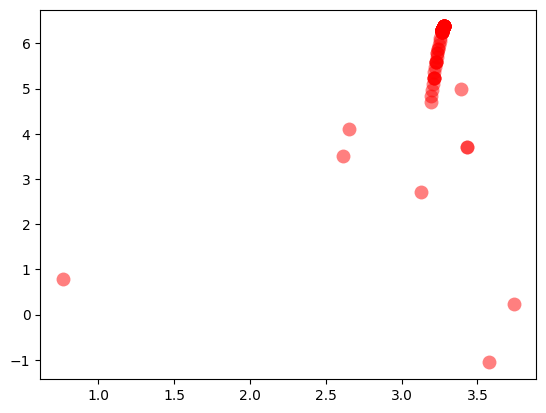

Time for Generation 194: 0.0560 seconds
Generation: 195
Max F_values: 615.2028057130257


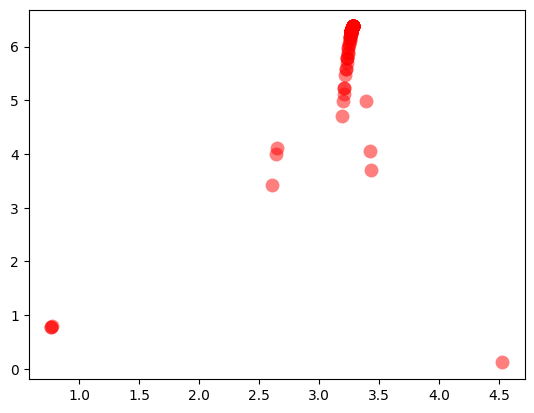

Time for Generation 195: 0.0567 seconds
Generation: 196
Max F_values: 615.2028057130257


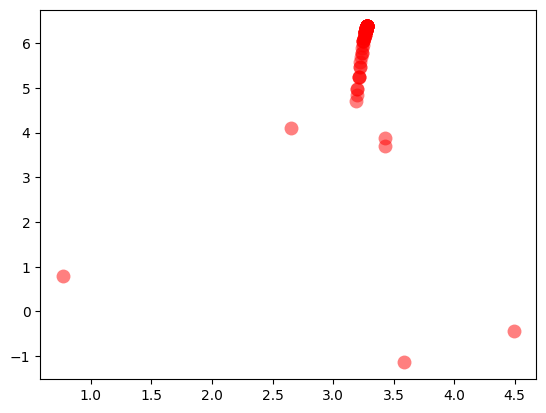

Time for Generation 196: 0.0881 seconds
Generation: 197
Max F_values: 615.2028057130257


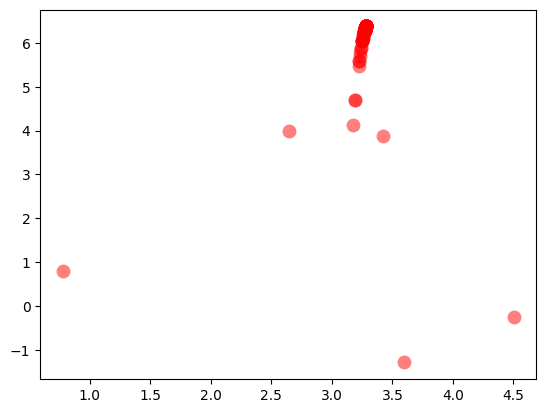

Time for Generation 197: 0.0722 seconds
Generation: 198
Max F_values: 615.2028057130257


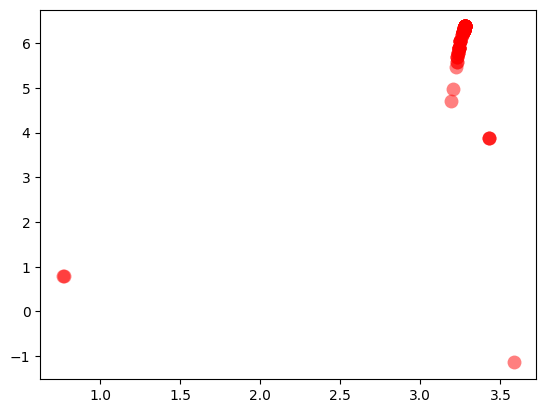

Time for Generation 198: 0.0623 seconds
Generation: 199
Max F_values: 615.2028057130257


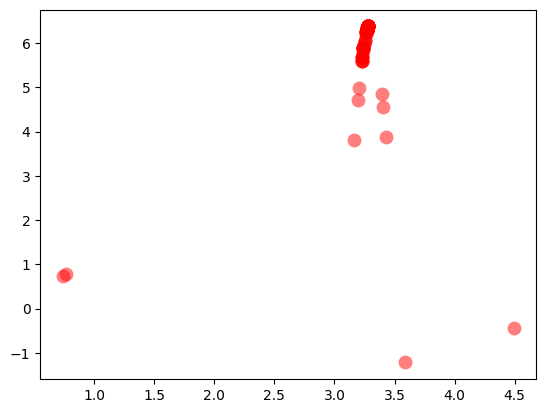

Time for Generation 199: 0.0540 seconds


([np.float64(-56.07128747178426),
  np.float64(63.2088757574513),
  np.float64(102.63297626510449),
  np.float64(203.08355768504467),
  np.float64(309.2168270424632),
  np.float64(390.7832666198483),
  np.float64(445.6636350274974),
  np.float64(499.65482451376135),
  np.float64(510.3889255973268),
  np.float64(497.2901229408157),
  np.float64(481.3497499756526),
  np.float64(495.7053959454903),
  np.float64(493.4851538213098),
  np.float64(501.3013573998183),
  np.float64(527.9549352325413),
  np.float64(511.9187614581168),
  np.float64(512.860481562019),
  np.float64(548.9651516161096),
  np.float64(534.9421073815486),
  np.float64(531.3951769114138),
  np.float64(552.0174423420992),
  np.float64(547.2588109394525),
  np.float64(558.0747525831147),
  np.float64(562.9667101360884),
  np.float64(541.9129328972716),
  np.float64(549.2638972093417),
  np.float64(529.710593559853),
  np.float64(546.8281725252967),
  np.float64(531.8525634779862),
  np.float64(548.1149941000758),
  np.floa

In [13]:
MUTATION_RATE = 0.01 # > 0.003
performance, time_per_iteration = GA(N_GENERATIONS, pop)
performance, time_per_iteration

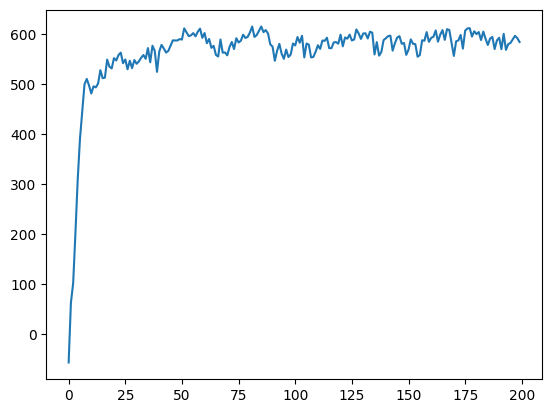

In [14]:
x = np.arange(0, N_GENERATIONS,1)
y = performance
plt.plot(x, y)

mutation 大就不穩定 沒有收斂

# HW 3.10 Discuss2
Based on the time taken for each generation, do you think GA is an efficient algorithm? Please compare it with traditional heuristic algorithms and modern machine learning methods in your explanation.